<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/climate_gradient_carbon_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 79.6 MB/s eta 0:00:00


In [1]:
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats
import pandas as pd
import numpy as np
import fiona
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from shapely import wkt

In [ ]:
# # Load carbon data
# carbon = gpd.read_file(
#     '/content/carbon_predictions_master_aligned_32604.gpkg',
#     layer='carbon_predictions_master_aligned_32604'
# )

In [ ]:
# [i for i in carbon.columns]

In [58]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Get columns starting with 'd_'
# date_cols = [col for col in carbon.columns if col.startswith('d_')]

# # Initialize storage for results
# trend_data = []
# seasonal_data = []
# residual_data = []
# metrics = []

# total_rows = len(carbon)

# # Process each row
# for i, idx in enumerate(carbon.index):
#     # Progress tracker with percentage
#     print(f"{(i+1)/total_rows*100:.1f}%")

#     # Get time series for this row
#     series = carbon.loc[idx, date_cols]

#     # Check if there are any NaNs in the input data
#     if series.isna().any():
#         # Fill NaNs in input data before decomposition
#         series = series.ffill().bfill()

#         # If still has NaNs (all values were NaN), skip this row
#         if series.isna().any():
#             print(f"Skipping row {idx} - all NaN values")
#             continue

#     # Perform decomposition
#     decomp = seasonal_decompose(series, model='additive', period=12)

#     # Fill NaNs: forward fill first (use last good value), then backward fill (use next good value)
#     trend_filled = pd.Series(decomp.trend).ffill().bfill()
#     seasonal_filled = pd.Series(decomp.seasonal).ffill().bfill()
#     residual_filled = pd.Series(decomp.resid).ffill().bfill()

#     # Store components
#     trend_data.append(trend_filled)
#     seasonal_data.append(seasonal_filled)
#     residual_data.append(residual_filled)

#     # Calculate strength metrics
#     var_resid = np.nanvar(residual_filled)
#     var_detrend = np.nanvar(series - trend_filled)
#     var_deseason = np.nanvar(series - seasonal_filled)

#     # Strength of trend and seasonality (following STL decomposition metrics)
#     strength_trend = max(0, 1 - (var_resid / var_detrend)) if var_detrend != 0 else 0
#     strength_seasonal = max(0, 1 - (var_resid / var_deseason)) if var_deseason != 0 else 0

#     metrics.append({
#         'row_idx': idx,
#         'strength_trend': strength_trend,
#         'strength_seasonal': strength_seasonal,
#         'var_residual': var_resid
#     })

# # Create new dataframes
# trend_df = pd.DataFrame(trend_data, index=[carbon.index[i] for i in range(len(trend_data))], columns=date_cols)
# seasonal_df = pd.DataFrame(seasonal_data, index=[carbon.index[i] for i in range(len(seasonal_data))], columns=date_cols)
# metrics_df = pd.DataFrame(metrics)

# # Replace original date columns with trend values
# carbon_trend = carbon.copy()
# carbon_trend[date_cols] = trend_df

# # Add seasonal columns with 's_' prefix
# seasonal_cols = ['s_' + col[2:] for col in date_cols]  # Replace 'd_' with 's_'
# for orig_col, seas_col in zip(date_cols, seasonal_cols):
#     carbon_trend[seas_col] = seasonal_df[orig_col]

# # Merge metrics into main dataframe
# carbon_trend = carbon_trend.merge(metrics_df, left_index=True, right_on='row_idx', how='left')

In [2]:
carbon_trend = gpd.read_file('carbon_trend.csv')
carbon_trend.head()

,field_1,id,lat,lon,lat_lon_id,landsat_9_unique_locs_id,landsat_9_unique_locs_min_dis,landsat_8_unique_locs_id,landsat_8_unique_locs_min_dis,landsat_7_unique_locs_id,...,s_20240708,s_20240807,s_20240906,s_20241006,s_20241105,s_20241205,row_idx,strength_trend,strength_seasonal,var_residual
0,0,1,-156.348994759659,20.8468830404769,0,90812.0,0.0,1.0,0.0,266314.0,...,0.17384790598958336,-0.049791740438988055,-0.4584059362723214,-0.5429273666294644,-0.4752287106770833,-0.13672016781994037,0,0.7059281059026283,0.8163867839261738,0.05399848371636085
1,1,2,-156.378153083538,20.8758182206596,1,258618.0,0.0,2.0,0.0,233903.0,...,0.19628286005828366,0.03263499993923613,-0.3104737899417162,-0.3830065208940969,-0.3095460607750496,-0.039112849465525734,1,0.6939383473362117,0.952618022603584,0.035631675283680005
2,2,3,-156.340831577708,20.7901896361288,2,155495.0,0.0,3.0,0.0,173589.0,...,0.16832757503100187,-0.04706131961185491,-0.4455584678261409,-0.486525045207093,-0.4155128624689981,-0.2143102463975692,2,0.7252561989128952,0.6552001554149268,0.06172751987760993
3,3,4,-156.452352773314,20.8456405639323,3,205993.0,0.0,4.0,0.0,18401.0,...,0.19447757630828377,0.01013440726066479,-0.32223667488219243,-0.3339790671440973,-0.26773305464409725,-0.04096078797743076,3,0.7436391513860496,0.8538550335642164,0.0352171940468323
4,4,5,-156.297297881963,20.9193616359825,4,22477.0,0.0,5.0,0.0,23471.0,...,-0.0953461317398317,-0.24144844721602196,-0.5327840912636407,-0.5214863287636408,-0.362173112096974,0.061672634926835355,4,0.6797967432357949,0.7558162494975806,0.04960796547634648


In [4]:
carbon = carbon_trend

In [5]:
# # Convert the geometry column from text to shapely geometry objects
carbon['geometry'] = carbon['geometry'].apply(wkt.loads)

# Convert to GeoDataFrame and set the CRS
carbon = gpd.GeoDataFrame(carbon, geometry='geometry', crs='EPSG:32604')

# Verify it worked
print(carbon.head())
print(carbon.crs)
print(type(carbon))

  field_1 id                lat               lon lat_lon_id  \
0       0  1  -156.348994759659  20.8468830404769          0   
1       1  2  -156.378153083538  20.8758182206596          1   
2       2  3  -156.340831577708  20.7901896361288          2   
3       3  4  -156.452352773314  20.8456405639323          3   
4       4  5  -156.297297881963  20.9193616359825          4   

  landsat_9_unique_locs_id landsat_9_unique_locs_min_dis  \
0                  90812.0                           0.0   
1                 258618.0                           0.0   
2                 155495.0                           0.0   
3                 205993.0                           0.0   
4                  22477.0                           0.0   

  landsat_8_unique_locs_id landsat_8_unique_locs_min_dis  \
0                      1.0                           0.0   
1                      2.0                           0.0   
2                      3.0                           0.0   
3             

In [6]:
# Load covariate layers
climate_bins = rasterio.open('/content/climate_bins.tif')
# rangelands = gpd.read_file('/content/rangeland_pastures_subregion.gpkg')
# pineapple = gpd.read_file('/content/pineapple_sugarcane_subregion.gpkg')
suborders = gpd.read_file('/content/clipped_haleakala_suborders.gpkg')
# baseline = gpd.read_file('/content/2015_ag_baseline_subregion.gpkg')
baseline = gpd.read_file('/content/2015_ag_baseline_subregion_landuse.gpkg')

In [11]:
rpath = "/content/T_max_ann_subregion.tif"

with rasterio.open(rpath) as src:
    carbon = carbon.to_crs(src.crs)

# compute mean of raster within 30 m buffer for each point
baseline["tmax_ann_mean_30m"] = [
    zs["mean"] for zs in zonal_stats(
        baseline,      # geometries
        rpath,                  # raster
        stats=["mean"],
        nodata=None,
        all_touched=True
    )
]


In [12]:
rpath = "/content/rainfall_ann_mm_subregion.tif"

with rasterio.open(rpath) as src:
    carbon = carbon.to_crs(src.crs)

# compute mean of raster within 30 m buffer for each point
baseline["rainfall_ann_mm_30m"] = [
    zs["mean"] for zs in zonal_stats(
        baseline,      # geometries
        rpath,                  # raster
        stats=["mean"],
        nodata=None,
        all_touched=True
    )
]



In [13]:
rpath = '/content/climate_bins.tif'

with rasterio.open(rpath) as src:
    carbon = carbon.to_crs(src.crs)

# compute mean of raster within 30 m buffer for each point
baseline["climate_bin"] = [
    zs["majority"] for zs in zonal_stats(
        baseline,      # geometries
        rpath,                  # raster
        stats=["majority"],
        nodata=None,
        all_touched=True
    )
]



In [14]:
# Add climate bin descriptions
bin_descriptions = {
    1: "Cool/All rainfall",
    10: "Moderate/Dry-Mod",
    11: "Moderate/Wet",
    20: "Warm/Dry",
    21: "Warm/Mod-Wet"
}
baseline['climate_description'] = baseline['climate_bin'].map(bin_descriptions)


In [15]:
baseline['poly_id'] = range(len(baseline))

In [20]:
carbon['d_20161217'].dtype

dtype('O')

In [21]:
date_cols = [col for col in carbon.columns if col.startswith('d_')]

for col in date_cols:
    carbon[col] = pd.to_numeric(carbon[col], errors='coerce')

In [300]:
# Get all the monthly carbon columns
date_cols = [col for col in carbon.columns if col.startswith('d_')]
print(f"Found {len(date_cols)} monthly predictions")
print(f"Date range: {date_cols[0]} to {date_cols[-1]}")

# Extract year from column names to identify first and last year
def get_year(col):
    date_str = col.split('_')[1]
    return int(date_str[:4])

# Get unique years
years = sorted(set([get_year(col) for col in date_cols]))
first_year = 2017
last_year = 2024

print(f"First year: {first_year}")
print(f"Last year: {last_year}")

# Get columns for first and last year
first_year_cols = [col for col in date_cols if get_year(col) == first_year]
last_year_cols = [col for col in date_cols if get_year(col) == last_year]

print(f"First year columns ({first_year}): {len(first_year_cols)} months")
print(f"Last year columns ({last_year}): {len(last_year_cols)} months")

# Calculate mean carbon across all months
carbon['carbon_mean'] = carbon[date_cols].mean(axis=1)
carbon['carbon_median'] = carbon[date_cols].median(axis=1)
carbon['carbon_std'] = carbon[date_cols].std(axis=1)
carbon['carbon_min'] = carbon[date_cols].min(axis=1)
carbon['carbon_max'] = carbon[date_cols].max(axis=1)

# Add first and last year averages
carbon['carbon_first_year'] = carbon[first_year_cols].mean(axis=1)
carbon['carbon_last_year'] = carbon[last_year_cols].mean(axis=1)

# Calculate change over time
carbon['carbon_change'] = carbon['carbon_last_year'] - carbon['carbon_first_year']
carbon['carbon_pct_change'] = ((carbon['carbon_last_year'] - carbon['carbon_first_year']) / carbon['carbon_first_year']) * 100

# Use the temporal mean for summaries
carbon_col = 'carbon_mean'

print(f"\nCarbon statistics:")
print(f"  Overall mean: {carbon['carbon_mean'].mean():.2f}%")
print(f"  First year ({first_year}) mean: {carbon['carbon_first_year'].mean():.2f}%")
print(f"  Last year ({last_year}) mean: {carbon['carbon_last_year'].mean():.2f}%")
print(f"  Average change: {carbon['carbon_change'].mean():.2f}% ({carbon['carbon_pct_change'].mean():.2f}% change)")

Found 98 monthly predictions
Date range: d_20161217 to d_20241205
First year: 2017
Last year: 2024
First year columns (2017): 12 months
Last year columns (2024): 12 months

Carbon statistics:
  Overall mean: 4.09%
  First year (2017) mean: 4.31%
  Last year (2024) mean: 3.56%
  Average change: -0.75% (-19.92% change)


In [301]:
carbon_landuse = gpd.sjoin(carbon, baseline, how='inner', predicate='intersects')

/usr/local/lib/python3.12/dist-packages/geopandas/tools/sjoin.py:266: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_reset.reset_index(inplace=True)


In [256]:
# carbon_landuse = gpd.sjoin(carbon_landuse, suborders, how='inner', predicate='intersects')

In [257]:
# [i for i in carbon_landuse.columns]

In [258]:
# Define which columns are categorical vs numeric
categorical_cols = ['CropCatego', 'Island', 'landuse_historic', 'landuse_current',
                   'climate_bin_right', 'climate_description']

numeric_cols = ['carbon_mean', 'carbon_median', 'carbon_std', 'carbon_min', 'carbon_max',
                'climate_bin_left', 'carbon_first_year', 'carbon_last_year',
                'carbon_change', 'carbon_pct_change', 'tmax_ann_mean_30m',
                'rainfall_ann_mm_30m']

# Build aggregation dictionary
agg_dict = {}

# Numeric columns - calculate mean
for col in numeric_cols:
    if col in carbon_landuse.columns:
        agg_dict[col] = 'mean'

# Categorical columns - take mode (most frequent value)
for col in categorical_cols:
    if col in carbon_landuse.columns:
        agg_dict[col] = lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]

# Group by polygon
polygon_summary = carbon_landuse.groupby('poly_id').agg(agg_dict).reset_index()

# Add point count separately
point_counts = carbon_landuse.groupby('poly_id').size().reset_index(name='n_points')
polygon_summary = polygon_summary.merge(point_counts, on='poly_id')

print(f"Original: {len(carbon_landuse)} points")
print(f"Aggregated: {len(polygon_summary)} polygons")
print(f"Points per polygon - Min: {polygon_summary['n_points'].min()}, Max: {polygon_summary['n_points'].max()}, Mean: {polygon_summary['n_points'].mean():.1f}")

# Save
polygon_summary.to_csv('carbon_polygon_summary.csv', index=False)
print("\nSaved carbon_polygon_summary.csv")

Original: 274505 points
Aggregated: 264 polygons
Points per polygon - Min: 1, Max: 25004, Mean: 1039.8

Saved carbon_polygon_summary.csv


In [259]:
polygon_summary

,poly_id,carbon_mean,carbon_median,carbon_std,carbon_min,carbon_max,carbon_first_year,carbon_last_year,carbon_change,carbon_pct_change,tmax_ann_mean_30m,rainfall_ann_mm_30m,CropCatego,Island,landuse_historic,landuse_current,climate_description,n_points
0,0,2.692066,2.533013,0.731462,1.758366,3.803315,3.685999,2.046882,-1.639117,-44.221396,28.180918,398.343928,Sugar,Maui,sugarcane,sugarcane,Warm/Dry,2651
1,1,2.683129,2.623756,0.573954,1.915602,3.588160,3.429984,2.140615,-1.289369,-37.407344,28.214982,408.154358,Sugar,Maui,sugarcane,sugarcane,Warm/Dry,1198
2,2,2.171283,2.106822,0.385922,1.573851,2.791935,2.658533,2.194286,-0.464248,-15.407924,28.165777,386.899691,Sugar,Maui,sugarcane,sugarcane,Warm/Dry,1376
3,3,3.584352,3.589569,0.322401,3.071597,4.136236,3.858377,3.157186,-0.701191,-17.877611,27.499537,1076.418094,Sugar,Maui,sugarcane,range,Warm/Mod-Wet,360
4,4,3.395355,3.401705,0.260254,2.968474,3.851546,3.341282,3.035184,-0.306098,-8.617075,26.721913,1315.535042,Sugar,Maui,sugarcane,range,Warm/Mod-Wet,739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,270,4.812053,4.821984,0.336370,4.252873,5.345098,4.763437,4.715088,-0.048349,-0.156190,26.943327,1468.069250,Pasture,Maui,pineapple,range,Warm/Mod-Wet,125
260,271,5.100059,5.145403,0.352551,4.545223,5.566964,5.342054,4.671404,-0.670650,-12.446898,26.549797,1864.437857,Pasture,Maui,pineapple,range,Warm/Mod-Wet,65
261,272,4.382816,4.336067,0.407892,3.774827,5.006070,4.337821,4.204581,-0.133240,-3.060905,26.617931,1791.139500,Pasture,Maui,pineapple,range,Warm/Mod-Wet,34
262,273,4.998882,5.035824,0.374984,4.430349,5.514789,5.297383,4.592474,-0.704909,-13.090974,26.328283,1993.852700,Pasture,Maui,pineapple,range,Warm/Mod-Wet,493


In [302]:
# Create transition column
polygon_summary['transition'] = (polygon_summary['landuse_historic'].astype(str) +
                                 ' → ' +
                                 polygon_summary['landuse_current'].astype(str))

# Filter for pineapple transitions
pineapple_stable = polygon_summary[polygon_summary['transition'] == 'pineapple → pineapple']['carbon_mean']
pineapple_to_range = polygon_summary[polygon_summary['transition'] == 'pineapple → range']['carbon_mean']

# Filter for sugarcane transitions
sugar_stable = polygon_summary[polygon_summary['transition'] == 'sugarcane → sugarcane']['carbon_mean']
sugar_to_range = polygon_summary[polygon_summary['transition'] == 'sugarcane → range']['carbon_mean']

# Filter for range transitions
range_stable = polygon_summary[polygon_summary['transition'] == 'range → range']['carbon_mean']

# Filter for forest transitions
forest_to_range = polygon_summary[polygon_summary['transition'] == 'forest → range']['carbon_mean']

print("="*80)
print("PINEAPPLE COMPARISONS")
print("="*80)

# Pineapple: stable vs to range
if len(pineapple_stable) > 0 and len(pineapple_to_range) > 0:
    print(f"\npineapple → pineapple: n={len(pineapple_stable)}, mean={pineapple_stable.mean():.2f}%, std={pineapple_stable.std():.2f}%")
    print(f"pineapple → range: n={len(pineapple_to_range)}, mean={pineapple_to_range.mean():.2f}%, std={pineapple_to_range.std():.2f}%")

    t_stat, p_value = stats.ttest_ind(pineapple_stable, pineapple_to_range)
    print(f"\nT-test: pineapple → pineapple vs pineapple → range")
    print(f"  t-statistic: {t_stat:.3f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")
    print(f"  Mean difference: {pineapple_stable.mean() - pineapple_to_range.mean():.2f}%")
else:
    print("Insufficient data for pineapple comparison")
    print(f"  pineapple → pineapple: n={len(pineapple_stable)}")
    print(f"  pineapple → range: n={len(pineapple_to_range)}")

print("\n" + "="*80)
print("SUGARCANE COMPARISONS")
print("="*80)

# Sugar: stable vs to range
if len(sugar_stable) > 0 and len(sugar_to_range) > 0:
    print(f"\nsugarcane → sugarcane: n={len(sugar_stable)}, mean={sugar_stable.mean():.2f}%, std={sugar_stable.std():.2f}%")
    print(f"sugarcane → range: n={len(sugar_to_range)}, mean={sugar_to_range.mean():.2f}%, std={sugar_to_range.std():.2f}%")

    t_stat, p_value = stats.ttest_ind(sugar_stable, sugar_to_range)
    print(f"\nT-test: sugarcane → sugarcane vs sugarcane → range")
    print(f"  t-statistic: {t_stat:.3f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")
    print(f"  Mean difference: {sugar_stable.mean() - sugar_to_range.mean():.2f}%")
else:
    print("Insufficient data for sugar comparison")
    print(f"  sugarcane → sugarcane: n={len(sugar_stable)}")
    print(f"  sugarcane → range: n={len(sugar_to_range)}")

print("\n" + "="*80)
print("RANGE COMPARISONS")
print("="*80)

# Range: stable
if len(range_stable) > 0:
    print(f"\nrange → range: n={len(range_stable)}, mean={range_stable.mean():.2f}%, std={range_stable.std():.2f}%")
else:
    print("Insufficient data for range → range")
    print(f"  range → range: n={len(range_stable)}")

print("\n" + "="*80)
print("FOREST COMPARISONS")
print("="*80)

# Forest: to range
if len(forest_to_range) > 0:
    print(f"\nforest → range: n={len(forest_to_range)}, mean={forest_to_range.mean():.2f}%, std={forest_to_range.std():.2f}%")
else:
    print("Insufficient data for forest → range")
    print(f"  forest → range: n={len(forest_to_range)}")

# Check what transitions actually exist
print("\n" + "="*80)
print("AVAILABLE TRANSITIONS")
print("="*80)
print("\nAll transitions in dataset:")
print(polygon_summary['transition'].value_counts())

PINEAPPLE COMPARISONS

pineapple → pineapple: n=70, mean=4.65%, std=1.00%
pineapple → range: n=45, mean=4.89%, std=0.75%

T-test: pineapple → pineapple vs pineapple → range
  t-statistic: -1.376
  p-value: 0.1716
  Significant at α=0.05: No
  Mean difference: -0.24%

SUGARCANE COMPARISONS

sugarcane → sugarcane: n=78, mean=2.66%, std=0.55%
sugarcane → range: n=56, mean=3.36%, std=0.57%

T-test: sugarcane → sugarcane vs sugarcane → range
  t-statistic: -7.135
  p-value: 0.0000
  Significant at α=0.05: Yes
  Mean difference: -0.70%

RANGE COMPARISONS

range → range: n=10, mean=7.29%, std=2.34%

FOREST COMPARISONS

forest → range: n=2, mean=5.61%, std=0.14%

AVAILABLE TRANSITIONS

All transitions in dataset:
transition
sugarcane → sugarcane    78
pineapple → pineapple    70
sugarcane → range        56
pineapple → range        45
range → range            10
None → None               2
forest → range            2
None → range              1
Name: count, dtype: int64


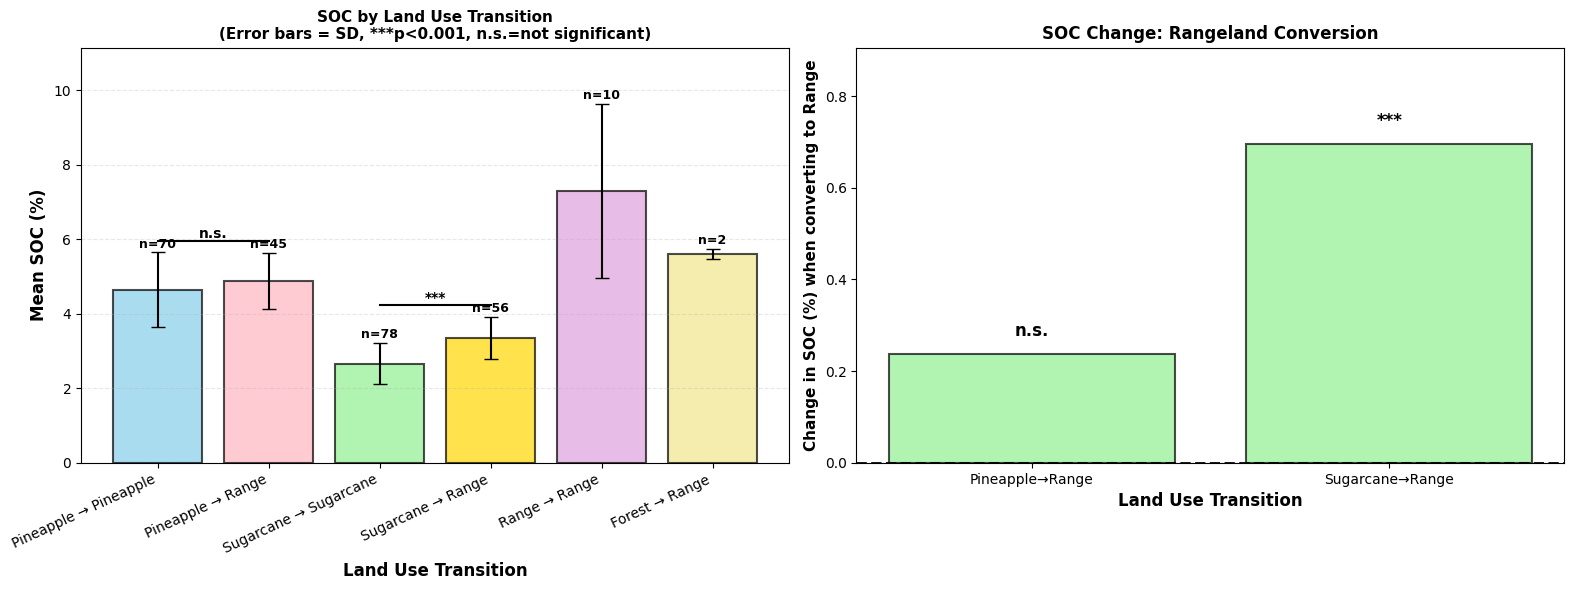


SUMMARY

Pineapple:
  Stable: 4.65 ± 1.00% SD (n=70)
    95% CI: [4.41, 4.88]
  Converted to range: 4.89 ± 0.75% SD (n=45)
    95% CI: [4.67, 5.11]
  Difference: +0.24% (p=0.1716)
  Interpretation: NOT significant

Sugarcane:
  Stable: 2.66 ± 0.55% SD (n=78)
    95% CI: [2.54, 2.78]
  Converted to range: 3.36 ± 0.57% SD (n=56)
    95% CI: [3.21, 3.51]
  Difference: +0.70% (p=0.0000)
  Interpretation: HIGHLY SIGNIFICANT
  Effect size: 26.2% relative increase

Range → Range: 7.29 ± 2.34% SD (n=10)
Forest → Range: 5.61 ± 0.14% SD (n=2)


In [307]:
# Calculate statistics from polygon_summary for each transition
transitions = {
    'pineapple → pineapple': polygon_summary[polygon_summary['transition'] == 'pineapple → pineapple']['carbon_mean'],
    'pineapple → range': polygon_summary[polygon_summary['transition'] == 'pineapple → range']['carbon_mean'],
    'sugarcane → sugarcane': polygon_summary[polygon_summary['transition'] == 'sugarcane → sugarcane']['carbon_mean'],
    'sugarcane → range': polygon_summary[polygon_summary['transition'] == 'sugarcane → range']['carbon_mean'],
    'range → range': polygon_summary[polygon_summary['transition'] == 'range → range']['carbon_mean'],
    'forest → range': polygon_summary[polygon_summary['transition'] == 'forest → range']['carbon_mean']
}

# Extract statistics
categories = []
means = []
stds = []
ns = []

for name, data in transitions.items():
    if len(data) > 0:
        categories.append(name.title().replace('→', '→'))
        means.append(data.mean())
        stds.append(data.std())
        ns.append(len(data))

# Perform t-tests
pineapple_ttest = stats.ttest_ind(transitions['pineapple → pineapple'],
                                   transitions['pineapple → range']) if len(transitions['pineapple → pineapple']) > 0 and len(transitions['pineapple → range']) > 0 else None

sugar_ttest = stats.ttest_ind(transitions['sugarcane → sugarcane'],
                               transitions['sugarcane → range']) if len(transitions['sugarcane → sugarcane']) > 0 and len(transitions['sugarcane → range']) > 0 else None

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Bar plot with error bars using SD
colors = ['#87CEEB', '#FFB6C1', '#90EE90', '#FFD700', '#DDA0DD', '#F0E68C']
x_pos = np.arange(len(categories))

bars = axes[0].bar(x_pos, means, yerr=stds, capsize=5, alpha=0.7,
                   color=colors[:len(categories)], edgecolor='black', linewidth=1.5)

# Add sample sizes on bars
for i, (bar, n) in enumerate(zip(bars, ns)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + stds[i] + 0.05,
                f'n={n}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Add significance brackets dynamically
max_height = max([means[i] + stds[i] for i in range(len(means))])

# Pineapple comparison (if data exists)
if pineapple_ttest is not None:
    pine_idx = [i for i, cat in enumerate(categories) if 'pineapple' in cat.lower()]
    if len(pine_idx) == 2:
        bracket_y = max([means[i] + stds[i] for i in pine_idx]) + 0.3
        axes[0].plot([pine_idx[0], pine_idx[1]], [bracket_y, bracket_y], 'k-', linewidth=1.5)
        sig_text = '***' if pineapple_ttest.pvalue < 0.001 else '**' if pineapple_ttest.pvalue < 0.01 else '*' if pineapple_ttest.pvalue < 0.05 else 'n.s.'
        axes[0].text((pine_idx[0] + pine_idx[1])/2, bracket_y + 0.1, sig_text,
                    ha='center', fontsize=10, fontweight='bold')

# Sugarcane comparison (if data exists)
if sugar_ttest is not None:
    sugar_idx = [i for i, cat in enumerate(categories) if 'sugarcane' in cat.lower()]
    if len(sugar_idx) == 2:
        bracket_y = max([means[i] + stds[i] for i in sugar_idx]) + 0.3
        axes[0].plot([sugar_idx[0], sugar_idx[1]], [bracket_y, bracket_y], 'k-', linewidth=1.5)
        sig_text = '***' if sugar_ttest.pvalue < 0.001 else '**' if sugar_ttest.pvalue < 0.01 else '*' if sugar_ttest.pvalue < 0.05 else 'n.s.'
        axes[0].text((sugar_idx[0] + sugar_idx[1])/2, bracket_y + 0.1, sig_text,
                    ha='center', fontsize=10, fontweight='bold')

axes[0].set_ylabel('Mean SOC (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Land Use Transition', fontsize=12, fontweight='bold')
axes[0].set_title('SOC by Land Use Transition\n(Error bars = SD, ***p<0.001, n.s.=not significant)',
                  fontsize=11, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(categories, rotation=25, ha='right')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].set_ylim(0, max_height + 1.5)

# RIGHT PLOT: Difference plot showing change
differences = []
diff_labels = []
diff_colors = []
sig_markers = []

# Pineapple difference
if 'pineapple → pineapple' in transitions and 'pineapple → range' in transitions:
    if len(transitions['pineapple → pineapple']) > 0 and len(transitions['pineapple → range']) > 0:
        diff = transitions['pineapple → range'].mean() - transitions['pineapple → pineapple'].mean()
        differences.append(diff)
        diff_labels.append('Pineapple→Range')
        diff_colors.append('#FF6B6B' if diff < 0 else '#90EE90')
        sig_text = '***' if pineapple_ttest.pvalue < 0.001 else '**' if pineapple_ttest.pvalue < 0.01 else '*' if pineapple_ttest.pvalue < 0.05 else 'n.s.'
        sig_markers.append(sig_text)

# Sugarcane difference
if 'sugarcane → sugarcane' in transitions and 'sugarcane → range' in transitions:
    if len(transitions['sugarcane → sugarcane']) > 0 and len(transitions['sugarcane → range']) > 0:
        diff = transitions['sugarcane → range'].mean() - transitions['sugarcane → sugarcane'].mean()
        differences.append(diff)
        diff_labels.append('Sugarcane→Range')
        diff_colors.append('#FF6B6B' if diff < 0 else '#90EE90')
        sig_text = '***' if sugar_ttest.pvalue < 0.001 else '**' if sugar_ttest.pvalue < 0.01 else '*' if sugar_ttest.pvalue < 0.05 else 'n.s.'
        sig_markers.append(sig_text)

if len(differences) > 0:
    x_pos2 = np.arange(len(differences))
    bars2 = axes[1].bar(x_pos2, differences, alpha=0.7, color=diff_colors,
                        edgecolor='black', linewidth=1.5)

    # Add zero line
    axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2)

    # Add significance markers
    for i, (bar, sig) in enumerate(zip(bars2, sig_markers)):
        height = bar.get_height()
        y_pos = height + 0.03 if height > 0 else height - 0.03
        va = 'bottom' if height > 0 else 'top'
        axes[1].text(bar.get_x() + bar.get_width()/2., y_pos, sig,
                    ha='center', va=va, fontweight='bold', fontsize=12)

    axes[1].set_ylabel('Change in SOC (%) when converting to Range', fontsize=11, fontweight='bold')
    axes[1].set_xlabel('Land Use Transition', fontsize=12, fontweight='bold')
    axes[1].set_title('SOC Change: Rangeland Conversion',
                      fontsize=12, fontweight='bold')
    axes[1].set_xticks(x_pos2)
    axes[1].set_xticklabels(diff_labels)
    y_max = max([abs(d) for d in differences]) * 1.3
    axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

# Print summary with both SD and confidence intervals
print("\n" + "="*80)
print("SUMMARY")
print("="*80)

if pineapple_ttest is not None:
    pine_stable = transitions['pineapple → pineapple']
    pine_range = transitions['pineapple → range']
    pine_stable_se = pine_stable.std() / np.sqrt(len(pine_stable))
    pine_range_se = pine_range.std() / np.sqrt(len(pine_range))

    print("\nPineapple:")
    print(f"  Stable: {pine_stable.mean():.2f} ± {pine_stable.std():.2f}% SD (n={len(pine_stable)})")
    print(f"    95% CI: [{pine_stable.mean() - 1.96*pine_stable_se:.2f}, {pine_stable.mean() + 1.96*pine_stable_se:.2f}]")
    print(f"  Converted to range: {pine_range.mean():.2f} ± {pine_range.std():.2f}% SD (n={len(pine_range)})")
    print(f"    95% CI: [{pine_range.mean() - 1.96*pine_range_se:.2f}, {pine_range.mean() + 1.96*pine_range_se:.2f}]")
    print(f"  Difference: {pine_range.mean() - pine_stable.mean():+.2f}% (p={pineapple_ttest.pvalue:.4f})")
    sig_status = "SIGNIFICANT" if pineapple_ttest.pvalue < 0.05 else "NOT significant"
    print(f"  Interpretation: {sig_status}")

if sugar_ttest is not None:
    sugar_stable = transitions['sugarcane → sugarcane']
    sugar_range = transitions['sugarcane → range']
    sugar_stable_se = sugar_stable.std() / np.sqrt(len(sugar_stable))
    sugar_range_se = sugar_range.std() / np.sqrt(len(sugar_range))

    print("\nSugarcane:")
    print(f"  Stable: {sugar_stable.mean():.2f} ± {sugar_stable.std():.2f}% SD (n={len(sugar_stable)})")
    print(f"    95% CI: [{sugar_stable.mean() - 1.96*sugar_stable_se:.2f}, {sugar_stable.mean() + 1.96*sugar_stable_se:.2f}]")
    print(f"  Converted to range: {sugar_range.mean():.2f} ± {sugar_range.std():.2f}% SD (n={len(sugar_range)})")
    print(f"    95% CI: [{sugar_range.mean() - 1.96*sugar_range_se:.2f}, {sugar_range.mean() + 1.96*sugar_range_se:.2f}]")
    print(f"  Difference: {sugar_range.mean() - sugar_stable.mean():+.2f}% (p={sugar_ttest.pvalue:.4f})")
    sig_status = "HIGHLY SIGNIFICANT" if sugar_ttest.pvalue < 0.001 else "SIGNIFICANT" if sugar_ttest.pvalue < 0.05 else "NOT significant"
    print(f"  Interpretation: {sig_status}")
    if sugar_ttest.pvalue < 0.05:
        print(f"  Effect size: {((sugar_range.mean()/sugar_stable.mean())-1)*100:.1f}% relative increase")

# Print info about new categories
if len(transitions['range → range']) > 0:
    range_data = transitions['range → range']
    print(f"\nRange → Range: {range_data.mean():.2f} ± {range_data.std():.2f}% SD (n={len(range_data)})")

if len(transitions['forest → range']) > 0:
    forest_data = transitions['forest → range']
    print(f"Forest → Range: {forest_data.mean():.2f} ± {forest_data.std():.2f}% SD (n={len(forest_data)})")

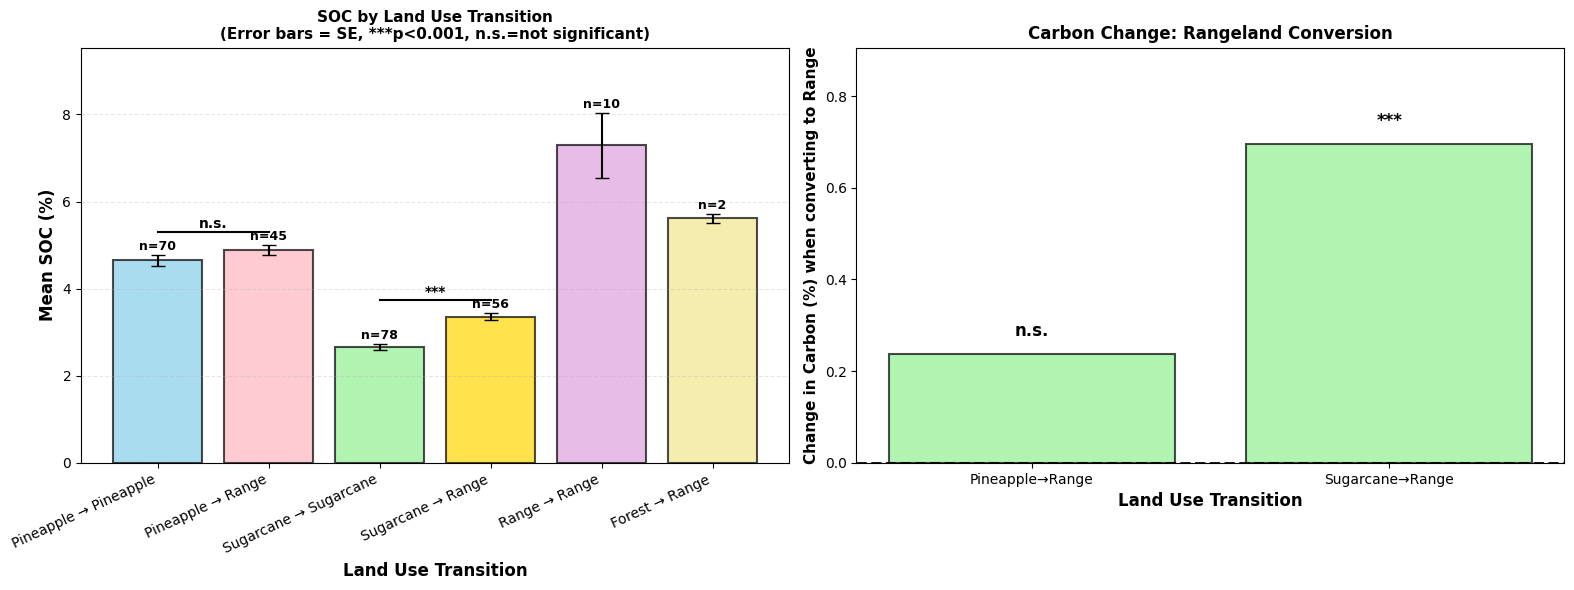


SUMMARY

Pineapple:
  Stable: 4.65% carbon (n=70)
  Converted to range: 4.89% carbon (n=45)
  Difference: +0.24% carbon (p=0.1716)
  Interpretation: NOT significant

Sugarcane:
  Stable: 2.66% carbon (n=78)
  Converted to range: 3.36% carbon (n=56)
  Difference: +0.70% carbon (p=0.0000)
  Interpretation: HIGHLY SIGNIFICANT
  Effect size: 26.2% relative increase

Range → Range: 7.29% carbon (n=10)
Forest → Range: 5.61% carbon (n=2)


In [306]:
# Calculate statistics from polygon_summary for each transition
transitions = {
    'pineapple → pineapple': polygon_summary[polygon_summary['transition'] == 'pineapple → pineapple']['carbon_mean'],
    'pineapple → range': polygon_summary[polygon_summary['transition'] == 'pineapple → range']['carbon_mean'],
    'sugarcane → sugarcane': polygon_summary[polygon_summary['transition'] == 'sugarcane → sugarcane']['carbon_mean'],
    'sugarcane → range': polygon_summary[polygon_summary['transition'] == 'sugarcane → range']['carbon_mean'],
    'range → range': polygon_summary[polygon_summary['transition'] == 'range → range']['carbon_mean'],
    'forest → range': polygon_summary[polygon_summary['transition'] == 'forest → range']['carbon_mean']
}

# Extract statistics
categories = []
means = []
stds = []
ns = []

for name, data in transitions.items():
    if len(data) > 0:
        categories.append(name.title().replace('→', '→'))
        means.append(data.mean())
        stds.append(data.std())
        ns.append(len(data))

# Calculate standard errors
ses = [stds[i] / np.sqrt(ns[i]) for i in range(len(stds))]

# Perform t-tests
pineapple_ttest = stats.ttest_ind(transitions['pineapple → pineapple'],
                                   transitions['pineapple → range']) if len(transitions['pineapple → pineapple']) > 0 and len(transitions['pineapple → range']) > 0 else None

sugar_ttest = stats.ttest_ind(transitions['sugarcane → sugarcane'],
                               transitions['sugarcane → range']) if len(transitions['sugarcane → sugarcane']) > 0 and len(transitions['sugarcane → range']) > 0 else None

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Bar plot with error bars
colors = ['#87CEEB', '#FFB6C1', '#90EE90', '#FFD700', '#DDA0DD', '#F0E68C']
x_pos = np.arange(len(categories))

bars = axes[0].bar(x_pos, means, yerr=ses, capsize=5, alpha=0.7,
                   color=colors[:len(categories)], edgecolor='black', linewidth=1.5)

# Add sample sizes on bars
for i, (bar, n) in enumerate(zip(bars, ns)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + ses[i] + 0.05,
                f'n={n}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Add significance brackets dynamically
max_height = max([means[i] + ses[i] for i in range(len(means))])

# Pineapple comparison (if data exists)
if pineapple_ttest is not None:
    pine_idx = [i for i, cat in enumerate(categories) if 'pineapple' in cat.lower()]
    if len(pine_idx) == 2:
        bracket_y = max([means[i] + ses[i] for i in pine_idx]) + 0.3
        axes[0].plot([pine_idx[0], pine_idx[1]], [bracket_y, bracket_y], 'k-', linewidth=1.5)
        sig_text = '***' if pineapple_ttest.pvalue < 0.001 else '**' if pineapple_ttest.pvalue < 0.01 else '*' if pineapple_ttest.pvalue < 0.05 else 'n.s.'
        axes[0].text((pine_idx[0] + pine_idx[1])/2, bracket_y + 0.1, sig_text,
                    ha='center', fontsize=10, fontweight='bold')

# Sugarcane comparison (if data exists)
if sugar_ttest is not None:
    sugar_idx = [i for i, cat in enumerate(categories) if 'sugarcane' in cat.lower()]
    if len(sugar_idx) == 2:
        bracket_y = max([means[i] + ses[i] for i in sugar_idx]) + 0.3
        axes[0].plot([sugar_idx[0], sugar_idx[1]], [bracket_y, bracket_y], 'k-', linewidth=1.5)
        sig_text = '***' if sugar_ttest.pvalue < 0.001 else '**' if sugar_ttest.pvalue < 0.01 else '*' if sugar_ttest.pvalue < 0.05 else 'n.s.'
        axes[0].text((sugar_idx[0] + sugar_idx[1])/2, bracket_y + 0.1, sig_text,
                    ha='center', fontsize=10, fontweight='bold')

axes[0].set_ylabel('Mean SOC (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Land Use Transition', fontsize=12, fontweight='bold')
axes[0].set_title('SOC by Land Use Transition\n(Error bars = SE, ***p<0.001, n.s.=not significant)',
                  fontsize=11, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(categories, rotation=25, ha='right')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].set_ylim(0, max_height + 1.5)

# RIGHT PLOT: Difference plot showing change
differences = []
diff_labels = []
diff_colors = []
sig_markers = []

# Pineapple difference
if 'pineapple → pineapple' in transitions and 'pineapple → range' in transitions:
    if len(transitions['pineapple → pineapple']) > 0 and len(transitions['pineapple → range']) > 0:
        diff = transitions['pineapple → range'].mean() - transitions['pineapple → pineapple'].mean()
        differences.append(diff)
        diff_labels.append('Pineapple→Range')
        diff_colors.append('#FF6B6B' if diff < 0 else '#90EE90')
        sig_text = '***' if pineapple_ttest.pvalue < 0.001 else '**' if pineapple_ttest.pvalue < 0.01 else '*' if pineapple_ttest.pvalue < 0.05 else 'n.s.'
        sig_markers.append(sig_text)

# Sugarcane difference
if 'sugarcane → sugarcane' in transitions and 'sugarcane → range' in transitions:
    if len(transitions['sugarcane → sugarcane']) > 0 and len(transitions['sugarcane → range']) > 0:
        diff = transitions['sugarcane → range'].mean() - transitions['sugarcane → sugarcane'].mean()
        differences.append(diff)
        diff_labels.append('Sugarcane→Range')
        diff_colors.append('#FF6B6B' if diff < 0 else '#90EE90')
        sig_text = '***' if sugar_ttest.pvalue < 0.001 else '**' if sugar_ttest.pvalue < 0.01 else '*' if sugar_ttest.pvalue < 0.05 else 'n.s.'
        sig_markers.append(sig_text)

if len(differences) > 0:
    x_pos2 = np.arange(len(differences))
    bars2 = axes[1].bar(x_pos2, differences, alpha=0.7, color=diff_colors,
                        edgecolor='black', linewidth=1.5)

    # Add zero line
    axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2)

    # Add significance markers
    for i, (bar, sig) in enumerate(zip(bars2, sig_markers)):
        height = bar.get_height()
        y_pos = height + 0.03 if height > 0 else height - 0.03
        va = 'bottom' if height > 0 else 'top'
        axes[1].text(bar.get_x() + bar.get_width()/2., y_pos, sig,
                    ha='center', va=va, fontweight='bold', fontsize=12)

    axes[1].set_ylabel('Change in Carbon (%) when converting to Range', fontsize=11, fontweight='bold')
    axes[1].set_xlabel('Land Use Transition', fontsize=12, fontweight='bold')
    axes[1].set_title('Carbon Change: Rangeland Conversion',
                      fontsize=12, fontweight='bold')
    axes[1].set_xticks(x_pos2)
    axes[1].set_xticklabels(diff_labels)
    y_max = max([abs(d) for d in differences]) * 1.3
    axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)

if pineapple_ttest is not None:
    pine_stable = transitions['pineapple → pineapple'].mean()
    pine_range = transitions['pineapple → range'].mean()
    print("\nPineapple:")
    print(f"  Stable: {pine_stable:.2f}% carbon (n={len(transitions['pineapple → pineapple'])})")
    print(f"  Converted to range: {pine_range:.2f}% carbon (n={len(transitions['pineapple → range'])})")
    print(f"  Difference: {pine_range - pine_stable:+.2f}% carbon (p={pineapple_ttest.pvalue:.4f})")
    sig_status = "SIGNIFICANT" if pineapple_ttest.pvalue < 0.05 else "NOT significant"
    print(f"  Interpretation: {sig_status}")

if sugar_ttest is not None:
    sugar_stable = transitions['sugarcane → sugarcane'].mean()
    sugar_range = transitions['sugarcane → range'].mean()
    print("\nSugarcane:")
    print(f"  Stable: {sugar_stable:.2f}% carbon (n={len(transitions['sugarcane → sugarcane'])})")
    print(f"  Converted to range: {sugar_range:.2f}% carbon (n={len(transitions['sugarcane → range'])})")
    print(f"  Difference: {sugar_range - sugar_stable:+.2f}% carbon (p={sugar_ttest.pvalue:.4f})")
    sig_status = "HIGHLY SIGNIFICANT" if sugar_ttest.pvalue < 0.001 else "SIGNIFICANT" if sugar_ttest.pvalue < 0.05 else "NOT significant"
    print(f"  Interpretation: {sig_status}")
    if sugar_ttest.pvalue < 0.05:
        print(f"  Effect size: {((sugar_range/sugar_stable)-1)*100:.1f}% relative increase")

# Print info about new categories
if len(transitions['range → range']) > 0:
    print(f"\nRange → Range: {transitions['range → range'].mean():.2f}% carbon (n={len(transitions['range → range'])})")

if len(transitions['forest → range']) > 0:
    print(f"Forest → Range: {transitions['forest → range'].mean():.2f}% carbon (n={len(transitions['forest → range'])})")

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. SUMMARY STATISTICS
print("="*80)
print("CLIMATE SUMMARY STATISTICS")
print("="*80)
print(f"\nTemperature (tmax_ann_mean_30m):")
print(f"  Mean: {polygon_summary['tmax_ann_mean_30m'].mean():.2f}°C")
print(f"  Std: {polygon_summary['tmax_ann_mean_30m'].std():.2f}°C")
print(f"  Range: {polygon_summary['tmax_ann_mean_30m'].min():.2f} - {polygon_summary['tmax_ann_mean_30m'].max():.2f}°C")

print(f"\nRainfall (rainfall_ann_mm_30m):")
print(f"  Mean: {polygon_summary['rainfall_ann_mm_30m'].mean():.2f} mm")
print(f"  Std: {polygon_summary['rainfall_ann_mm_30m'].std():.2f} mm")
print(f"  Range: {polygon_summary['rainfall_ann_mm_30m'].min():.2f} - {polygon_summary['rainfall_ann_mm_30m'].max():.2f} mm")

# 2. CLIMATE BY LAND USE TYPE
print("\n" + "="*80)
print("CLIMATE BY CURRENT LAND USE")
print("="*80)
climate_by_landuse = polygon_summary.groupby('landuse_current').agg({
    'tmax_ann_mean_30m': ['mean', 'std'],
    'rainfall_ann_mm_30m': ['mean', 'std'],
    'poly_id': 'count'
}).round(2)
climate_by_landuse.columns = ['temp_mean', 'temp_std', 'rain_mean', 'rain_std', 'n_polygons']
print(climate_by_landuse)

# 3. CLIMATE BY TRANSITION TYPE
print("\n" + "="*80)
print("CLIMATE BY LAND USE TRANSITION")
print("="*80)
# Focus on key transitions
key_transitions = ['sugarcane → sugarcane', 'sugarcane → range',
                   'pineapple → pineapple', 'pineapple → range']
trans_subset = polygon_summary[polygon_summary['transition'].isin(key_transitions)]

climate_by_transition = trans_subset.groupby('transition').agg({
    'tmax_ann_mean_30m': ['mean', 'std'],
    'rainfall_ann_mm_30m': ['mean', 'std'],
    'poly_id': 'count'
}).round(2)
climate_by_transition.columns = ['temp_mean', 'temp_std', 'rain_mean', 'rain_std', 'n_polygons']
print(climate_by_transition)



CLIMATE SUMMARY STATISTICS

Temperature (tmax_ann_mean_30m):
  Mean: 26.08°C
  Std: 1.96°C
  Range: 16.19 - 28.26°C

Rainfall (rainfall_ann_mm_30m):
  Mean: 866.55 mm
  Std: 542.67 mm
  Range: 349.12 - 2721.22 mm

CLIMATE BY CURRENT LAND USE
                 temp_mean  temp_std  rain_mean  rain_std  n_polygons
landuse_current                                                      
pineapple            24.69      1.28     755.66    335.52          70
range                25.79      2.08    1136.22    618.98         114
sugarcane            27.81      0.43     528.88    187.31          78

CLIMATE BY LAND USE TRANSITION
                       temp_mean  temp_std  rain_mean  rain_std  n_polygons
transition                                                                 
pineapple → pineapple      24.69      1.28     755.66    335.52          70
pineapple → range          25.22      1.20    1365.71    676.82          45
sugarcane → range          27.18      0.49     849.72    362.99         

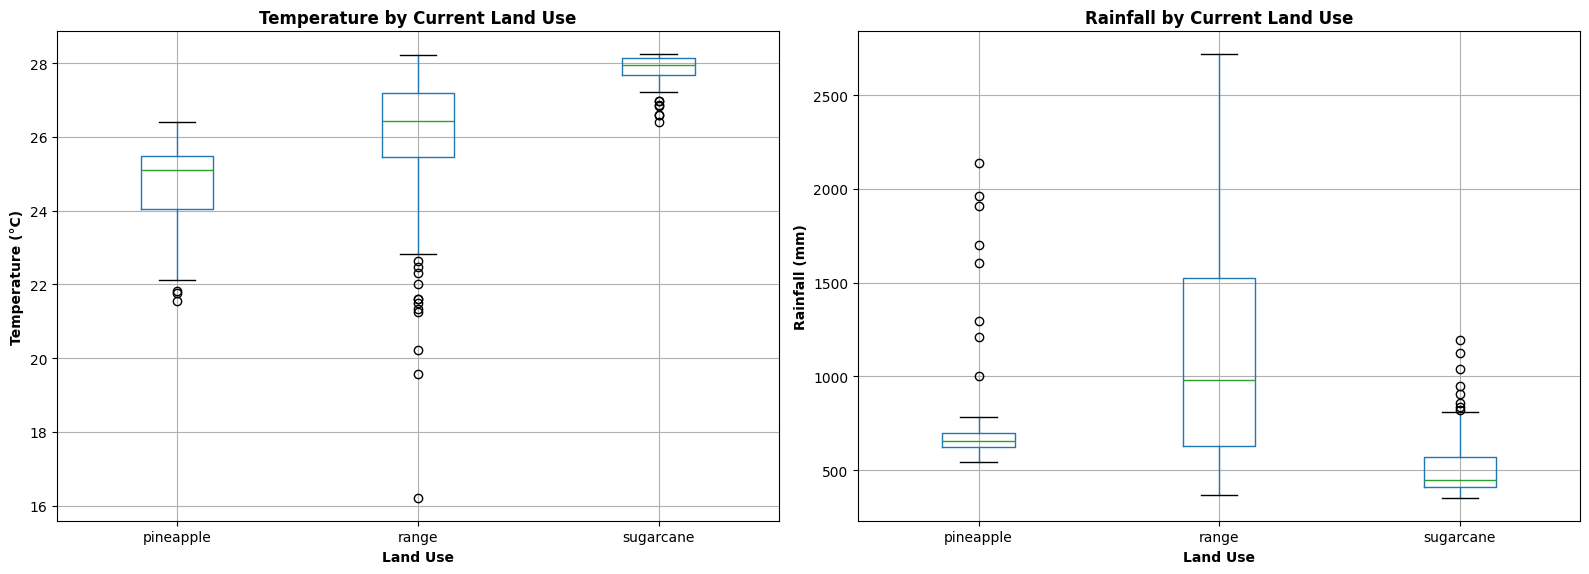

In [263]:
# 4. VISUALIZATIONS
fig = plt.figure(figsize=(16, 6))

# A. Temperature distribution by land use
ax1 = plt.subplot(1, 2, 1)
landuse_order = polygon_summary.groupby('landuse_current')['tmax_ann_mean_30m'].median().sort_values().index
polygon_summary.boxplot(column='tmax_ann_mean_30m', by='landuse_current', ax=ax1)
ax1.set_xlabel('Land Use', fontweight='bold')
ax1.set_ylabel('Temperature (°C)', fontweight='bold')
ax1.set_title('Temperature by Current Land Use', fontweight='bold')
ax1.get_figure().suptitle('')  # Remove the automatic grouped boxplot title

# B. Rainfall distribution by land use
ax2 = plt.subplot(1, 2, 2)
polygon_summary.boxplot(column='rainfall_ann_mm_30m', by='landuse_current', ax=ax2)
ax2.set_xlabel('Land Use', fontweight='bold')
ax2.set_ylabel('Rainfall (mm)', fontweight='bold')
ax2.set_title('Rainfall by Current Land Use', fontweight='bold')
ax2.get_figure().suptitle('')  # Remove the automatic grouped boxplot title

plt.tight_layout()
plt.show()


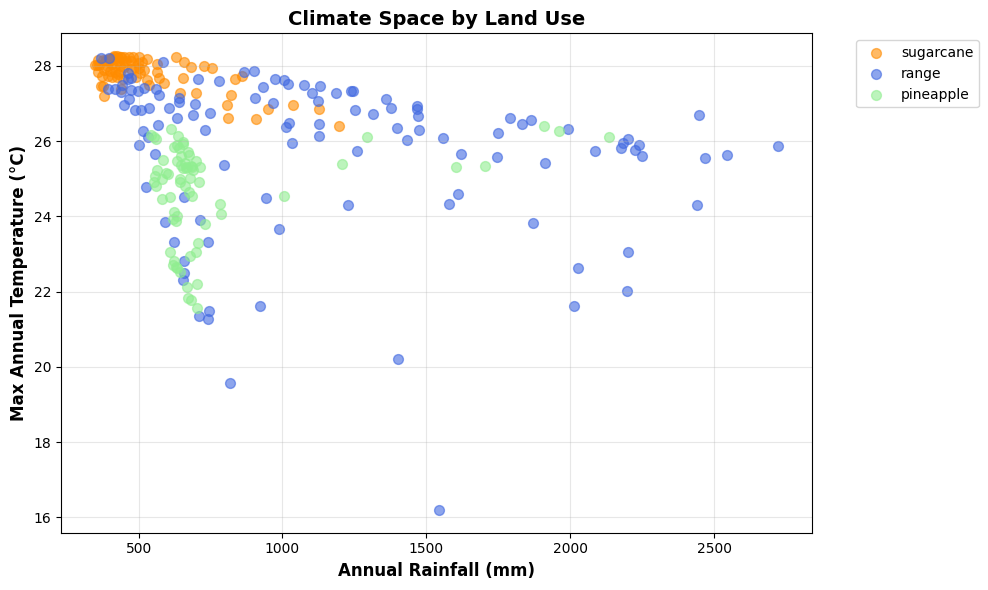

In [264]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each land use
color_map = {
    'sugarcane': '#FF8C00',
    'pineapple': '#90EE90',
    'range': '#4169E1'
}

for landuse in polygon_summary['landuse_current'].dropna().unique():
    subset = polygon_summary[polygon_summary['landuse_current'] == landuse]
    color = color_map.get(landuse, 'gray')  # Use gray as default for other land uses
    ax.scatter(subset['rainfall_ann_mm_30m'], subset['tmax_ann_mean_30m'],
               label=landuse, alpha=0.6, s=50, color=color)

ax.set_xlabel('Annual Rainfall (mm)', fontweight='bold', fontsize=12)
ax.set_ylabel('Max Annual Temperature (°C)', fontweight='bold', fontsize=12)
ax.set_title('Climate Space by Land Use', fontweight='bold', fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

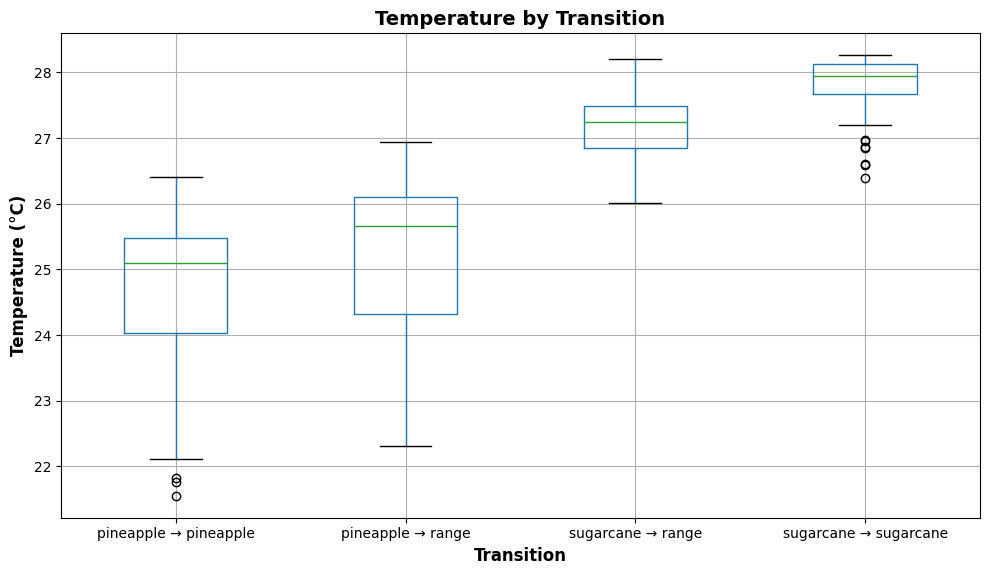

In [265]:
fig, ax = plt.subplots(figsize=(10, 6))

trans_subset.boxplot(column='tmax_ann_mean_30m', by='transition', ax=ax)
ax.set_xlabel('Transition', fontweight='bold', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=12)
ax.set_title('Temperature by Transition', fontweight='bold', fontsize=14)
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

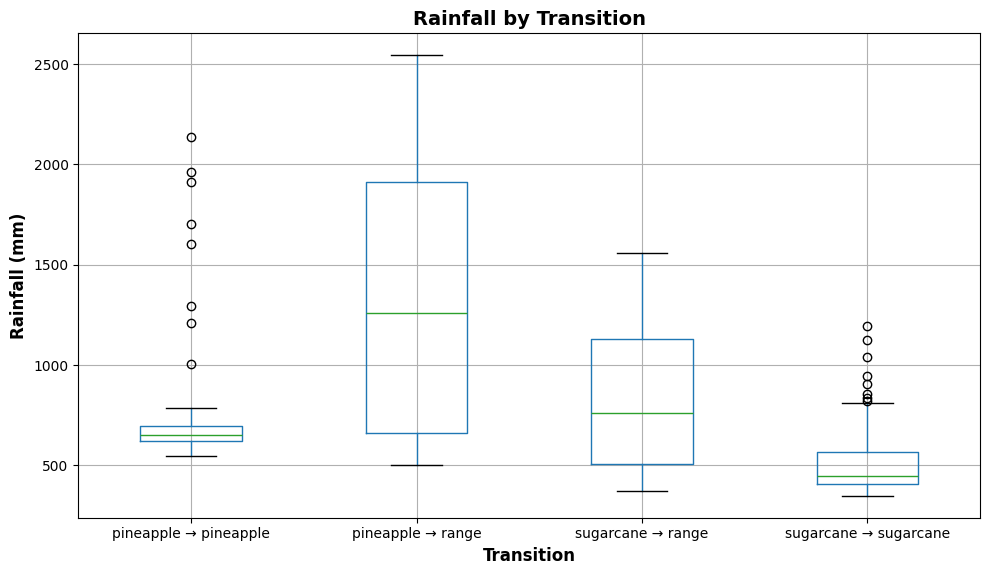

In [266]:
fig, ax = plt.subplots(figsize=(10, 6))

trans_subset.boxplot(column='rainfall_ann_mm_30m', by='transition', ax=ax)
ax.set_xlabel('Transition', fontweight='bold', fontsize=12)
ax.set_ylabel('Rainfall (mm)', fontweight='bold', fontsize=12)
ax.set_title('Rainfall by Transition', fontweight='bold', fontsize=14)
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

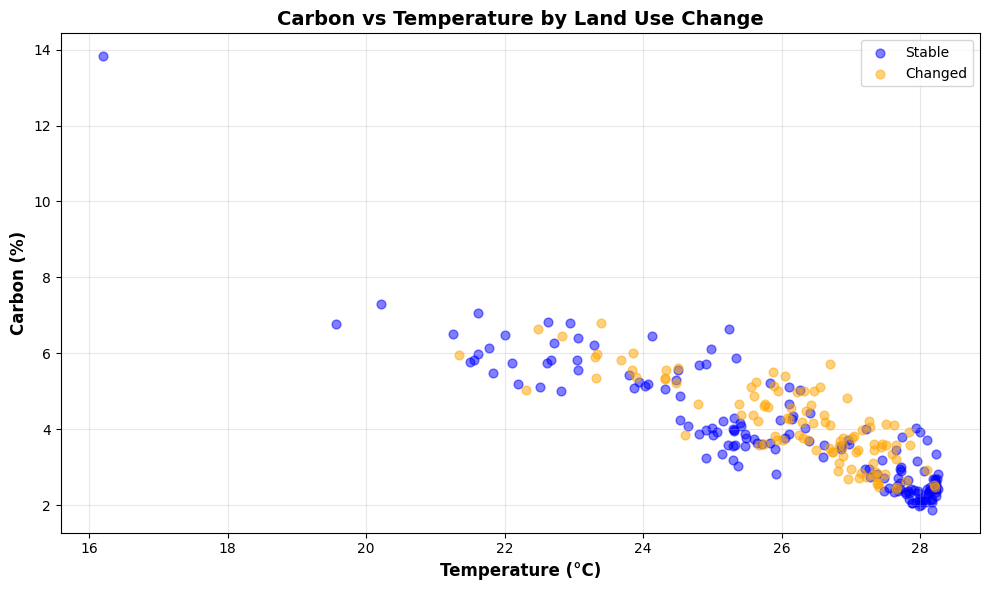

In [267]:
# Create land_use_changed column
polygon_summary['land_use_changed'] = polygon_summary['landuse_historic'] != polygon_summary['landuse_current']

# Now create the plot
fig, ax = plt.subplots(figsize=(10, 6))

changed = polygon_summary[polygon_summary['land_use_changed']]
stable = polygon_summary[~polygon_summary['land_use_changed']]

ax.scatter(stable['tmax_ann_mean_30m'], stable['carbon_mean'],
           c='blue', label='Stable', alpha=0.5, s=40)
ax.scatter(changed['tmax_ann_mean_30m'], changed['carbon_mean'],
           c='orange', label='Changed', alpha=0.5, s=40)

ax.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=12)
ax.set_ylabel('Carbon (%)', fontweight='bold', fontsize=12)
ax.set_title('Carbon vs Temperature by Land Use Change', fontweight='bold', fontsize=14)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

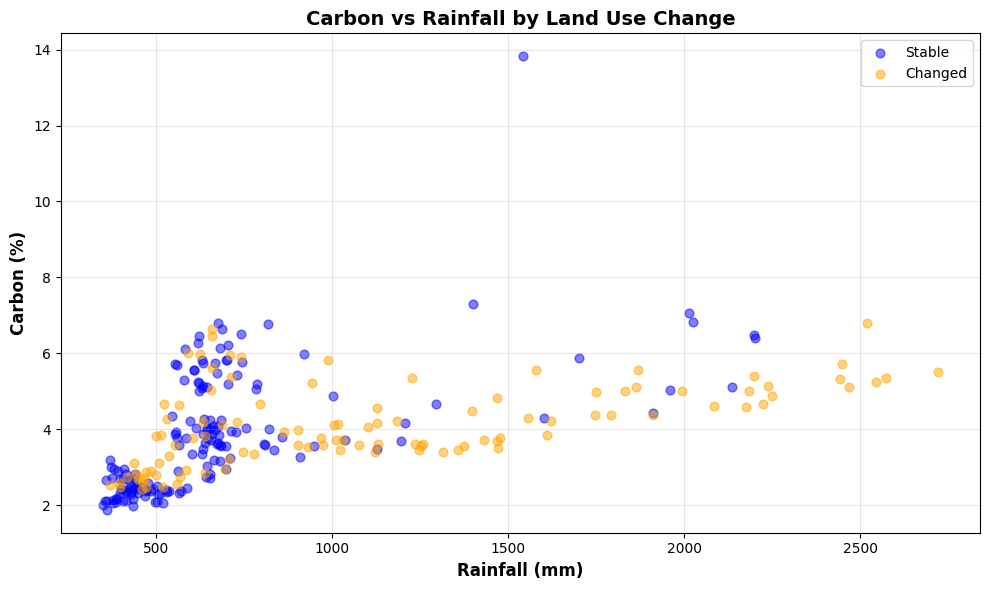

In [268]:
# Now create the plot
fig, ax = plt.subplots(figsize=(10, 6))

changed = polygon_summary[polygon_summary['land_use_changed']]
stable = polygon_summary[~polygon_summary['land_use_changed']]

ax.scatter(stable['rainfall_ann_mm_30m'], stable['carbon_mean'],
           c='blue', label='Stable', alpha=0.5, s=40)
ax.scatter(changed['rainfall_ann_mm_30m'], changed['carbon_mean'],
           c='orange', label='Changed', alpha=0.5, s=40)

ax.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=12)
ax.set_ylabel('Carbon (%)', fontweight='bold', fontsize=12)
ax.set_title('Carbon vs Rainfall by Land Use Change', fontweight='bold', fontsize=14)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

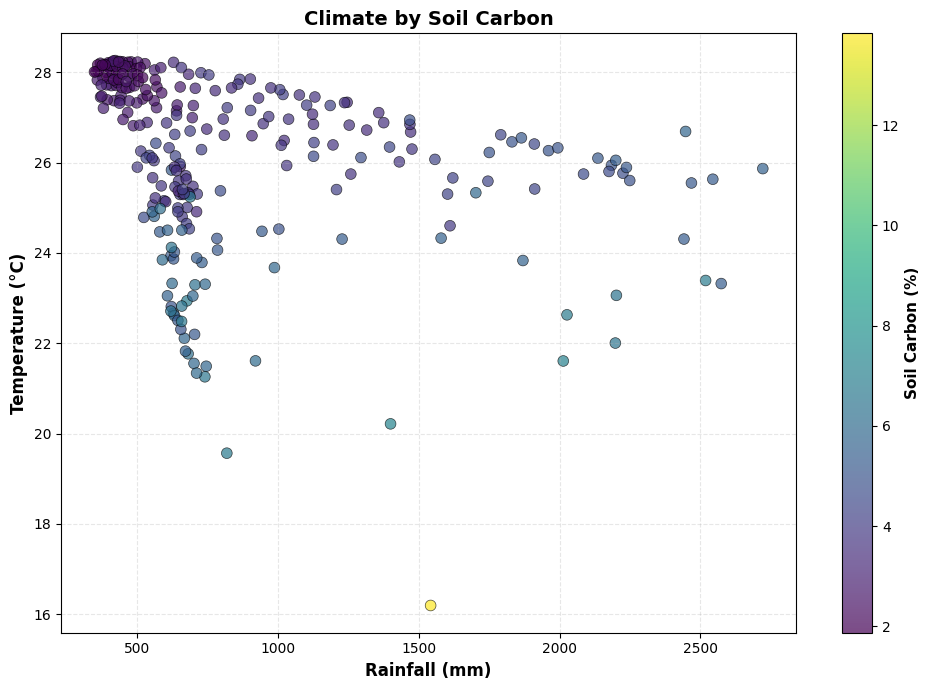

Climate-Carbon relationships:
Warmest & driest:  rainfall_ann_mm_30m  tmax_ann_mean_30m  carbon_mean
          349.123964          28.010157     1.998622
          354.878779          28.012045     2.098425
          359.304316          27.830047     2.673450
          360.459859          28.164342     1.870278
          362.470465          28.032421     2.103350

Coolest & wettest:  rainfall_ann_mm_30m  tmax_ann_mean_30m  carbon_mean
         2721.218082          25.868679     5.516456
         2573.719000          23.322577     5.355303
         2543.830500          25.633612     5.241377
         2518.254000          23.391094     6.804650
         2467.972636          25.550767     5.121552


In [269]:
fig, ax = plt.subplots(figsize=(10, 7))

# Create scatter plot with carbon as color
scatter = ax.scatter(polygon_summary['rainfall_ann_mm_30m'],
                     polygon_summary['tmax_ann_mean_30m'],
                     c=polygon_summary['carbon_mean'],
                     cmap='viridis',  # Color scale
                     s=60,
                     alpha=0.7,
                     edgecolors='black',
                     linewidths=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Soil Carbon (%)')
cbar.set_label('Soil Carbon (%)', fontweight='bold', fontsize=11)

ax.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=12)
ax.set_title('Climate by Soil Carbon', fontweight='bold', fontsize=14)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Optional: Print some statistics
print("Climate-Carbon relationships:")
print(f"Warmest & driest: {polygon_summary.nsmallest(5, 'rainfall_ann_mm_30m')[['rainfall_ann_mm_30m', 'tmax_ann_mean_30m', 'carbon_mean']].to_string(index=False)}")
print(f"\nCoolest & wettest: {polygon_summary.nlargest(5, 'rainfall_ann_mm_30m')[['rainfall_ann_mm_30m', 'tmax_ann_mean_30m', 'carbon_mean']].to_string(index=False)}")

In [270]:
# 5. CORRELATION ANALYSIS
print("\n" + "="*80)
print("CORRELATION: CARBON WITH CLIMATE VARIABLES")
print("="*80)
print(f"Carbon vs Temperature: r = {polygon_summary[['carbon_mean', 'tmax_ann_mean_30m']].corr().iloc[0,1]:.3f}")
print(f"Carbon vs Rainfall: r = {polygon_summary[['carbon_mean', 'rainfall_ann_mm_30m']].corr().iloc[0,1]:.3f}")

# By stable vs changed
print("\nStable polygons:")
print(f"  Carbon vs Temperature: r = {stable[['carbon_mean', 'tmax_ann_mean_30m']].corr().iloc[0,1]:.3f}")
print(f"  Carbon vs Rainfall: r = {stable[['carbon_mean', 'rainfall_ann_mm_30m']].corr().iloc[0,1]:.3f}")

print("\nChanged polygons:")
print(f"  Carbon vs Temperature: r = {changed[['carbon_mean', 'tmax_ann_mean_30m']].corr().iloc[0,1]:.3f}")
print(f"  Carbon vs Rainfall: r = {changed[['carbon_mean', 'rainfall_ann_mm_30m']].corr().iloc[0,1]:.3f}")


CORRELATION: CARBON WITH CLIMATE VARIABLES
Carbon vs Temperature: r = -0.872
Carbon vs Rainfall: r = 0.491

Stable polygons:
  Carbon vs Temperature: r = -0.902
  Carbon vs Rainfall: r = 0.570

Changed polygons:
  Carbon vs Temperature: r = -0.814
  Carbon vs Rainfall: r = 0.525


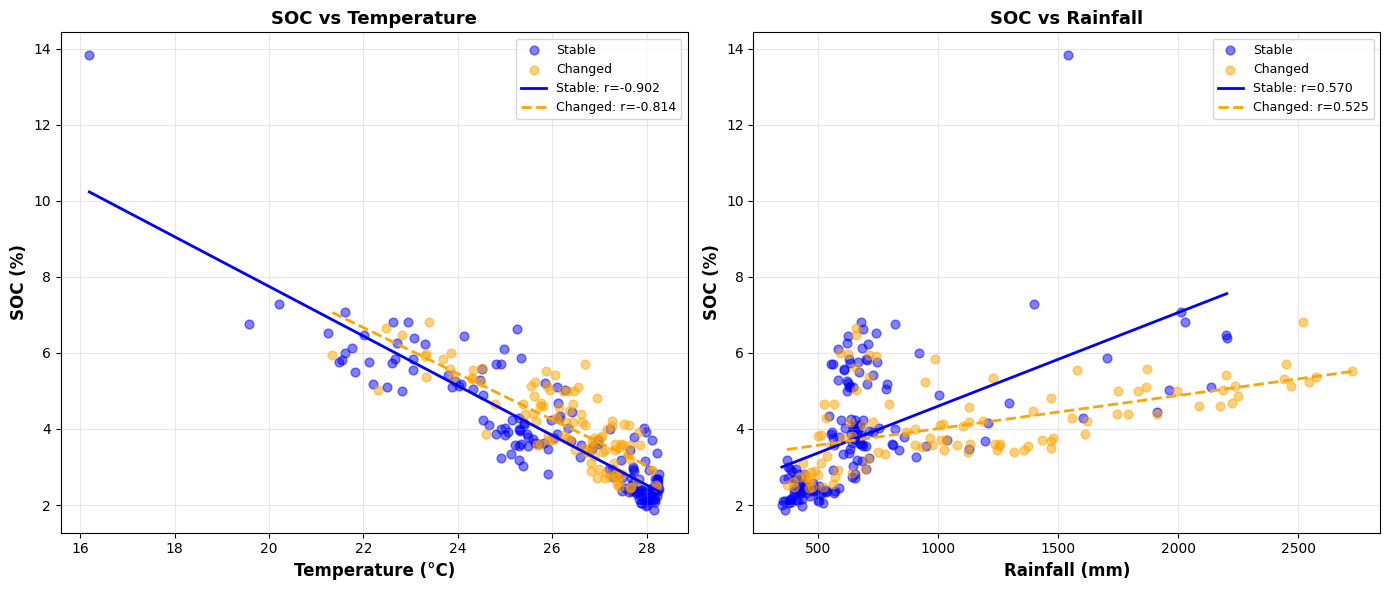


REGRESSION STATISTICS

Temperature:
  Stable:  slope=-0.6530, r=-0.902, p=7.5038e-59
  Changed: slope=-0.6048, r=-0.814, p=2.9848e-26

Rainfall:
  Stable:  slope=0.002461, r=0.570, p=5.7171e-15
  Changed: slope=0.000872, r=0.525, p=7.3311e-09


In [271]:
from scipy import stats
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# LEFT: Carbon vs Temperature with regression lines
ax1 = axes[0]
ax1.scatter(stable['tmax_ann_mean_30m'], stable['carbon_mean'],
           c='blue', label='Stable', alpha=0.5, s=40)
ax1.scatter(changed['tmax_ann_mean_30m'], changed['carbon_mean'],
           c='orange', label='Changed', alpha=0.5, s=40)

# Add regression lines
# For stable
slope_s, intercept_s, r_s, p_s, se_s = stats.linregress(stable['tmax_ann_mean_30m'].dropna(),
                                                          stable['carbon_mean'].dropna())
x_stable = np.array([stable['tmax_ann_mean_30m'].min(), stable['tmax_ann_mean_30m'].max()])
ax1.plot(x_stable, slope_s * x_stable + intercept_s, 'b-', linewidth=2,
         label=f'Stable: r={r_s:.3f}')

# For changed
slope_c, intercept_c, r_c, p_c, se_c = stats.linregress(changed['tmax_ann_mean_30m'].dropna(),
                                                          changed['carbon_mean'].dropna())
x_changed = np.array([changed['tmax_ann_mean_30m'].min(), changed['tmax_ann_mean_30m'].max()])
ax1.plot(x_changed, slope_c * x_changed + intercept_c, 'orange', linewidth=2, linestyle='--',
         label=f'Changed: r={r_c:.3f}')

ax1.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=12)
ax1.set_ylabel('SOC (%)', fontweight='bold', fontsize=12)
ax1.set_title('SOC vs Temperature', fontweight='bold', fontsize=13)
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# RIGHT: Carbon vs Rainfall with regression lines
ax2 = axes[1]
ax2.scatter(stable['rainfall_ann_mm_30m'], stable['carbon_mean'],
           c='blue', label='Stable', alpha=0.5, s=40)
ax2.scatter(changed['rainfall_ann_mm_30m'], changed['carbon_mean'],
           c='orange', label='Changed', alpha=0.5, s=40)

# For stable
slope_s2, intercept_s2, r_s2, p_s2, se_s2 = stats.linregress(stable['rainfall_ann_mm_30m'].dropna(),
                                                               stable['carbon_mean'].dropna())
x_stable2 = np.array([stable['rainfall_ann_mm_30m'].min(), stable['rainfall_ann_mm_30m'].max()])
ax2.plot(x_stable2, slope_s2 * x_stable2 + intercept_s2, 'b-', linewidth=2,
         label=f'Stable: r={r_s2:.3f}')

# For changed
slope_c2, intercept_c2, r_c2, p_c2, se_c2 = stats.linregress(changed['rainfall_ann_mm_30m'].dropna(),
                                                               changed['carbon_mean'].dropna())
x_changed2 = np.array([changed['rainfall_ann_mm_30m'].min(), changed['rainfall_ann_mm_30m'].max()])
ax2.plot(x_changed2, slope_c2 * x_changed2 + intercept_c2, 'orange', linewidth=2, linestyle='--',
         label=f'Changed: r={r_c2:.3f}')

ax2.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=12)
ax2.set_ylabel('SOC (%)', fontweight='bold', fontsize=12)
ax2.set_title('SOC vs Rainfall', fontweight='bold', fontsize=13)
ax2.legend(fontsize=9)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("REGRESSION STATISTICS")
print("="*80)
print("\nTemperature:")
print(f"  Stable:  slope={slope_s:.4f}, r={r_s:.3f}, p={p_s:.4e}")
print(f"  Changed: slope={slope_c:.4f}, r={r_c:.3f}, p={p_c:.4e}")
print("\nRainfall:")
print(f"  Stable:  slope={slope_s2:.6f}, r={r_s2:.3f}, p={p_s2:.4e}")
print(f"  Changed: slope={slope_c2:.6f}, r={r_c2:.3f}, p={p_c2:.4e}")

In [272]:
suborders

,OBJECTID,MUSYM,MUKEY,CompKey,CompName,TaxClass,SoilOrder,Suborder,GreatGroup,Subgroup,MoistRegim,geometry
0,2187,WeB,468350,468350:650877,Waiakoa,"Fine, kaolinitic, isohyperthermic Torroxic Hap...",Mollisols,Ustolls,Haplustolls,Torroxic Haplustolls,None,"MULTIPOLYGON (((764441.485 2310096.654, 764445..."
1,2189,MfC,468310,468310:650834,Makawao,"Very-fine, parasesquic, isothermic Ustic Paleh...",Ultisols,Humults,Palehumults,Ustic Palehumults,None,"MULTIPOLYGON (((779859.201 2310395.806, 779868..."
2,2191,HhC,468255,468255:650773,Haliimaile,"Very-fine, parasesquic, isothermic Oxic Dystru...",Inceptisols,Ustepts,Dystrustepts,Oxic Dystrustepts,None,"MULTIPOLYGON (((775646.213 2310231.357, 775662..."
3,2193,MfB,468309,468309:650833,Makawao,"Very-fine, parasesquic, isothermic Ustic Paleh...",Ultisols,Humults,Palehumults,Ustic Palehumults,None,"MULTIPOLYGON (((778662.973 2310256.104, 778711..."
4,2194,rRK,468370,468370:650900,Rock land,Lithic Ustorthents,Entisols,Orthents,Ustorthents,Lithic Ustorthents,None,"MULTIPOLYGON (((781277.382 2310236.638, 781309..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1847,41904,HbC,468251,468251:650769,Haiku,"Very-fine, ferritic, isohyperthermic Ustic Pal...",Ultisols,Humults,Palehumults,Ustic Palehumults,None,"MULTIPOLYGON (((778887.04 2315678.172, 778904...."
1848,42438,ONC,468319,468319:650843,Olinda,"Medial, ferrihydritic, isothermic Dystric Hapl...",Andisols,Ustands,Haplustands,Dystric Haplustands,None,"MULTIPOLYGON (((782630.315 2304084.661, 782625..."
1849,42440,KnaC,468288,468288:650810,Keahua,"Fine, kaolinitic, isohyperthermic Ustic Haploc...",Aridisols,Cambids,Haplocambids,Ustic Haplocambids,None,"MULTIPOLYGON (((773750.602 2303661.429, 773758..."
1850,42441,HgB,468252,468252:650770,Haliimaile,"Very-fine, parasesquic, isothermic Oxic Dystru...",Inceptisols,Ustepts,Dystrustepts,Oxic Dystrustepts,None,"MULTIPOLYGON (((778406.049 2304065.705, 778462..."


In [273]:
# Load the soil suborder geopackage
suborders = gpd.read_file('/content/clipped_haleakala_suborders.gpkg')

print(f"Suborders data: {len(suborders)} features")
print(f"Polygon summary: {len(polygon_summary)} polygons")

# Check if polygon_summary is a GeoDataFrame with geometry
if 'geometry' not in polygon_summary.columns:
    print("\nWarning: polygon_summary doesn't have geometry column. Need to get it from original carbon data.")
    # Get one representative point per polygon with its geometry
    polygon_geoms = carbon_landuse.groupby('poly_id').first()[['geometry']].reset_index()
    polygon_summary = polygon_summary.merge(polygon_geoms, on='poly_id', how='left')
    polygon_summary = gpd.GeoDataFrame(polygon_summary, geometry='geometry', crs=carbon_landuse.crs)

# Ensure both are GeoDataFrames with same CRS
polygon_summary = gpd.GeoDataFrame(polygon_summary, geometry='geometry')
print(f"\nPolygon summary CRS: {polygon_summary.crs}")
print(f"Suborders CRS: {suborders.crs}")

# Reproject if needed
if polygon_summary.crs != suborders.crs:
    polygon_summary = polygon_summary.to_crs(suborders.crs)

# Spatial join to get ALL suborders that intersect each polygon
polygon_soil_join = gpd.sjoin(polygon_summary, suborders[['Suborder', 'geometry']],
                               how='left', predicate='intersects')

# Aggregate suborders into a list per polygon
polygon_suborder_list = polygon_soil_join.groupby('poly_id')['Suborder'].apply(
    lambda x: ', '.join(x.dropna().unique()) if x.notna().any() else None
).reset_index()
polygon_suborder_list.rename(columns={'Suborder': 'Suborder_list'}, inplace=True)

# Add count of suborders
polygon_suborder_count = polygon_soil_join.groupby('poly_id')['Suborder'].nunique().reset_index()
polygon_suborder_count.rename(columns={'Suborder': 'n_suborders'}, inplace=True)

# Merge back to original polygon_summary
polygon_summary = polygon_summary.merge(polygon_suborder_list, on='poly_id', how='left')
polygon_summary = polygon_summary.merge(polygon_suborder_count, on='poly_id', how='left')

print(f"\nResult: {len(polygon_summary)} rows (original size maintained)")
print(f"Polygons with suborder data: {polygon_summary['Suborder_list'].notna().sum()}")
print(f"Polygons with multiple suborders: {(polygon_summary['n_suborders'] > 1).sum()}")

print("\nUnique suborder combinations:")
print(polygon_summary['Suborder_list'].value_counts().head(10))

print("\n✓ Suborder_list and n_suborders columns added to polygon_summary")

Suborders data: 1852 features
Polygon summary: 264 polygons


Polygon summary CRS: PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32604"]]
Suborders CRS: EPSG:32604

Result: 264 rows (original size maintained)
Polygons with suborder data: 264
Polygons with multiple suborders: 0

Unique suborder combinations:
Suborder_list
Cambids      74
Ustolls      71
Ustands      39
Humults      28
Torrox       20
Ustepts      12
Orthents      8
Andepts       7
Torra

In [274]:
# View the first few rows with the new columns
print("First 10 rows with soil suborder info:")
print(polygon_summary[['poly_id', 'landuse_current', 'carbon_mean',
                       'Suborder_list', 'n_suborders']].head(10))

# View full dataframe info
print("\n" + "="*80)
print("DATAFRAME INFO")
print("="*80)
print(f"Total columns: {len(polygon_summary.columns)}")
print(f"Column names: {polygon_summary.columns.tolist()}")

# Summary statistics by suborder
print("\n" + "="*80)
print("CARBON BY SOIL SUBORDER")
print("="*80)
carbon_by_suborder = polygon_summary.groupby('Suborder_list').agg({
    'carbon_mean': ['mean', 'std', 'min', 'max'],
    'poly_id': 'count'
}).round(2)
carbon_by_suborder.columns = ['carbon_mean', 'carbon_std', 'carbon_min', 'carbon_max', 'n_polygons']
carbon_by_suborder = carbon_by_suborder.sort_values('carbon_mean', ascending=False)
print(carbon_by_suborder)

# View specific rows if interested
print("\n" + "="*80)
print("SAMPLE: Polygons with highest carbon")
print("="*80)
high_carbon = polygon_summary.nlargest(5, 'carbon_mean')[['poly_id', 'carbon_mean',
                                                            'landuse_current', 'Suborder_list',
                                                            'tmax_ann_mean_30m', 'rainfall_ann_mm_30m']]
print(high_carbon.to_string(index=False))

print("\n" + "="*80)
print("SAMPLE: Polygons with lowest carbon")
print("="*80)
low_carbon = polygon_summary.nsmallest(5, 'carbon_mean')[['poly_id', 'carbon_mean',
                                                            'landuse_current', 'Suborder_list',
                                                            'tmax_ann_mean_30m', 'rainfall_ann_mm_30m']]
print(low_carbon.to_string(index=False))

# Save to CSV to view in Excel/other programs
polygon_summary.drop(columns=['geometry']).to_csv('polygon_summary_with_suborder.csv', index=False)
print("\n✓ Saved to polygon_summary_with_suborder.csv")

First 10 rows with soil suborder info:
   poly_id landuse_current  carbon_mean Suborder_list  n_suborders
0        0       sugarcane     2.692066       Ustolls            1
1        1       sugarcane     2.683129       Ustolls            1
2        2       sugarcane     2.171283       Ustolls            1
3        3           range     3.584352       Humults            1
4        4           range     3.395355       Humults            1
5        5           range     4.066640       Ustolls            1
6        6           range     3.563886       Ustolls            1
7        7           range     4.220030       Ustolls            1
8        8           range     3.545681       Ustepts            1
9        9           range     3.500248       Ustepts            1

DATAFRAME INFO
Total columns: 23
Column names: ['poly_id', 'carbon_mean', 'carbon_median', 'carbon_std', 'carbon_min', 'carbon_max', 'carbon_first_year', 'carbon_last_year', 'carbon_change', 'carbon_pct_change', 'tmax_ann_m

/tmp/ipython-input-2983952477.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(boxplot_data, labels=suborder_order, patch_artist=True)


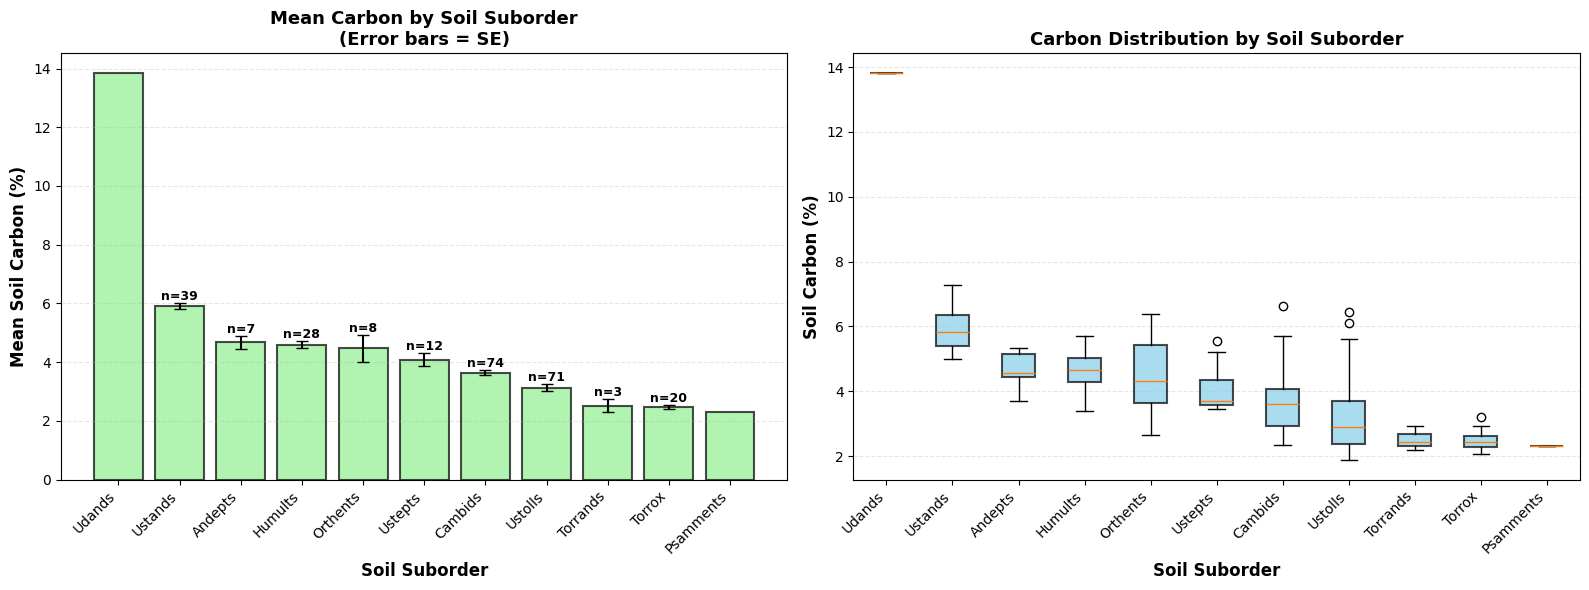


CARBON BY SOIL SUBORDER - SUMMARY
 Suborder      mean      std  count       se
   Udands 13.831898      NaN      1      NaN
  Ustands  5.913376 0.614291     39 0.098365
  Andepts  4.675424 0.570010      7 0.215443
  Humults  4.595986 0.620261     28 0.117218
 Orthents  4.474829 1.321356      8 0.467170
  Ustepts  4.089065 0.732920     12 0.211576
  Cambids  3.647925 0.830033     74 0.096489
  Ustolls  3.139418 0.995378     71 0.118130
 Torrands  2.517018 0.386157      3 0.222948
   Torrox  2.480511 0.300278     20 0.067144
Psamments  2.306259      NaN      1      NaN

ONE-WAY ANOVA
F-statistic: 56.423
p-value: 1.0183e-58
Significant at α=0.05: Yes

Interpretation: Soil suborder has a significant effect on carbon levels


In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate summary stats for bar plot
suborder_stats = polygon_summary.groupby('Suborder_list').agg({
    'carbon_mean': ['mean', 'std', 'count']
}).reset_index()
suborder_stats.columns = ['Suborder', 'mean', 'std', 'count']

# Calculate standard error
suborder_stats['se'] = suborder_stats['std'] / np.sqrt(suborder_stats['count'])

# Sort by mean carbon
suborder_stats = suborder_stats.sort_values('mean', ascending=False)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LEFT: Bar plot with error bars
ax1 = axes[0]
x_pos = np.arange(len(suborder_stats))
bars = ax1.bar(x_pos, suborder_stats['mean'],
               yerr=suborder_stats['se'],
               capsize=4,
               alpha=0.7,
               color='#90EE90',
               edgecolor='black',
               linewidth=1.5)

# Add sample sizes on bars
for i, (idx, row) in enumerate(suborder_stats.iterrows()):
    ax1.text(i, row['mean'] + row['se'] + 0.1,
            f"n={int(row['count'])}",
            ha='center',
            fontsize=9,
            fontweight='bold')

ax1.set_ylabel('Mean Soil Carbon (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Soil Suborder', fontsize=12, fontweight='bold')
ax1.set_title('Mean Carbon by Soil Suborder\n(Error bars = SE)', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(suborder_stats['Suborder'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# RIGHT: Box plot
ax2 = axes[1]
suborder_order = suborder_stats['Suborder'].tolist()
boxplot_data = [polygon_summary[polygon_summary['Suborder_list'] == sub]['carbon_mean'].values
                for sub in suborder_order]

bp = ax2.boxplot(boxplot_data, labels=suborder_order, patch_artist=True)

# Color boxes
for patch in bp['boxes']:
    patch.set_facecolor('#87CEEB')
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

ax2.set_ylabel('Soil Carbon (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Soil Suborder', fontsize=12, fontweight='bold')
ax2.set_title('Carbon Distribution by Soil Suborder', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=10)
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("CARBON BY SOIL SUBORDER - SUMMARY")
print("="*80)
print(suborder_stats.to_string(index=False))

# Statistical test - ANOVA
from scipy import stats as scipy_stats
groups = [polygon_summary[polygon_summary['Suborder_list'] == sub]['carbon_mean'].values
          for sub in suborder_stats['Suborder']]
f_stat, p_value = scipy_stats.f_oneway(*groups)

print(f"\n" + "="*80)
print("ONE-WAY ANOVA")
print("="*80)
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.4e}")
print(f"Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")
print("\nInterpretation: ", end="")
if p_value < 0.05:
    print("Soil suborder has a significant effect on carbon levels")
else:
    print("No significant difference in carbon across soil suborders")

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# ============================================================================
# 1. DESCRIPTIVE STATISTICS
# ============================================================================
print("="*80)
print("CLIMATE GRADIENT STUDY: DESCRIPTIVE STATISTICS")
print("="*80)

print("\nSample size: n =", len(polygon_summary))
print("\nResponse variable (Soil Carbon %):")
print(f"  Mean ± SD: {polygon_summary['carbon_mean'].mean():.2f} ± {polygon_summary['carbon_mean'].std():.2f}%")
print(f"  Range: {polygon_summary['carbon_mean'].min():.2f} - {polygon_summary['carbon_mean'].max():.2f}%")

print("\nClimate gradient variables:")
print(f"  Temperature: {polygon_summary['tmax_ann_mean_30m'].min():.1f} - {polygon_summary['tmax_ann_mean_30m'].max():.1f}°C")
print(f"  Rainfall: {polygon_summary['rainfall_ann_mm_30m'].min():.0f} - {polygon_summary['rainfall_ann_mm_30m'].max():.0f} mm")

print("\nLand use distribution:")
print(polygon_summary['landuse_current'].value_counts())

print("\nLand use change:")
print(f"  Stable: {(~polygon_summary['land_use_changed']).sum()} polygons")
print(f"  Changed: {polygon_summary['land_use_changed'].sum()} polygons")

CLIMATE GRADIENT STUDY: DESCRIPTIVE STATISTICS

Sample size: n = 264

Response variable (Soil Carbon %):
  Mean ± SD: 3.95 ± 1.43%
  Range: 1.87 - 13.83%

Climate gradient variables:
  Temperature: 16.2 - 28.3°C
  Rainfall: 349 - 2721 mm

Land use distribution:
landuse_current
range        114
sugarcane     78
pineapple     70
Name: count, dtype: int64

Land use change:
  Stable: 158 polygons
  Changed: 106 polygons



CORRELATION MATRIX

Pearson correlations:
                     carbon_mean  tmax_ann_mean_30m  rainfall_ann_mm_30m  \
carbon_mean                1.000             -0.872                0.491   
tmax_ann_mean_30m         -0.872              1.000               -0.284   
rainfall_ann_mm_30m        0.491             -0.284                1.000   
carbon_change              0.548             -0.530                0.206   
carbon_pct_change          0.666             -0.619                0.350   

                     carbon_change  carbon_pct_change  
carbon_mean                  0.548              0.666  
tmax_ann_mean_30m           -0.530             -0.619  
rainfall_ann_mm_30m          0.206              0.350  
carbon_change                1.000              0.942  
carbon_pct_change            0.942              1.000  


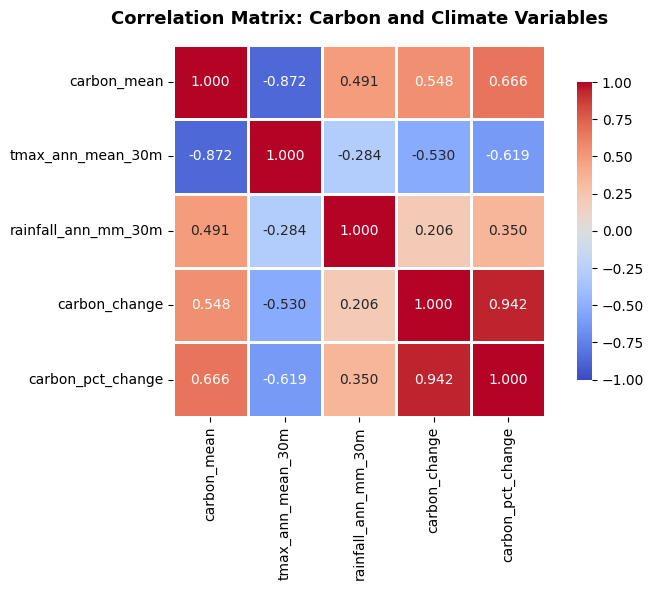

In [277]:
# ============================================================================
# 2. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("CORRELATION MATRIX")
print("="*80)

# Create correlation matrix
corr_vars = ['carbon_mean', 'tmax_ann_mean_30m', 'rainfall_ann_mm_30m',
             'carbon_change', 'carbon_pct_change']
corr_matrix = polygon_summary[corr_vars].corr()

print("\nPearson correlations:")
print(corr_matrix.round(3))

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, fmt='.3f', ax=ax)
ax.set_title('Correlation Matrix: Carbon and Climate Variables',
             fontweight='bold', fontsize=13, pad=15)
plt.tight_layout()
plt.show()

In [278]:
# ============================================================================
# 3. SIMPLE LINEAR REGRESSIONS
# ============================================================================
print("\n" + "="*80)
print("SIMPLE LINEAR REGRESSIONS")
print("="*80)

from scipy.stats import linregress

# Temperature effect
slope_temp, intercept_temp, r_temp, p_temp, se_temp = linregress(
    polygon_summary['tmax_ann_mean_30m'].dropna(),
    polygon_summary['carbon_mean'].dropna()
)

print("\nModel 1: Carbon ~ Temperature")
print(f"  Equation: Carbon = {intercept_temp:.3f} + {slope_temp:.3f} × Temperature")
print(f"  R² = {r_temp**2:.3f}")
print(f"  p-value = {p_temp:.4e}")
print(f"  Interpretation: Each 1°C increase → {slope_temp:.3f}% carbon change")

# Rainfall effect
slope_rain, intercept_rain, r_rain, p_rain, se_rain = linregress(
    polygon_summary['rainfall_ann_mm_30m'].dropna(),
    polygon_summary['carbon_mean'].dropna()
)

print("\nModel 2: Carbon ~ Rainfall")
print(f"  Equation: Carbon = {intercept_rain:.3f} + {slope_rain:.6f} × Rainfall")
print(f"  R² = {r_rain**2:.3f}")
print(f"  p-value = {p_rain:.4e}")
print(f"  Interpretation: Each 100mm increase → {slope_rain*100:.3f}% carbon change")



SIMPLE LINEAR REGRESSIONS

Model 1: Carbon ~ Temperature
  Equation: Carbon = 20.568 + -0.637 × Temperature
  R² = 0.761
  p-value = 2.4758e-83
  Interpretation: Each 1°C increase → -0.637% carbon change

Model 2: Carbon ~ Rainfall
  Equation: Carbon = 2.831 + 0.001293 × Rainfall
  R² = 0.241
  p-value = 2.1445e-17
  Interpretation: Each 100mm increase → 0.129% carbon change


In [279]:
# ============================================================================
# 4. MULTIPLE REGRESSION
# ============================================================================
print("\n" + "="*80)
print("MULTIPLE LINEAR REGRESSION")
print("="*80)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare data
X = polygon_summary[['tmax_ann_mean_30m', 'rainfall_ann_mm_30m']].dropna()
y = polygon_summary.loc[X.index, 'carbon_mean']

# Fit model
mlr = LinearRegression()
mlr.fit(X, y)
y_pred = mlr.predict(X)
r2 = r2_score(y, y_pred)

print("\nModel 3: Carbon ~ Temperature + Rainfall")
print(f"  Equation: Carbon = {mlr.intercept_:.3f} + {mlr.coef_[0]:.3f}×Temp + {mlr.coef_[1]:.6f}×Rain")
print(f"  R² = {r2:.3f}")
print(f"  Temperature coefficient: {mlr.coef_[0]:.3f} (°C)")
print(f"  Rainfall coefficient: {mlr.coef_[1]:.6f} (mm)")


MULTIPLE LINEAR REGRESSION

Model 3: Carbon ~ Temperature + Rainfall
  Equation: Carbon = 18.535 + -0.582×Temp + 0.000697×Rain
  R² = 0.825
  Temperature coefficient: -0.582 (°C)
  Rainfall coefficient: 0.000697 (mm)



GENERATING CLIMATE GRADIENT VISUALIZATIONS


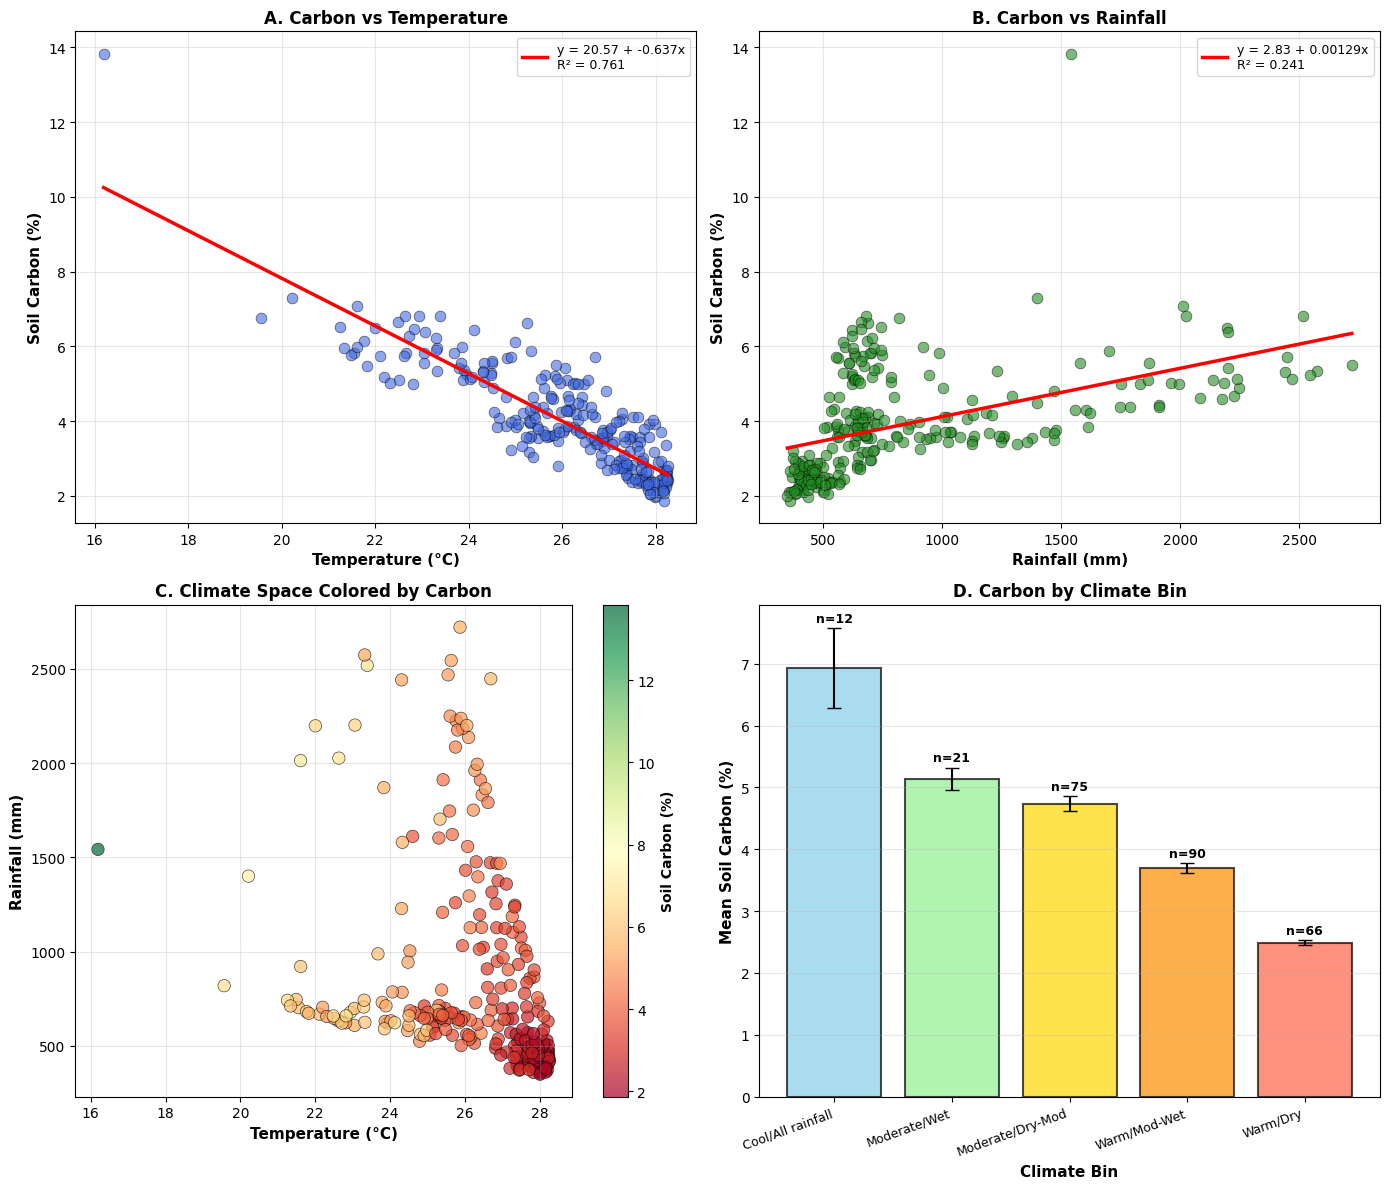

In [280]:
# ============================================================================
# 5. CLIMATE GRADIENT VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("GENERATING CLIMATE GRADIENT VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# A. Carbon vs Temperature with regression
ax1 = axes[0, 0]
ax1.scatter(polygon_summary['tmax_ann_mean_30m'], polygon_summary['carbon_mean'],
           alpha=0.6, s=60, edgecolors='black', linewidths=0.5, c='#4169E1')
x_temp = np.linspace(polygon_summary['tmax_ann_mean_30m'].min(),
                     polygon_summary['tmax_ann_mean_30m'].max(), 100)
y_temp = slope_temp * x_temp + intercept_temp
ax1.plot(x_temp, y_temp, 'r-', linewidth=2.5,
         label=f'y = {intercept_temp:.2f} + {slope_temp:.3f}x\nR² = {r_temp**2:.3f}')
ax1.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=11)
ax1.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=11)
ax1.set_title('A. Carbon vs Temperature', fontweight='bold', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# B. Carbon vs Rainfall with regression
ax2 = axes[0, 1]
ax2.scatter(polygon_summary['rainfall_ann_mm_30m'], polygon_summary['carbon_mean'],
           alpha=0.6, s=60, edgecolors='black', linewidths=0.5, c='#228B22')
x_rain = np.linspace(polygon_summary['rainfall_ann_mm_30m'].min(),
                     polygon_summary['rainfall_ann_mm_30m'].max(), 100)
y_rain = slope_rain * x_rain + intercept_rain
ax2.plot(x_rain, y_rain, 'r-', linewidth=2.5,
         label=f'y = {intercept_rain:.2f} + {slope_rain:.5f}x\nR² = {r_rain**2:.3f}')
ax2.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=11)
ax2.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=11)
ax2.set_title('B. Carbon vs Rainfall', fontweight='bold', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(alpha=0.3)

# C. 2D climate space colored by carbon
ax3 = axes[1, 0]
scatter = ax3.scatter(polygon_summary['tmax_ann_mean_30m'],
                     polygon_summary['rainfall_ann_mm_30m'],
                     c=polygon_summary['carbon_mean'],
                     cmap='RdYlGn', s=80, alpha=0.7,
                     edgecolors='black', linewidths=0.5)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Soil Carbon (%)', fontweight='bold', fontsize=10)
ax3.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=11)
ax3.set_ylabel('Rainfall (mm)', fontweight='bold', fontsize=11)
ax3.set_title('C. Climate Space Colored by Carbon', fontweight='bold', fontsize=12)
ax3.grid(alpha=0.3)

# D. Carbon by climate bin
ax4 = axes[1, 1]
climate_bin_summary = polygon_summary.groupby('climate_description')['carbon_mean'].agg(['mean', 'std', 'count']).reset_index()
climate_bin_summary['se'] = climate_bin_summary['std'] / np.sqrt(climate_bin_summary['count'])
climate_bin_summary = climate_bin_summary.sort_values('mean', ascending=False)

x_pos = np.arange(len(climate_bin_summary))
bars = ax4.bar(x_pos, climate_bin_summary['mean'],
              yerr=climate_bin_summary['se'],
              capsize=5, alpha=0.7,
              color=['#87CEEB', '#90EE90', '#FFD700', '#FF8C00', '#FF6347'][:len(climate_bin_summary)],
              edgecolor='black', linewidth=1.5)

# Fix: iterate over enumerate to get correct x position
for i, (idx, row) in enumerate(climate_bin_summary.iterrows()):
    ax4.text(i, row['mean'] + row['se'] + 0.1,  # Use i instead of x_pos[i]
            f"n={int(row['count'])}", ha='center', fontsize=9, fontweight='bold')

ax4.set_xticks(x_pos)
ax4.set_xticklabels(climate_bin_summary['climate_description'], rotation=20, ha='right', fontsize=9)
ax4.set_ylabel('Mean Soil Carbon (%)', fontweight='bold', fontsize=11)
ax4.set_xlabel('Climate Bin', fontweight='bold', fontsize=11)
ax4.set_title('D. Carbon by Climate Bin', fontweight='bold', fontsize=12)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


LAND USE EFFECTS ALONG CLIMATE GRADIENT

Sugarcane: Carbon ~ Temperature
  R² = 0.316, p = 0.0000

Pineapple: Carbon ~ Temperature
  R² = 0.405, p = 0.0000

Range: Carbon ~ Temperature
  R² = 0.775, p = 0.0000

Sugarcane: Carbon ~ Rainfall
  R² = 0.575, p = 0.0000

Pineapple: Carbon ~ Rainfall
  R² = 0.007, p = 0.4983

Range: Carbon ~ Rainfall
  R² = 0.175, p = 0.0000


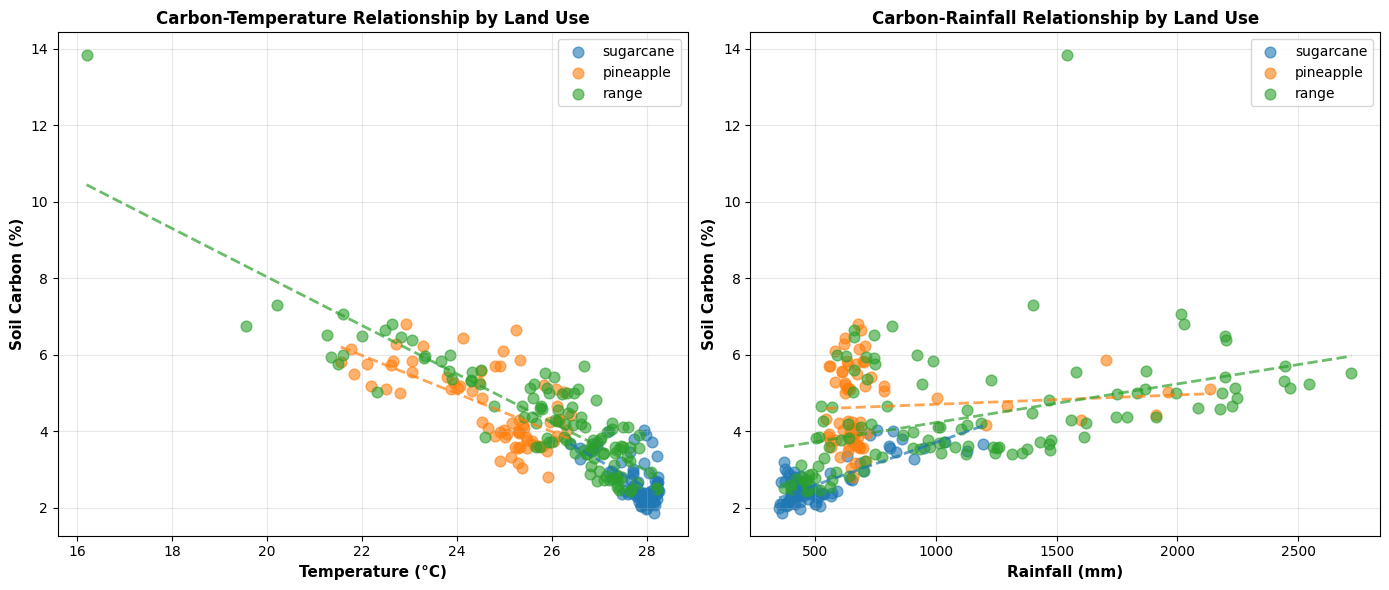


SUMMARY TABLE: CLIMATE GRADIENT EFFECTS
         Variable           Model       R²         Coefficient                            p-value
      Temperature   Simple Linear 0.760696           -0.637206                                0.0
         Rainfall   Simple Linear 0.240693            0.001293                                0.0
Temp + Rain (MLR) Multiple Linear 0.825028 T:-0.582, R:0.00070 N/A (use statsmodels for p-values)

Key findings:
  - Temperature explains 76.1% of carbon variation (strong negative effect)
  - Rainfall explains 24.1% of carbon variation (moderate positive effect)
  - Combined model explains 82.5% of variation


In [281]:
# ============================================================================
# 6. LAND USE EFFECTS ALONG CLIMATE GRADIENT
# ============================================================================
print("\n" + "="*80)
print("LAND USE EFFECTS ALONG CLIMATE GRADIENT")
print("="*80)

# Analyze by land use type
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature by land use
ax1 = axes[0]
for landuse in ['sugarcane', 'pineapple', 'range']:
    subset = polygon_summary[polygon_summary['landuse_current'] == landuse]
    if len(subset) > 0:
        ax1.scatter(subset['tmax_ann_mean_30m'], subset['carbon_mean'],
                   label=landuse, alpha=0.6, s=60)
        # Add regression line
        if len(subset) > 2:
            slope, intercept, r, p, se = linregress(subset['tmax_ann_mean_30m'], subset['carbon_mean'])
            x_range = np.linspace(subset['tmax_ann_mean_30m'].min(), subset['tmax_ann_mean_30m'].max(), 50)
            ax1.plot(x_range, slope * x_range + intercept, '--', linewidth=2, alpha=0.7)
            print(f"\n{landuse.capitalize()}: Carbon ~ Temperature")
            print(f"  R² = {r**2:.3f}, p = {p:.4f}")

ax1.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=11)
ax1.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=11)
ax1.set_title('Carbon-Temperature Relationship by Land Use', fontweight='bold', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3)

# Rainfall by land use
ax2 = axes[1]
for landuse in ['sugarcane', 'pineapple', 'range']:
    subset = polygon_summary[polygon_summary['landuse_current'] == landuse]
    if len(subset) > 0:
        ax2.scatter(subset['rainfall_ann_mm_30m'], subset['carbon_mean'],
                   label=landuse, alpha=0.6, s=60)
        # Add regression line
        if len(subset) > 2:
            slope, intercept, r, p, se = linregress(subset['rainfall_ann_mm_30m'], subset['carbon_mean'])
            x_range = np.linspace(subset['rainfall_ann_mm_30m'].min(), subset['rainfall_ann_mm_30m'].max(), 50)
            ax2.plot(x_range, slope * x_range + intercept, '--', linewidth=2, alpha=0.7)
            print(f"\n{landuse.capitalize()}: Carbon ~ Rainfall")
            print(f"  R² = {r**2:.3f}, p = {p:.4f}")

ax2.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=11)
ax2.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=11)
ax2.set_title('Carbon-Rainfall Relationship by Land Use', fontweight='bold', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. SUMMARY TABLE
# ============================================================================
print("\n" + "="*80)
print("SUMMARY TABLE: CLIMATE GRADIENT EFFECTS")
print("="*80)

summary_table = pd.DataFrame({
    'Variable': ['Temperature', 'Rainfall', 'Temp + Rain (MLR)'],
    'Model': ['Simple Linear', 'Simple Linear', 'Multiple Linear'],
    'R²': [r_temp**2, r_rain**2, r2],
    'Coefficient': [slope_temp, slope_rain, f"T:{mlr.coef_[0]:.3f}, R:{mlr.coef_[1]:.5f}"],
    'p-value': [p_temp, p_rain, 'N/A (use statsmodels for p-values)']
})

print(summary_table.to_string(index=False))

print("\nKey findings:")
print(f"  - Temperature explains {r_temp**2*100:.1f}% of carbon variation (strong negative effect)")
print(f"  - Rainfall explains {r_rain**2*100:.1f}% of carbon variation (moderate positive effect)")
print(f"  - Combined model explains {r2*100:.1f}% of variation")


ANCOVA: LAND USE EFFECTS CONTROLLING FOR CLIMATE

Sample size for ANCOVA: 262
Land use distribution:
landuse_current
range        114
sugarcane     78
pineapple     70
Name: count, dtype: int64

Actual land uses in data: ['sugarcane' 'range' 'pineapple']

--------------------------------------------------------------------------------
ANCOVA Model 1: Carbon ~ Temperature + Land Use
--------------------------------------------------------------------------------
                        sum_sq     df           F        PR(>F)
C(landuse_current)   11.914298    2.0   13.326560  3.105880e-06
tmax_ann_mean_30m   228.530807    1.0  511.239453  3.807072e-63
Residual            115.329417  258.0         NaN           NaN

Model R²: 0.781
Adjusted R²: 0.779

Parameter estimates:
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept          

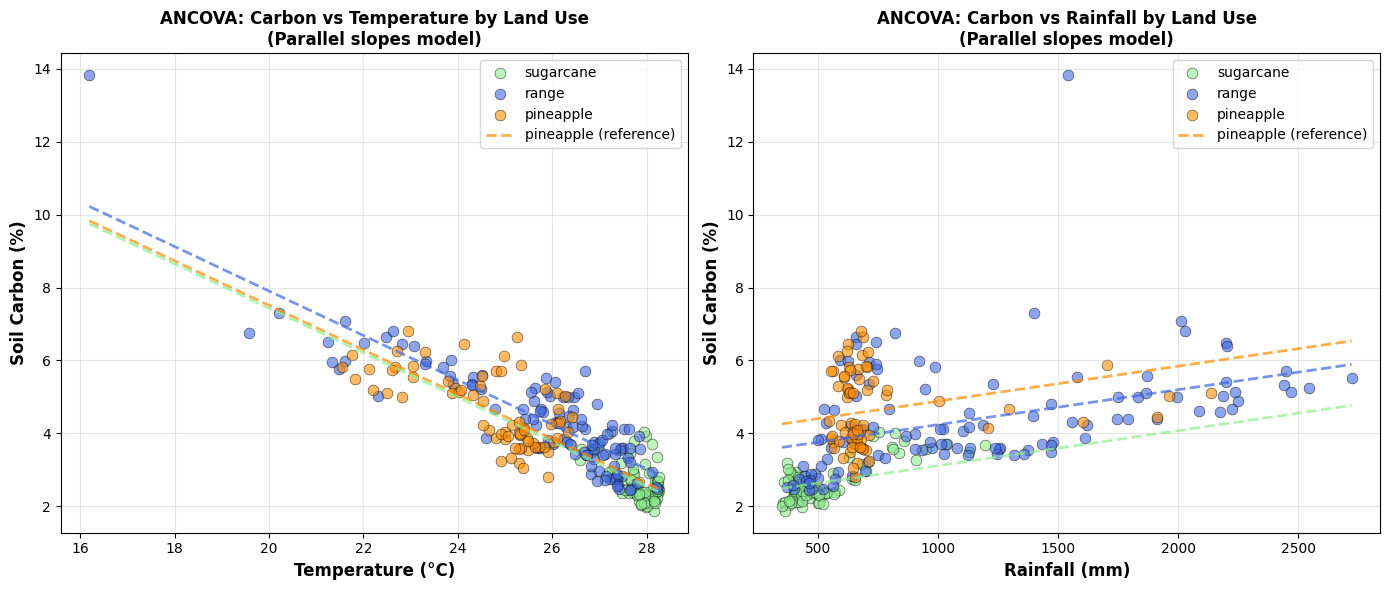

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

# ============================================================================
# 8. ANCOVA: LAND USE EFFECTS CONTROLLING FOR CLIMATE
# ============================================================================
print("\n" + "="*80)
print("ANCOVA: LAND USE EFFECTS CONTROLLING FOR CLIMATE")
print("="*80)

# Prepare data - focus on main land uses
main_landuses = ['sugarcane', 'pineapple', 'range']
ancova_data = polygon_summary[polygon_summary['landuse_current'].isin(main_landuses)].copy()

print(f"\nSample size for ANCOVA: {len(ancova_data)}")
print(f"Land use distribution:")
print(ancova_data['landuse_current'].value_counts())

# Check which land uses actually exist
actual_landuses = ancova_data['landuse_current'].unique()
print(f"\nActual land uses in data: {actual_landuses}")

# ANCOVA Model 1: Carbon ~ Temperature + LandUse
model1 = ols('carbon_mean ~ tmax_ann_mean_30m + C(landuse_current)', data=ancova_data).fit()
anova_table1 = anova_lm(model1, typ=2)

print("\n" + "-"*80)
print("ANCOVA Model 1: Carbon ~ Temperature + Land Use")
print("-"*80)
print(anova_table1)
print(f"\nModel R²: {model1.rsquared:.3f}")
print(f"Adjusted R²: {model1.rsquared_adj:.3f}")

print("\nParameter estimates:")
print(model1.summary().tables[1])

# ANCOVA Model 2: Carbon ~ Rainfall + LandUse
model2 = ols('carbon_mean ~ rainfall_ann_mm_30m + C(landuse_current)', data=ancova_data).fit()
anova_table2 = anova_lm(model2, typ=2)

print("\n" + "-"*80)
print("ANCOVA Model 2: Carbon ~ Rainfall + Land Use")
print("-"*80)
print(anova_table2)
print(f"\nModel R²: {model2.rsquared:.3f}")
print(f"Adjusted R²: {model2.rsquared_adj:.3f}")

# ANCOVA Model 3: Carbon ~ Temperature + Rainfall + LandUse
model3 = ols('carbon_mean ~ tmax_ann_mean_30m + rainfall_ann_mm_30m + C(landuse_current)',
             data=ancova_data).fit()
anova_table3 = anova_lm(model3, typ=2)

print("\n" + "-"*80)
print("ANCOVA Model 3: Carbon ~ Temperature + Rainfall + Land Use")
print("-"*80)
print(anova_table3)
print(f"\nModel R²: {model3.rsquared:.3f}")
print(f"Adjusted R²: {model3.rsquared_adj:.3f}")

# Visualize ANCOVA results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature with land use
ax1 = axes[0]
colors_lu = {'sugarcane': '#90EE90', 'pineapple': '#FF8C00', 'range': '#4169E1'}
for landuse in actual_landuses:  # Use actual_landuses instead of main_landuses
    subset = ancova_data[ancova_data['landuse_current'] == landuse]
    ax1.scatter(subset['tmax_ann_mean_30m'], subset['carbon_mean'],
               label=landuse, alpha=0.6, s=60, color=colors_lu.get(landuse, 'gray'),
               edgecolors='black', linewidths=0.5)

# Add ANCOVA fitted lines (parallel slopes from model without interaction)
temp_range = np.linspace(ancova_data['tmax_ann_mean_30m'].min(),
                         ancova_data['tmax_ann_mean_30m'].max(), 100)
temp_coef = model1.params['tmax_ann_mean_30m']
intercept_base = model1.params['Intercept']

# Plot line for reference category (first in alphabetical order)
ref_landuse = sorted(actual_landuses)[0]
ax1.plot(temp_range, intercept_base + temp_coef * temp_range, '--',
         color=colors_lu.get(ref_landuse, 'gray'), linewidth=2, alpha=0.7,
         label=f'{ref_landuse} (reference)')

# Plot lines for other categories
for landuse in sorted(actual_landuses)[1:]:
    param_name = f'C(landuse_current)[T.{landuse}]'
    if param_name in model1.params:
        intercept_landuse = intercept_base + model1.params[param_name]
        ax1.plot(temp_range, intercept_landuse + temp_coef * temp_range, '--',
                color=colors_lu.get(landuse, 'gray'), linewidth=2, alpha=0.7)

ax1.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=12)
ax1.set_title('ANCOVA: Carbon vs Temperature by Land Use\n(Parallel slopes model)',
              fontweight='bold', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3)

# Rainfall with land use
ax2 = axes[1]
for landuse in actual_landuses:
    subset = ancova_data[ancova_data['landuse_current'] == landuse]
    ax2.scatter(subset['rainfall_ann_mm_30m'], subset['carbon_mean'],
               label=landuse, alpha=0.6, s=60, color=colors_lu.get(landuse, 'gray'),
               edgecolors='black', linewidths=0.5)

# Add ANCOVA fitted lines
rain_range = np.linspace(ancova_data['rainfall_ann_mm_30m'].min(),
                         ancova_data['rainfall_ann_mm_30m'].max(), 100)
rain_coef = model2.params['rainfall_ann_mm_30m']
intercept_base2 = model2.params['Intercept']

# Plot line for reference category
ax2.plot(rain_range, intercept_base2 + rain_coef * rain_range, '--',
         color=colors_lu.get(ref_landuse, 'gray'), linewidth=2, alpha=0.7,
         label=f'{ref_landuse} (reference)')

# Plot lines for other categories
for landuse in sorted(actual_landuses)[1:]:
    param_name = f'C(landuse_current)[T.{landuse}]'
    if param_name in model2.params:
        intercept_landuse2 = intercept_base2 + model2.params[param_name]
        ax2.plot(rain_range, intercept_landuse2 + rain_coef * rain_range, '--',
                color=colors_lu.get(landuse, 'gray'), linewidth=2, alpha=0.7)

ax2.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=12)
ax2.set_title('ANCOVA: Carbon vs Rainfall by Land Use\n(Parallel slopes model)',
              fontweight='bold', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()





INTERACTION EFFECTS: CLIMATE × LAND USE

--------------------------------------------------------------------------------
Interaction Model 1: Carbon ~ Temperature × Land Use
--------------------------------------------------------------------------------
                                          sum_sq     df           F  \
C(landuse_current)                     11.914298    2.0   13.438879   
tmax_ann_mean_30m                     228.530807    1.0  515.548286   
tmax_ann_mean_30m:C(landuse_current)    1.850451    2.0    2.087239   
Residual                              113.478966  256.0         NaN   

                                            PR(>F)  
C(landuse_current)                    2.818831e-06  
tmax_ann_mean_30m                     2.859883e-63  
tmax_ann_mean_30m:C(landuse_current)  1.261348e-01  
Residual                                       NaN  

Model R²: 0.785
Adjusted R²: 0.781

--------------------------------------------------------------------------------
Inte

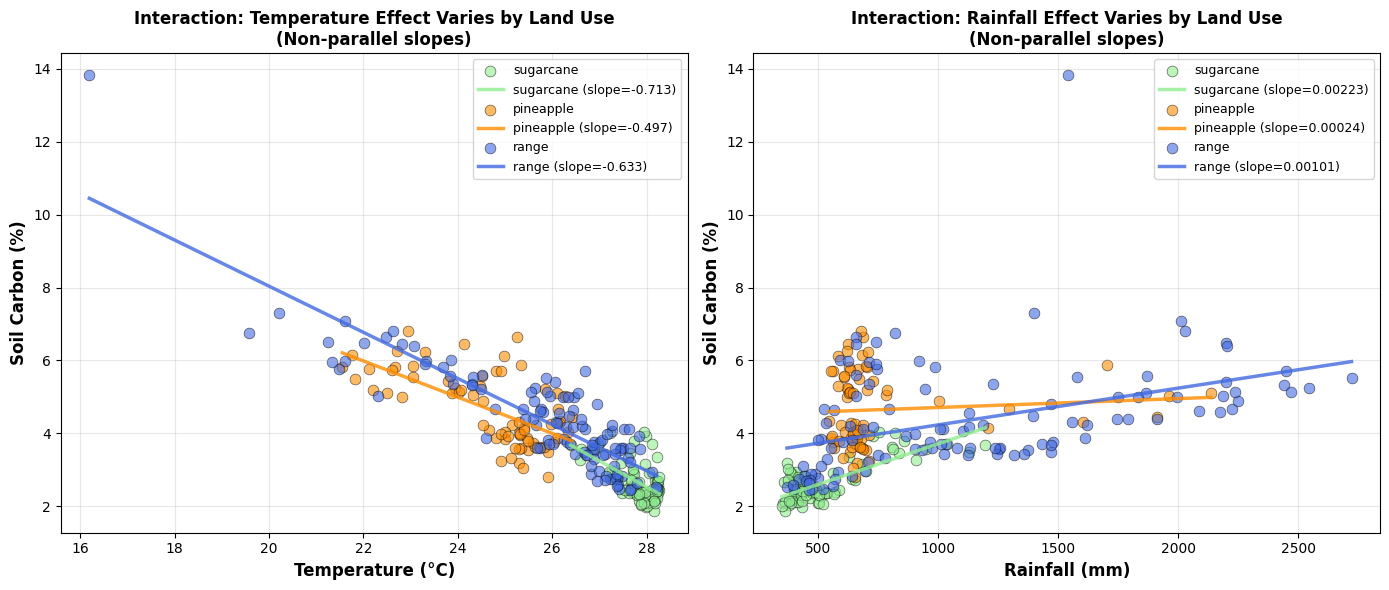


INTERACTION SIGNIFICANCE TESTS

Temperature × Land Use interaction:
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     258.0  115.329417      0.0       NaN       NaN       NaN
1     256.0  113.478966      2.0  1.850451  2.087239  0.126135
  → Interaction is NOT significant: Parallel slopes model is sufficient

Rainfall × Land Use interaction:
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     258.0  294.326672      0.0       NaN       NaN       NaN
1     256.0  285.876705      2.0  8.449967  3.783435  0.024027
  → Interaction is SIGNIFICANT: Rainfall effect differs by land use


In [283]:
# ============================================================================
# 9. INTERACTION EFFECTS: DOES CLIMATE EFFECT DIFFER BY LAND USE?
# ============================================================================
print("\n" + "="*80)
print("INTERACTION EFFECTS: CLIMATE × LAND USE")
print("="*80)

# Model with Temperature × LandUse interaction
model_int1 = ols('carbon_mean ~ tmax_ann_mean_30m * C(landuse_current)',
                 data=ancova_data).fit()
anova_int1 = anova_lm(model_int1, typ=2)

print("\n" + "-"*80)
print("Interaction Model 1: Carbon ~ Temperature × Land Use")
print("-"*80)
print(anova_int1)
print(f"\nModel R²: {model_int1.rsquared:.3f}")
print(f"Adjusted R²: {model_int1.rsquared_adj:.3f}")

# Model with Rainfall × LandUse interaction
model_int2 = ols('carbon_mean ~ rainfall_ann_mm_30m * C(landuse_current)',
                 data=ancova_data).fit()
anova_int2 = anova_lm(model_int2, typ=2)

print("\n" + "-"*80)
print("Interaction Model 2: Carbon ~ Rainfall × Land Use")
print("-"*80)
print(anova_int2)
print(f"\nModel R²: {model_int2.rsquared:.3f}")
print(f"Adjusted R²: {model_int2.rsquared_adj:.3f}")

# Full interaction model
model_int3 = ols('carbon_mean ~ (tmax_ann_mean_30m + rainfall_ann_mm_30m) * C(landuse_current)',
                 data=ancova_data).fit()
anova_int3 = anova_lm(model_int3, typ=2)

print("\n" + "-"*80)
print("Full Interaction Model: Carbon ~ (Temp + Rain) × Land Use")
print("-"*80)
print(anova_int3)
print(f"\nModel R²: {model_int3.rsquared:.3f}")
print(f"Adjusted R²: {model_int3.rsquared_adj:.3f}")

# Visualize interaction effects (non-parallel slopes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature interaction
ax1 = axes[0]
for landuse in main_landuses:
    subset = ancova_data[ancova_data['landuse_current'] == landuse]
    ax1.scatter(subset['tmax_ann_mean_30m'], subset['carbon_mean'],
               label=landuse, alpha=0.6, s=60, color=colors_lu[landuse],
               edgecolors='black', linewidths=0.5)

    # Fit separate regression lines (non-parallel)
    if len(subset) > 2:
        slope, intercept, r, p, se = stats.linregress(subset['tmax_ann_mean_30m'],
                                                       subset['carbon_mean'])
        x_range = np.linspace(subset['tmax_ann_mean_30m'].min(),
                             subset['tmax_ann_mean_30m'].max(), 50)
        ax1.plot(x_range, slope * x_range + intercept, '-',
                color=colors_lu[landuse], linewidth=2.5, alpha=0.8,
                label=f'{landuse} (slope={slope:.3f})')

ax1.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=12)
ax1.set_title('Interaction: Temperature Effect Varies by Land Use\n(Non-parallel slopes)',
              fontweight='bold', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# Rainfall interaction
ax2 = axes[1]
for landuse in main_landuses:
    subset = ancova_data[ancova_data['landuse_current'] == landuse]
    ax2.scatter(subset['rainfall_ann_mm_30m'], subset['carbon_mean'],
               label=landuse, alpha=0.6, s=60, color=colors_lu[landuse],
               edgecolors='black', linewidths=0.5)

    # Fit separate regression lines (non-parallel)
    if len(subset) > 2:
        slope, intercept, r, p, se = stats.linregress(subset['rainfall_ann_mm_30m'],
                                                       subset['carbon_mean'])
        x_range = np.linspace(subset['rainfall_ann_mm_30m'].min(),
                             subset['rainfall_ann_mm_30m'].max(), 50)
        ax2.plot(x_range, slope * x_range + intercept, '-',
                color=colors_lu[landuse], linewidth=2.5, alpha=0.8,
                label=f'{landuse} (slope={slope:.5f})')

ax2.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=12)
ax2.set_title('Interaction: Rainfall Effect Varies by Land Use\n(Non-parallel slopes)',
              fontweight='bold', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Test significance of interaction
print("\n" + "="*80)
print("INTERACTION SIGNIFICANCE TESTS")
print("="*80)

# Compare models with and without interaction
from statsmodels.stats.anova import anova_lm

# Temperature interaction test
comparison1 = anova_lm(model1, model_int1)
print("\nTemperature × Land Use interaction:")
print(comparison1)
if comparison1['Pr(>F)'][1] < 0.05:
    print("  → Interaction is SIGNIFICANT: Temperature effect differs by land use")
else:
    print("  → Interaction is NOT significant: Parallel slopes model is sufficient")

# Rainfall interaction test
comparison2 = anova_lm(model2, model_int2)
print("\nRainfall × Land Use interaction:")
print(comparison2)
if comparison2['Pr(>F)'][1] < 0.05:
    print("  → Interaction is SIGNIFICANT: Rainfall effect differs by land use")
else:
    print("  → Interaction is NOT significant: Parallel slopes model is sufficient")


SOIL SUBORDER EFFECTS ON CARBON

Analyzing suborders with n ≥ 5
Included suborders: ['Cambids', 'Ustolls', 'Ustands', 'Humults', 'Torrox', 'Ustepts', 'Orthents', 'Andepts']

--------------------------------------------------------------------------------
One-Way ANOVA: Carbon ~ Soil Suborder
--------------------------------------------------------------------------------
F-statistic: 57.115
p-value: 1.9386e-48
  → Soil suborder has SIGNIFICANT effect on carbon

Carbon by Soil Suborder:
               carbon_mean  carbon_std   n  temp_mean  rain_mean
Suborder_list                                                   
Ustands               5.91        0.61  39      22.64     959.80
Andepts               4.68        0.57   7      25.96    1753.22
Humults               4.60        0.62  28      26.07    1884.40
Orthents              4.47        1.32   8      26.04    1028.05
Ustepts               4.09        0.73  12      25.94    1232.62
Cambids               3.65        0.83  74      26.10

/tmp/ipython-input-657636820.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(boxplot_data, labels=suborder_order, patch_artist=True)


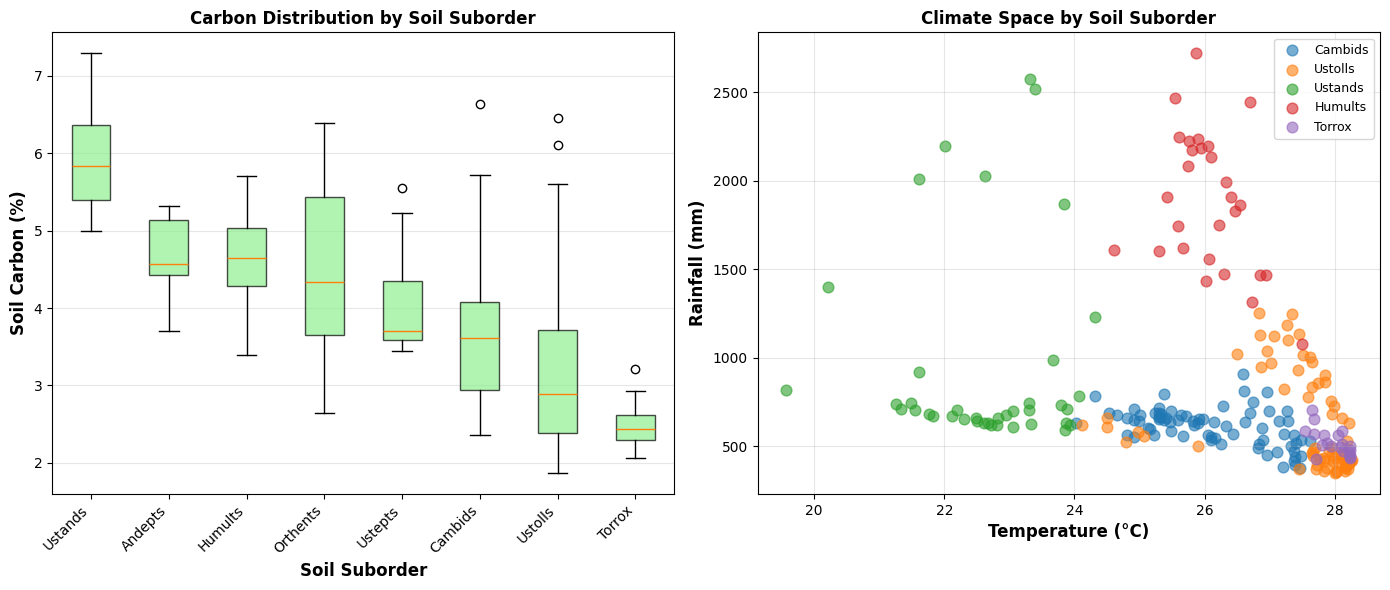

In [284]:
# ============================================================================
# 10. SOIL SUBORDER EFFECTS
# ============================================================================
print("\n" + "="*80)
print("SOIL SUBORDER EFFECTS ON CARBON")
print("="*80)

# Filter to suborders with sufficient sample size
suborder_counts = polygon_summary['Suborder_list'].value_counts()
min_n = 5
common_suborders = suborder_counts[suborder_counts >= min_n].index.tolist()

print(f"\nAnalyzing suborders with n ≥ {min_n}")
print(f"Included suborders: {common_suborders}")

soil_data = polygon_summary[polygon_summary['Suborder_list'].isin(common_suborders)].copy()

# ANOVA: Carbon by Suborder
suborder_groups = [soil_data[soil_data['Suborder_list'] == sub]['carbon_mean'].values
                   for sub in common_suborders]
f_stat, p_val = stats.f_oneway(*suborder_groups)

print("\n" + "-"*80)
print("One-Way ANOVA: Carbon ~ Soil Suborder")
print("-"*80)
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.4e}")
if p_val < 0.05:
    print("  → Soil suborder has SIGNIFICANT effect on carbon")
else:
    print("  → No significant difference in carbon across soil suborders")

# Summary stats by suborder
print("\nCarbon by Soil Suborder:")
suborder_summary = soil_data.groupby('Suborder_list').agg({
    'carbon_mean': ['mean', 'std', 'count'],
    'tmax_ann_mean_30m': 'mean',
    'rainfall_ann_mm_30m': 'mean'
}).round(2)
suborder_summary.columns = ['carbon_mean', 'carbon_std', 'n', 'temp_mean', 'rain_mean']
suborder_summary = suborder_summary.sort_values('carbon_mean', ascending=False)
print(suborder_summary)

# ANCOVA: Carbon ~ Climate + Suborder
soil_model = ols('carbon_mean ~ tmax_ann_mean_30m + rainfall_ann_mm_30m + C(Suborder_list)',
                 data=soil_data).fit()
soil_anova = anova_lm(soil_model, typ=2)

print("\n" + "-"*80)
print("ANCOVA: Carbon ~ Temperature + Rainfall + Soil Suborder")
print("-"*80)
print(soil_anova)
print(f"\nModel R²: {soil_model.rsquared:.3f}")
print(f"Adjusted R²: {soil_model.rsquared_adj:.3f}")

# Visualize soil suborder effects
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot by suborder
ax1 = axes[0]
suborder_order = suborder_summary.index.tolist()
boxplot_data = [soil_data[soil_data['Suborder_list'] == sub]['carbon_mean'].values
                for sub in suborder_order]
bp = ax1.boxplot(boxplot_data, labels=suborder_order, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#90EE90')
    patch.set_alpha(0.7)
ax1.set_ylabel('Soil Carbon (%)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Soil Suborder', fontweight='bold', fontsize=12)
ax1.set_title('Carbon Distribution by Soil Suborder', fontweight='bold', fontsize=12)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Climate space colored by suborder
ax2 = axes[1]
for suborder in common_suborders[:5]:  # Top 5 most common
    subset = soil_data[soil_data['Suborder_list'] == suborder]
    ax2.scatter(subset['tmax_ann_mean_30m'], subset['rainfall_ann_mm_30m'],
               label=suborder, alpha=0.6, s=60)
ax2.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Rainfall (mm)', fontweight='bold', fontsize=12)
ax2.set_title('Climate Space by Soil Suborder', fontweight='bold', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [285]:
# ============================================================================
# 11. TEMPORAL CHANGE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("TEMPORAL CHANGE ANALYSIS (2016-2024)")
print("="*80)

# Overall temporal trends
print("\nOverall carbon change:")
print(f"  Mean change: {polygon_summary['carbon_change'].mean():.3f}% ({polygon_summary['carbon_pct_change'].mean():.2f}%)")
print(f"  Std: {polygon_summary['carbon_change'].std():.3f}%")
print(f"  Range: {polygon_summary['carbon_change'].min():.3f} to {polygon_summary['carbon_change'].max():.3f}%")

# Test if overall change is significant
t_stat, p_val = stats.ttest_1samp(polygon_summary['carbon_change'].dropna(), 0)
print(f"\nOne-sample t-test (H0: change = 0):")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_val:.4e}")
if p_val < 0.05:
    if polygon_summary['carbon_change'].mean() > 0:
        print("  → Carbon INCREASED significantly over time")
    else:
        print("  → Carbon DECREASED significantly over time")
else:
    print("  → No significant change in carbon over time")

# Temporal change by land use
print("\n" + "-"*80)
print("Temporal change by current land use:")
print("-"*80)
temporal_by_landuse = polygon_summary.groupby('landuse_current').agg({
    'carbon_change': ['mean', 'std', 'count'],
    'carbon_pct_change': 'mean'
}).round(3)
temporal_by_landuse.columns = ['change_mean', 'change_std', 'n', 'pct_change']
print(temporal_by_landuse)

# Test temporal change by land use type
for landuse in main_landuses:
    subset = polygon_summary[polygon_summary['landuse_current'] == landuse]
    t_stat, p_val = stats.ttest_1samp(subset['carbon_change'].dropna(), 0)
    print(f"\n{landuse.capitalize()}: mean change = {subset['carbon_change'].mean():.3f}%, p = {p_val:.4f}")

# Temporal change by transition type
print("\n" + "-"*80)
print("Temporal change by land use transition:")
print("-"*80)
key_transitions = ['sugarcane → sugarcane', 'sugarcane → range',
                   'pineapple → pineapple', 'pineapple → range']
trans_temporal = polygon_summary[polygon_summary['transition'].isin(key_transitions)]

temporal_by_transition = trans_temporal.groupby('transition').agg({
    'carbon_change': ['mean', 'std', 'count'],
    'carbon_pct_change': 'mean'
}).round(3)
temporal_by_transition.columns = ['change_mean', 'change_std', 'n', 'pct_change']
print(temporal_by_transition)

# Climate gradient effects on temporal change
print("\n" + "-"*80)
print("Climate effects on temporal carbon change:")
print("-"*80)

# Correlation: Does climate predict carbon change?
corr_temp_change = polygon_summary[['tmax_ann_mean_30m', 'carbon_change']].corr().iloc[0, 1]
corr_rain_change = polygon_summary[['rainfall_ann_mm_30m', 'carbon_change']].corr().iloc[0, 1]

print(f"\nCorrelation: Temperature vs Carbon Change: r = {corr_temp_change:.3f}")
print(f"Correlation: Rainfall vs Carbon Change: r = {corr_rain_change:.3f}")

# Regression: Carbon change ~ Climate
slope_t, intercept_t, r_t, p_t, se_t = stats.linregress(
    polygon_summary['tmax_ann_mean_30m'].dropna(),
    polygon_summary['carbon_change'].dropna()
)
print(f"\nRegression: Carbon Change ~ Temperature")
print(f"  Slope: {slope_t:.4f}, R² = {r_t**2:.3f}, p = {p_t:.4f}")

slope_r, intercept_r, r_r, p_r, se_r = stats.linregress(
    polygon_summary['rainfall_ann_mm_30m'].dropna(),
    polygon_summary['carbon_change'].dropna()
)
print(f"\nRegression: Carbon Change ~ Rainfall")
print(f"  Slope: {slope_r:.6f}, R² = {r_r**2:.3f}, p = {p_r:.4f}")


TEMPORAL CHANGE ANALYSIS (2016-2024)

Overall carbon change:
  Mean change: -0.658% (-17.81%)
  Std: 0.554%
  Range: -2.124 to 1.969%

One-sample t-test (H0: change = 0):
  t-statistic: -19.276
  p-value: 3.1993e-52
  → Carbon DECREASED significantly over time

--------------------------------------------------------------------------------
Temporal change by current land use:
--------------------------------------------------------------------------------
                 change_mean  change_std    n  pct_change
landuse_current                                          
pineapple             -0.270       0.488   70      -5.445
range                 -0.577       0.420  114     -13.858
sugarcane             -1.114       0.462   78     -34.797

Sugarcane: mean change = -1.114%, p = 0.0000

Pineapple: mean change = -0.270%, p = 0.0000

Range: mean change = -0.577%, p = 0.0000

--------------------------------------------------------------------------------
Temporal change by land use tran

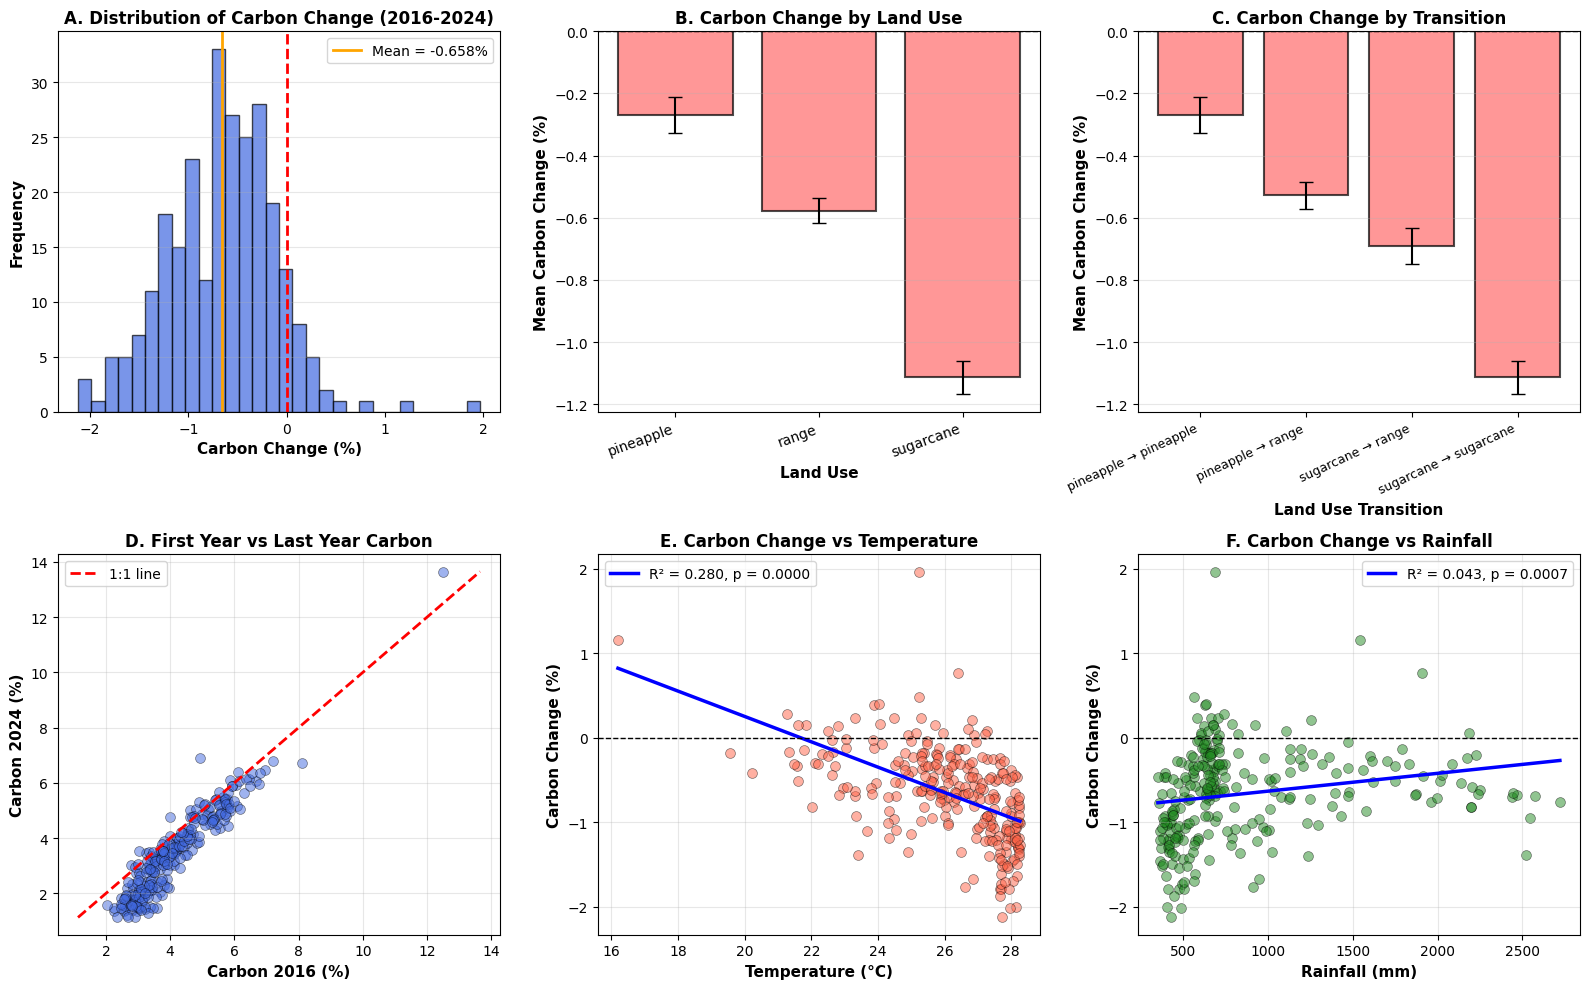

In [286]:
# Visualizations
fig = plt.figure(figsize=(16, 10))

# A. Overall temporal change distribution
ax1 = plt.subplot(2, 3, 1)
ax1.hist(polygon_summary['carbon_change'], bins=30, alpha=0.7,
         color='#4169E1', edgecolor='black')
ax1.axvline(0, color='red', linestyle='--', linewidth=2)
ax1.axvline(polygon_summary['carbon_change'].mean(), color='orange',
            linestyle='-', linewidth=2, label=f"Mean = {polygon_summary['carbon_change'].mean():.3f}%")
ax1.set_xlabel('Carbon Change (%)', fontweight='bold', fontsize=11)
ax1.set_ylabel('Frequency', fontweight='bold', fontsize=11)
ax1.set_title('A. Distribution of Carbon Change (2016-2024)', fontweight='bold', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# B. Temporal change by land use
ax2 = plt.subplot(2, 3, 2)
temporal_lu = temporal_by_landuse.reset_index()
x_pos = np.arange(len(temporal_lu))
colors_change = ['#90EE90' if x > 0 else '#FF6B6B' for x in temporal_lu['change_mean']]
bars = ax2.bar(x_pos, temporal_lu['change_mean'],
               yerr=temporal_lu['change_std'] / np.sqrt(temporal_lu['n']),
               capsize=5, alpha=0.7, color=colors_change,
               edgecolor='black', linewidth=1.5)
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(temporal_lu['landuse_current'], rotation=20, ha='right')
ax2.set_ylabel('Mean Carbon Change (%)', fontweight='bold', fontsize=11)
ax2.set_xlabel('Land Use', fontweight='bold', fontsize=11)
ax2.set_title('B. Carbon Change by Land Use', fontweight='bold', fontsize=12)
ax2.grid(alpha=0.3, axis='y')

# C. Temporal change by transition
ax3 = plt.subplot(2, 3, 3)
temporal_trans = temporal_by_transition.reset_index()
x_pos = np.arange(len(temporal_trans))
colors_trans = ['#90EE90' if x > 0 else '#FF6B6B' for x in temporal_trans['change_mean']]
bars = ax3.bar(x_pos, temporal_trans['change_mean'],
               yerr=temporal_trans['change_std'] / np.sqrt(temporal_trans['n']),
               capsize=5, alpha=0.7, color=colors_trans,
               edgecolor='black', linewidth=1.5)
ax3.axhline(0, color='black', linestyle='--', linewidth=1)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(temporal_trans['transition'], rotation=25, ha='right', fontsize=9)
ax3.set_ylabel('Mean Carbon Change (%)', fontweight='bold', fontsize=11)
ax3.set_xlabel('Land Use Transition', fontweight='bold', fontsize=11)
ax3.set_title('C. Carbon Change by Transition', fontweight='bold', fontsize=12)
ax3.grid(alpha=0.3, axis='y')

# D. First year vs last year
ax4 = plt.subplot(2, 3, 4)
ax4.scatter(polygon_summary['carbon_first_year'], polygon_summary['carbon_last_year'],
           alpha=0.5, s=50, c='#4169E1', edgecolors='black', linewidths=0.5)
# Add 1:1 line
min_val = min(polygon_summary['carbon_first_year'].min(), polygon_summary['carbon_last_year'].min())
max_val = max(polygon_summary['carbon_first_year'].max(), polygon_summary['carbon_last_year'].max())
ax4.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 line')
ax4.set_xlabel('Carbon 2016 (%)', fontweight='bold', fontsize=11)
ax4.set_ylabel('Carbon 2024 (%)', fontweight='bold', fontsize=11)
ax4.set_title('D. First Year vs Last Year Carbon', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(alpha=0.3)

# E. Carbon change vs Temperature
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(polygon_summary['tmax_ann_mean_30m'], polygon_summary['carbon_change'],
           alpha=0.5, s=50, c='#FF6347', edgecolors='black', linewidths=0.5)
x_temp = np.linspace(polygon_summary['tmax_ann_mean_30m'].min(),
                     polygon_summary['tmax_ann_mean_30m'].max(), 100)
y_temp = slope_t * x_temp + intercept_t
ax5.plot(x_temp, y_temp, 'b-', linewidth=2.5,
         label=f'R² = {r_t**2:.3f}, p = {p_t:.4f}')
ax5.axhline(0, color='black', linestyle='--', linewidth=1)
ax5.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=11)
ax5.set_ylabel('Carbon Change (%)', fontweight='bold', fontsize=11)
ax5.set_title('E. Carbon Change vs Temperature', fontweight='bold', fontsize=12)
ax5.legend()
ax5.grid(alpha=0.3)

# F. Carbon change vs Rainfall
ax6 = plt.subplot(2, 3, 6)
ax6.scatter(polygon_summary['rainfall_ann_mm_30m'], polygon_summary['carbon_change'],
           alpha=0.5, s=50, c='#228B22', edgecolors='black', linewidths=0.5)
x_rain = np.linspace(polygon_summary['rainfall_ann_mm_30m'].min(),
                     polygon_summary['rainfall_ann_mm_30m'].max(), 100)
y_rain = slope_r * x_rain + intercept_r
ax6.plot(x_rain, y_rain, 'b-', linewidth=2.5,
         label=f'R² = {r_r**2:.3f}, p = {p_r:.4f}')
ax6.axhline(0, color='black', linestyle='--', linewidth=1)
ax6.set_xlabel('Rainfall (mm)', fontweight='bold', fontsize=11)
ax6.set_ylabel('Carbon Change (%)', fontweight='bold', fontsize=11)
ax6.set_title('F. Carbon Change vs Rainfall', fontweight='bold', fontsize=12)
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [287]:
# ============================================================================
# 12. COMPREHENSIVE SUMMARY TABLE
# ============================================================================
print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY: ALL MODELS")
print("="*80)

summary_results = pd.DataFrame({
    'Analysis': [
        'Simple: Carbon ~ Temperature',
        'Simple: Carbon ~ Rainfall',
        'Multiple: Carbon ~ Temp + Rain',
        'ANCOVA: Carbon ~ Temp + LandUse',
        'ANCOVA: Carbon ~ Rain + LandUse',
        'ANCOVA: Carbon ~ Temp + Rain + LandUse',
        'Interaction: Carbon ~ Temp × LandUse',
        'Interaction: Carbon ~ Rain × LandUse',
        'Soil: Carbon ~ Temp + Rain + Suborder',
        'Temporal: Change ~ Temperature',
        'Temporal: Change ~ Rainfall'
    ],
    'R²': [
        r_temp**2,
        r_rain**2,
        r2,
        model1.rsquared,
        model2.rsquared,
        model3.rsquared,
        model_int1.rsquared,
        model_int2.rsquared,
        soil_model.rsquared,
        r_t**2,
        r_r**2
    ],
    'Adj_R²': [
        np.nan,
        np.nan,
        np.nan,
        model1.rsquared_adj,
        model2.rsquared_adj,
        model3.rsquared_adj,
        model_int1.rsquared_adj,
        model_int2.rsquared_adj,
        soil_model.rsquared_adj,
        np.nan,
        np.nan
    ],
    'Key_Finding': [
        f'Strong negative effect (β={slope_temp:.3f})',
        f'Moderate positive effect (β={slope_rain:.5f})',
        f'Both predictors significant',
        f'LandUse effect p={anova_table1["PR(>F)"][1]:.4f}',
        f'LandUse effect p={anova_table2["PR(>F)"][1]:.4f}',
        f'All factors significant',
        f'Interaction p={comparison1["Pr(>F)"][1]:.4f}',
        f'Interaction p={comparison2["Pr(>F)"][1]:.4f}',
        f'Suborder effect p={soil_anova["PR(>F)"][2]:.4f}',
        f'Weak/no relationship (p={p_t:.3f})',
        f'Weak/no relationship (p={p_r:.3f})'
    ]
})

print(summary_results.to_string(index=False))

# ============================================================================
# 13. FINAL KEY FINDINGS SUMMARY
# ============================================================================
print("\n" + "="*80)
print("KEY FINDINGS: CLIMATE GRADIENT EFFECTS ON SOIL CARBON")
print("="*80)

print("\n1. CLIMATE GRADIENT EFFECTS:")
print(f"   • Temperature strongly controls carbon (R² = {r_temp**2:.3f})")
print(f"     - Each 1°C increase → {slope_temp:.3f}% carbon decrease")
print(f"   • Rainfall moderately affects carbon (R² = {r_rain**2:.3f})")
print(f"     - Each 100mm increase → {slope_rain*100:.3f}% carbon increase")
print(f"   • Combined model explains {r2*100:.1f}% of carbon variation")

print("\n2. LAND USE EFFECTS:")
print(f"   • Land use significantly affects carbon after controlling for climate")
print(f"     (ANCOVA p = {anova_table3['PR(>F)'][2]:.4f})")
landuse_means = ancova_data.groupby('landuse_current')['carbon_mean'].mean().sort_values(ascending=False)
print(f"   • Mean carbon ranking: {', '.join([f'{lu} ({v:.2f}%)' for lu, v in landuse_means.items()])}")

print("\n3. INTERACTION EFFECTS:")
if comparison1['Pr(>F)'][1] < 0.05:
    print(f"   • Temperature effect DIFFERS by land use (p = {comparison1['Pr(>F)'][1]:.4f})")
else:
    print(f"   • Temperature effect is SIMILAR across land uses (p = {comparison1['Pr(>F)'][1]:.4f})")
if comparison2['Pr(>F)'][1] < 0.05:
    print(f"   • Rainfall effect DIFFERS by land use (p = {comparison2['Pr(>F)'][1]:.4f})")
else:
    print(f"   • Rainfall effect is SIMILAR across land uses (p = {comparison2['Pr(>F)'][1]:.4f})")

print("\n4. SOIL SUBORDER EFFECTS:")
print(f"   • Suborder significantly affects carbon (ANOVA p = {p_val:.4e})")
top_suborders = suborder_summary.head(3)
print(f"   • Highest carbon suborders:")
for sub, row in top_suborders.iterrows():
    print(f"     - {sub}: {row['carbon_mean']:.2f}% (n={int(row['n'])})")

print("\n5. TEMPORAL CHANGES (2016-2024):")
print(f"   • Overall mean change: {polygon_summary['carbon_change'].mean():.3f}% ({polygon_summary['carbon_pct_change'].mean():.2f}%)")
if p_val < 0.05:
    direction = "INCREASE" if polygon_summary['carbon_change'].mean() > 0 else "DECREASE"
    print(f"   • Significant {direction} detected (p = {p_val:.4e})")
else:
    print(f"   • No significant overall change (p = {p_val:.4f})")
print(f"   • Change varies by land use transition:")
for trans in key_transitions:
    subset = trans_temporal[trans_temporal['transition'] == trans]
    if len(subset) > 0:
        mean_change = subset['carbon_change'].mean()
        print(f"     - {trans}: {mean_change:.3f}%")

print("\n6. MANAGEMENT IMPLICATIONS:")
print(f"   • Cool, wet areas have {polygon_summary.nlargest(10, 'carbon_mean')['carbon_mean'].mean():.2f}% carbon")
print(f"   • Warm, dry areas have {polygon_summary.nsmallest(10, 'carbon_mean')['carbon_mean'].mean():.2f}% carbon")
sugar_to_range = trans_temporal[trans_temporal['transition'] == 'sugarcane → range']
if len(sugar_to_range) > 0:
    print(f"   • Converting sugarcane → range: {sugar_to_range['carbon_mean'].mean():.2f}% carbon")
    sugar_stable = trans_temporal[trans_temporal['transition'] == 'sugarcane → sugarcane']
    if len(sugar_stable) > 0:
        diff = sugar_to_range['carbon_mean'].mean() - sugar_stable['carbon_mean'].mean()
        print(f"     ({diff:+.2f}% vs stable sugarcane)")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

# ============================================================================
# 14. SAVE ALL RESULTS
# ============================================================================

# Save summary tables
summary_results.to_csv('climate_gradient_model_summary.csv', index=False)
temporal_by_landuse.to_csv('temporal_change_by_landuse.csv')
temporal_by_transition.to_csv('temporal_change_by_transition.csv')
suborder_summary.to_csv('carbon_by_suborder.csv')

# Save model results
with open('model_results.txt', 'w') as f:
    f.write("CLIMATE GRADIENT STUDY: MODEL RESULTS\n")
    f.write("="*80 + "\n\n")

    f.write("SIMPLE LINEAR REGRESSIONS\n")
    f.write("-"*80 + "\n")
    f.write(f"Model 1: Carbon ~ Temperature\n")
    f.write(f"  R² = {r_temp**2:.3f}, p = {p_temp:.4e}\n")
    f.write(f"  Equation: Carbon = {intercept_temp:.3f} + {slope_temp:.3f} × Temperature\n\n")

    f.write(f"Model 2: Carbon ~ Rainfall\n")
    f.write(f"  R² = {r_rain**2:.3f}, p = {p_rain:.4e}\n")
    f.write(f"  Equation: Carbon = {intercept_rain:.3f} + {slope_rain:.6f} × Rainfall\n\n")

    f.write("\nANCOVA MODELS\n")
    f.write("-"*80 + "\n")
    f.write("Model 3: Carbon ~ Temperature + Land Use\n")
    f.write(str(anova_table1))
    f.write(f"\n\nR² = {model1.rsquared:.3f}, Adj R² = {model1.rsquared_adj:.3f}\n\n")

    f.write("\nModel 4: Carbon ~ Temperature + Rainfall + Land Use\n")
    f.write(str(anova_table3))
    f.write(f"\n\nR² = {model3.rsquared:.3f}, Adj R² = {model3.rsquared_adj:.3f}\n\n")

    f.write("\nINTERACTION MODELS\n")
    f.write("-"*80 + "\n")
    f.write("Model 5: Carbon ~ Temperature × Land Use\n")
    f.write(str(anova_int1))
    f.write(f"\n\nR² = {model_int1.rsquared:.3f}, Adj R² = {model_int1.rsquared_adj:.3f}\n\n")

    f.write("\nSOIL SUBORDER MODEL\n")
    f.write("-"*80 + "\n")
    f.write("Model 6: Carbon ~ Temperature + Rainfall + Suborder\n")
    f.write(str(soil_anova))
    f.write(f"\n\nR² = {soil_model.rsquared:.3f}, Adj R² = {soil_model.rsquared_adj:.3f}\n\n")

print("\n✓ Results saved:")
print("  - climate_gradient_model_summary.csv")
print("  - temporal_change_by_landuse.csv")
print("  - temporal_change_by_transition.csv")
print("  - carbon_by_suborder.csv")
print("  - model_results.txt")



COMPREHENSIVE SUMMARY: ALL MODELS
                              Analysis       R²   Adj_R²                          Key_Finding
          Simple: Carbon ~ Temperature 0.760696      NaN    Strong negative effect (β=-0.637)
             Simple: Carbon ~ Rainfall 0.240693      NaN Moderate positive effect (β=0.00129)
        Multiple: Carbon ~ Temp + Rain 0.825028      NaN          Both predictors significant
       ANCOVA: Carbon ~ Temp + LandUse 0.781378 0.778836              LandUse effect p=0.0000
       ANCOVA: Carbon ~ Rain + LandUse 0.442065 0.435577              LandUse effect p=0.0000
ANCOVA: Carbon ~ Temp + Rain + LandUse 0.826728 0.824031              All factors significant
  Interaction: Carbon ~ Temp × LandUse 0.784886 0.780684                 Interaction p=0.1261
  Interaction: Carbon ~ Rain × LandUse 0.458083 0.447499                 Interaction p=0.0240
 Soil: Carbon ~ Temp + Rain + Suborder 0.827298 0.821056             Suborder effect p=0.0000
        Temporal: Change 

/tmp/ipython-input-3631042337.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'LandUse effect p={anova_table1["PR(>F)"][1]:.4f}',
/tmp/ipython-input-3631042337.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'LandUse effect p={anova_table2["PR(>F)"][1]:.4f}',
/tmp/ipython-input-3631042337.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Suborder effect p={soil_anova["PR(>F)"][2]:.4f}',
/tmp/ipython-input-3631042337

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# ============================================================================
# CARBON TREND ANALYSIS: INCREASING VS DECREASING
# ============================================================================
print("="*80)
print("CARBON TREND ANALYSIS: INCREASING VS DECREASING POLYGONS")
print("="*80)

# Categorize polygons by carbon change direction
polygon_summary['carbon_trend'] = polygon_summary['carbon_change'].apply(
    lambda x: 'Increasing' if x > 0 else ('Decreasing' if x < 0 else 'No change')
)

# Summary counts
trend_counts = polygon_summary['carbon_trend'].value_counts()
print(f"\nCarbon trend distribution:")
print(f"  Increasing: {trend_counts.get('Increasing', 0)} polygons ({trend_counts.get('Increasing', 0)/len(polygon_summary)*100:.1f}%)")
print(f"  Decreasing: {trend_counts.get('Decreasing', 0)} polygons ({trend_counts.get('Decreasing', 0)/len(polygon_summary)*100:.1f}%)")
print(f"  No change: {trend_counts.get('No change', 0)} polygons ({trend_counts.get('No change', 0)/len(polygon_summary)*100:.1f}%)")

# Split into increasing and decreasing
increasing = polygon_summary[polygon_summary['carbon_change'] > 0].copy()
decreasing = polygon_summary[polygon_summary['carbon_change'] < 0].copy()

print(f"\n" + "-"*80)
print("MAGNITUDE OF CHANGE")
print("-"*80)
print(f"\nIncreasing polygons (n={len(increasing)}):")
print(f"  Mean change: +{increasing['carbon_change'].mean():.3f}% ({increasing['carbon_pct_change'].mean():.2f}%)")
print(f"  Median change: +{increasing['carbon_change'].median():.3f}%")
print(f"  Range: +{increasing['carbon_change'].min():.3f} to +{increasing['carbon_change'].max():.3f}%")

print(f"\nDecreasing polygons (n={len(decreasing)}):")
print(f"  Mean change: {decreasing['carbon_change'].mean():.3f}% ({decreasing['carbon_pct_change'].mean():.2f}%)")
print(f"  Median change: {decreasing['carbon_change'].median():.3f}%")
print(f"  Range: {decreasing['carbon_change'].min():.3f} to {decreasing['carbon_change'].max():.3f}%")


CARBON TREND ANALYSIS: INCREASING VS DECREASING POLYGONS

Carbon trend distribution:
  Increasing: 24 polygons (9.1%)
  Decreasing: 240 polygons (90.9%)
  No change: 0 polygons (0.0%)

--------------------------------------------------------------------------------
MAGNITUDE OF CHANGE
--------------------------------------------------------------------------------

Increasing polygons (n=24):
  Mean change: +0.318% (6.98%)
  Median change: +0.159%
  Range: +0.030 to +1.969%

Decreasing polygons (n=240):
  Mean change: -0.755% (-20.29%)
  Median change: -0.668%
  Range: -2.124 to -0.011%


In [289]:
# ============================================================================
# 1. LAND USE PATTERNS
# ============================================================================
print("\n" + "="*80)
print("1. LAND USE PATTERNS")
print("="*80)

# Current land use by trend
print("\nCurrent land use distribution:")
print("\nIncreasing polygons:")
inc_landuse = increasing['landuse_current'].value_counts()
print(inc_landuse)
print(f"  Proportions: {(inc_landuse / len(increasing) * 100).round(1).to_dict()}")

print("\nDecreasing polygons:")
dec_landuse = decreasing['landuse_current'].value_counts()
print(dec_landuse)
print(f"  Proportions: {(dec_landuse / len(decreasing) * 100).round(1).to_dict()}")

# Statistical test: Chi-square for land use vs trend
from scipy.stats import chi2_contingency
contingency_landuse = pd.crosstab(polygon_summary['landuse_current'],
                                   polygon_summary['carbon_trend'])
chi2, p_val, dof, expected = chi2_contingency(contingency_landuse)
print(f"\nChi-square test: Land use vs Carbon trend")
print(f"  χ² = {chi2:.3f}, p = {p_val:.4f}")
if p_val < 0.05:
    print("  → Land use is SIGNIFICANTLY associated with carbon trend")
else:
    print("  → No significant association between land use and carbon trend")

# Land use transitions
print("\n" + "-"*80)
print("Land use transitions:")
print("\nIncreasing polygons:")
inc_trans = increasing['transition'].value_counts().head(10)
print(inc_trans)

print("\nDecreasing polygons:")
dec_trans = decreasing['transition'].value_counts().head(10)
print(dec_trans)

# Which transitions are most associated with increase/decrease?
print("\n" + "-"*80)
print("Mean carbon change by transition:")
transition_change = polygon_summary.groupby('transition').agg({
    'carbon_change': ['mean', 'count'],
    'carbon_trend': lambda x: (x == 'Increasing').sum()
}).round(3)
transition_change.columns = ['mean_change', 'n_total', 'n_increasing']
transition_change['pct_increasing'] = (transition_change['n_increasing'] / transition_change['n_total'] * 100).round(1)
transition_change = transition_change.sort_values('mean_change', ascending=False)
print(transition_change.head(10))


1. LAND USE PATTERNS

Current land use distribution:

Increasing polygons:
landuse_current
pineapple    15
range         8
sugarcane     1
Name: count, dtype: int64
  Proportions: {'pineapple': 62.5, 'range': 33.3, 'sugarcane': 4.2}

Decreasing polygons:
landuse_current
range        106
sugarcane     77
pineapple     55
Name: count, dtype: int64
  Proportions: {'range': 44.2, 'sugarcane': 32.1, 'pineapple': 22.9}

Chi-square test: Land use vs Carbon trend
  χ² = 19.108, p = 0.0001
  → Land use is SIGNIFICANTLY associated with carbon trend

--------------------------------------------------------------------------------
Land use transitions:

Increasing polygons:
transition
pineapple → pineapple    15
sugarcane → range         4
range → range             3
pineapple → range         1
sugarcane → sugarcane     1
Name: count, dtype: int64

Decreasing polygons:
transition
sugarcane → sugarcane    77
pineapple → pineapple    55
sugarcane → range        52
pineapple → range        44
range 

In [290]:
# ============================================================================
# 2. CLIMATE CHARACTERISTICS
# ============================================================================
print("\n" + "="*80)
print("2. CLIMATE CHARACTERISTICS")
print("="*80)

print("\nTemperature:")
print(f"  Increasing polygons: {increasing['tmax_ann_mean_30m'].mean():.2f}°C ± {increasing['tmax_ann_mean_30m'].std():.2f}")
print(f"  Decreasing polygons: {decreasing['tmax_ann_mean_30m'].mean():.2f}°C ± {decreasing['tmax_ann_mean_30m'].std():.2f}")
t_stat, p_val = stats.ttest_ind(increasing['tmax_ann_mean_30m'], decreasing['tmax_ann_mean_30m'])
print(f"  t-test: t = {t_stat:.3f}, p = {p_val:.4f}")
if p_val < 0.05:
    if increasing['tmax_ann_mean_30m'].mean() > decreasing['tmax_ann_mean_30m'].mean():
        print("  → Increasing polygons are SIGNIFICANTLY WARMER")
    else:
        print("  → Increasing polygons are SIGNIFICANTLY COOLER")
else:
    print("  → No significant temperature difference")

print("\nRainfall:")
print(f"  Increasing polygons: {increasing['rainfall_ann_mm_30m'].mean():.0f} mm ± {increasing['rainfall_ann_mm_30m'].std():.0f}")
print(f"  Decreasing polygons: {decreasing['rainfall_ann_mm_30m'].mean():.0f} mm ± {decreasing['rainfall_ann_mm_30m'].std():.0f}")
t_stat, p_val = stats.ttest_ind(increasing['rainfall_ann_mm_30m'], decreasing['rainfall_ann_mm_30m'])
print(f"  t-test: t = {t_stat:.3f}, p = {p_val:.4f}")
if p_val < 0.05:
    if increasing['rainfall_ann_mm_30m'].mean() > decreasing['rainfall_ann_mm_30m'].mean():
        print("  → Increasing polygons are SIGNIFICANTLY WETTER")
    else:
        print("  → Increasing polygons are SIGNIFICANTLY DRIER")
else:
    print("  → No significant rainfall difference")

# Climate bins
print("\n" + "-"*80)
print("Climate bin distribution:")
print("\nIncreasing polygons:")
inc_climate = increasing['climate_description'].value_counts()
print(inc_climate)
print(f"  Proportions: {(inc_climate / len(increasing) * 100).round(1).to_dict()}")

print("\nDecreasing polygons:")
dec_climate = decreasing['climate_description'].value_counts()
print(dec_climate)
print(f"  Proportions: {(dec_climate / len(decreasing) * 100).round(1).to_dict()}")

# Chi-square test
contingency_climate = pd.crosstab(polygon_summary['climate_description'],
                                   polygon_summary['carbon_trend'])
chi2, p_val, dof, expected = chi2_contingency(contingency_climate)
print(f"\nChi-square test: Climate bin vs Carbon trend")
print(f"  χ² = {chi2:.3f}, p = {p_val:.4f}")



2. CLIMATE CHARACTERISTICS

Temperature:
  Increasing polygons: 24.36°C ± 2.50
  Decreasing polygons: 26.25°C ± 1.81
  t-test: t = -4.679, p = 0.0000
  → Increasing polygons are SIGNIFICANTLY COOLER

Rainfall:
  Increasing polygons: 873 mm ± 431
  Decreasing polygons: 866 mm ± 553
  t-test: t = 0.059, p = 0.9527
  → No significant rainfall difference

--------------------------------------------------------------------------------
Climate bin distribution:

Increasing polygons:
climate_description
Moderate/Dry-Mod     13
Warm/Mod-Wet          6
Cool/All rainfall     4
Moderate/Wet          1
Name: count, dtype: int64
  Proportions: {'Moderate/Dry-Mod': 54.2, 'Warm/Mod-Wet': 25.0, 'Cool/All rainfall': 16.7, 'Moderate/Wet': 4.2}

Decreasing polygons:
climate_description
Warm/Mod-Wet         84
Warm/Dry             66
Moderate/Dry-Mod     62
Moderate/Wet         20
Cool/All rainfall     8
Name: count, dtype: int64
  Proportions: {'Warm/Mod-Wet': 35.0, 'Warm/Dry': 27.5, 'Moderate/Dry-Mod'

In [291]:
# ============================================================================
# 3. SOIL SUBORDER PATTERNS
# ============================================================================
print("\n" + "="*80)
print("3. SOIL SUBORDER PATTERNS")
print("="*80)

print("\nIncreasing polygons:")
inc_soil = increasing['Suborder_list'].value_counts().head(10)
print(inc_soil)
print(f"  Proportions: {(inc_soil / len(increasing) * 100).round(1).to_dict()}")

print("\nDecreasing polygons:")
dec_soil = decreasing['Suborder_list'].value_counts().head(10)
print(dec_soil)
print(f"  Proportions: {(dec_soil / len(decreasing) * 100).round(1).to_dict()}")

# Which suborders show most increase/decrease?
print("\n" + "-"*80)
print("Mean carbon change by suborder:")
suborder_change = polygon_summary.groupby('Suborder_list').agg({
    'carbon_change': ['mean', 'std', 'count'],
    'carbon_trend': lambda x: (x == 'Increasing').sum()
}).round(3)
suborder_change.columns = ['mean_change', 'std_change', 'n_total', 'n_increasing']
suborder_change['pct_increasing'] = (suborder_change['n_increasing'] / suborder_change['n_total'] * 100).round(1)
suborder_change = suborder_change[suborder_change['n_total'] >= 5]  # Filter to n>=5
suborder_change = suborder_change.sort_values('mean_change', ascending=False)
print(suborder_change)


3. SOIL SUBORDER PATTERNS

Increasing polygons:
Suborder_list
Cambids     9
Ustands     8
Ustolls     3
Humults     2
Orthents    1
Udands      1
Name: count, dtype: int64
  Proportions: {'Cambids': 37.5, 'Ustands': 33.3, 'Ustolls': 12.5, 'Humults': 8.3, 'Orthents': 4.2, 'Udands': 4.2}

Decreasing polygons:
Suborder_list
Ustolls      68
Cambids      65
Ustands      31
Humults      26
Torrox       20
Ustepts      12
Orthents      7
Andepts       7
Torrands      3
Psamments     1
Name: count, dtype: int64
  Proportions: {'Ustolls': 28.3, 'Cambids': 27.1, 'Ustands': 12.9, 'Humults': 10.8, 'Torrox': 8.3, 'Ustepts': 5.0, 'Orthents': 2.9, 'Andepts': 2.9, 'Torrands': 1.2, 'Psamments': 0.4}

--------------------------------------------------------------------------------
Mean carbon change by suborder:
               mean_change  std_change  n_total  n_increasing  pct_increasing
Suborder_list                                                                
Ustands             -0.315       0.40

In [292]:
# ============================================================================
# 4. BASELINE CARBON LEVELS
# ============================================================================
print("\n" + "="*80)
print("4. BASELINE CARBON LEVELS (2016)")
print("="*80)

print(f"\nIncreasing polygons:")
print(f"  2016 carbon: {increasing['carbon_first_year'].mean():.2f}% ± {increasing['carbon_first_year'].std():.2f}")
print(f"  2024 carbon: {increasing['carbon_last_year'].mean():.2f}% ± {increasing['carbon_last_year'].std():.2f}")

print(f"\nDecreasing polygons:")
print(f"  2016 carbon: {decreasing['carbon_first_year'].mean():.2f}% ± {decreasing['carbon_first_year'].std():.2f}")
print(f"  2024 carbon: {decreasing['carbon_last_year'].mean():.2f}% ± {decreasing['carbon_last_year'].std():.2f}")

# Test if baseline differs
t_stat, p_val = stats.ttest_ind(increasing['carbon_first_year'], decreasing['carbon_first_year'])
print(f"\nBaseline difference (2016): t = {t_stat:.3f}, p = {p_val:.4f}")
if p_val < 0.05:
    if increasing['carbon_first_year'].mean() > decreasing['carbon_first_year'].mean():
        print("  → Increasing polygons started with HIGHER carbon")
    else:
        print("  → Increasing polygons started with LOWER carbon")
else:
    print("  → No significant difference in baseline carbon")


4. BASELINE CARBON LEVELS (2016)

Increasing polygons:
  2016 carbon: 4.62% ± 1.93
  2024 carbon: 4.93% ± 2.16

Decreasing polygons:
  2016 carbon: 4.08% ± 1.15
  2024 carbon: 3.33% ± 1.38

Baseline difference (2016): t = 2.010, p = 0.0455
  → Increasing polygons started with HIGHER carbon


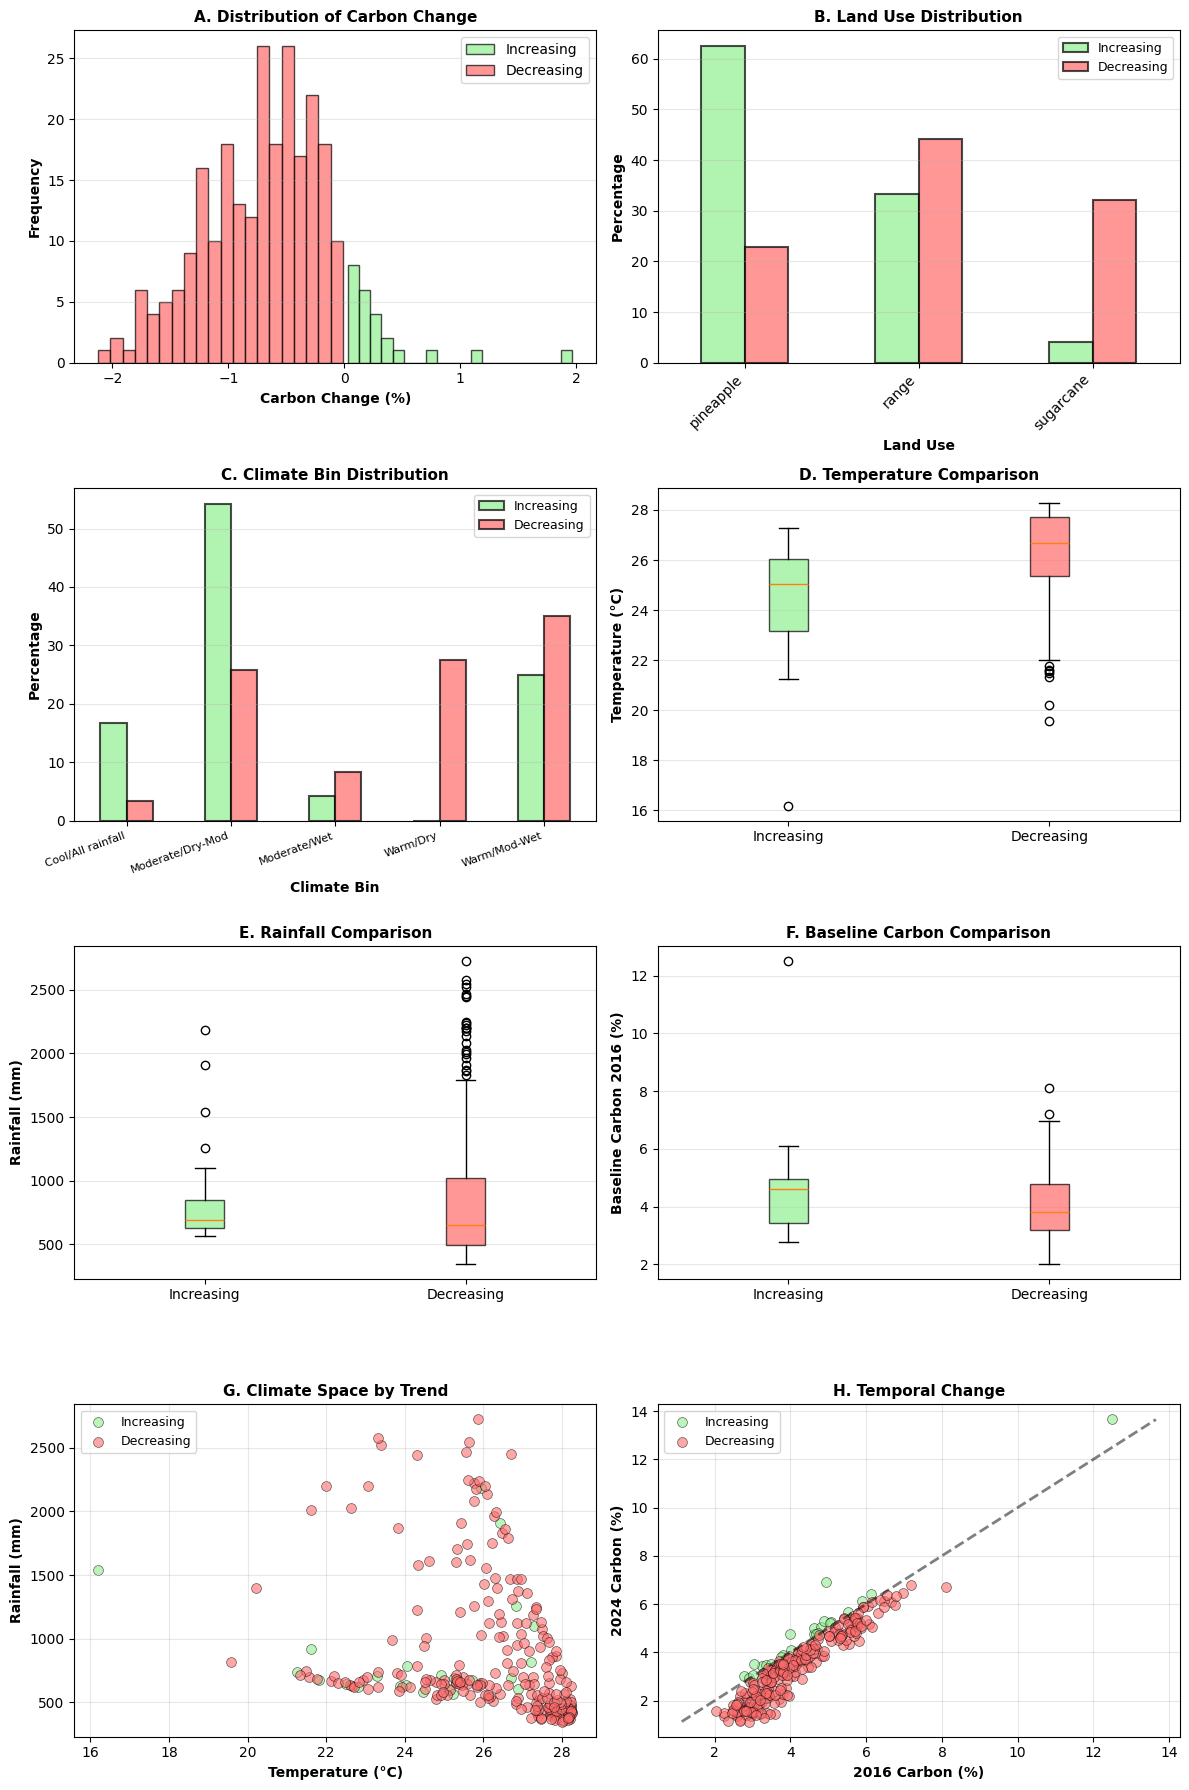

In [293]:
# ============================================================================
# 5. COMPREHENSIVE VISUALIZATIONS
# ============================================================================

fig = plt.figure(figsize=(12, 18))

# A. Change distribution
ax1 = plt.subplot(4, 2, 1)
ax1.hist(increasing['carbon_change'], bins=20, alpha=0.7, color='#90EE90',
         edgecolor='black', label='Increasing')
ax1.hist(decreasing['carbon_change'], bins=20, alpha=0.7, color='#FF6B6B',
         edgecolor='black', label='Decreasing')
ax1.set_xlabel('Carbon Change (%)', fontweight='bold', fontsize=10)
ax1.set_ylabel('Frequency', fontweight='bold', fontsize=10)
ax1.set_title('A. Distribution of Carbon Change', fontweight='bold', fontsize=11)
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# B. Land use by trend
ax2 = plt.subplot(4, 2, 2)
landuse_comp = pd.DataFrame({
    'Increasing': inc_landuse / len(increasing) * 100,
    'Decreasing': dec_landuse / len(decreasing) * 100
}).fillna(0)
landuse_comp.plot(kind='bar', ax=ax2, color=['#90EE90', '#FF6B6B'], alpha=0.7,
                  edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Land Use', fontweight='bold', fontsize=10)
ax2.set_ylabel('Percentage', fontweight='bold', fontsize=10)
ax2.set_title('B. Land Use Distribution', fontweight='bold', fontsize=11)
ax2.legend(fontsize=9)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax2.grid(alpha=0.3, axis='y')

# C. Climate bins by trend
ax3 = plt.subplot(4, 2, 3)
climate_comp = pd.DataFrame({
    'Increasing': inc_climate / len(increasing) * 100,
    'Decreasing': dec_climate / len(decreasing) * 100
}).fillna(0)
climate_comp.plot(kind='bar', ax=ax3, color=['#90EE90', '#FF6B6B'], alpha=0.7,
                  edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Climate Bin', fontweight='bold', fontsize=10)
ax3.set_ylabel('Percentage', fontweight='bold', fontsize=10)
ax3.set_title('C. Climate Bin Distribution', fontweight='bold', fontsize=11)
ax3.legend(fontsize=9)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=20, ha='right', fontsize=8)
ax3.grid(alpha=0.3, axis='y')

# D. Temperature comparison
ax4 = plt.subplot(4, 2, 4)
bp = ax4.boxplot([increasing['tmax_ann_mean_30m'], decreasing['tmax_ann_mean_30m']],
                  tick_labels=['Increasing', 'Decreasing'], patch_artist=True)
bp['boxes'][0].set_facecolor('#90EE90')
bp['boxes'][1].set_facecolor('#FF6B6B')
for patch in bp['boxes']:
    patch.set_alpha(0.7)
ax4.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=10)
ax4.set_title('D. Temperature Comparison', fontweight='bold', fontsize=11)
ax4.grid(alpha=0.3, axis='y')

# E. Rainfall comparison
ax5 = plt.subplot(4, 2, 5)
bp = ax5.boxplot([increasing['rainfall_ann_mm_30m'], decreasing['rainfall_ann_mm_30m']],
                  tick_labels=['Increasing', 'Decreasing'], patch_artist=True)
bp['boxes'][0].set_facecolor('#90EE90')
bp['boxes'][1].set_facecolor('#FF6B6B')
for patch in bp['boxes']:
    patch.set_alpha(0.7)
ax5.set_ylabel('Rainfall (mm)', fontweight='bold', fontsize=10)
ax5.set_title('E. Rainfall Comparison', fontweight='bold', fontsize=11)
ax5.grid(alpha=0.3, axis='y')

# F. Baseline carbon comparison
ax6 = plt.subplot(4, 2, 6)
bp = ax6.boxplot([increasing['carbon_first_year'], decreasing['carbon_first_year']],
                  tick_labels=['Increasing', 'Decreasing'], patch_artist=True)
bp['boxes'][0].set_facecolor('#90EE90')
bp['boxes'][1].set_facecolor('#FF6B6B')
for patch in bp['boxes']:
    patch.set_alpha(0.7)
ax6.set_ylabel('Baseline Carbon 2016 (%)', fontweight='bold', fontsize=10)
ax6.set_title('F. Baseline Carbon Comparison', fontweight='bold', fontsize=11)
ax6.grid(alpha=0.3, axis='y')

# G. Climate space colored by trend
ax7 = plt.subplot(4, 2, 7)
ax7.scatter(increasing['tmax_ann_mean_30m'], increasing['rainfall_ann_mm_30m'],
           c='#90EE90', alpha=0.6, s=50, edgecolors='black', linewidths=0.5,
           label='Increasing')
ax7.scatter(decreasing['tmax_ann_mean_30m'], decreasing['rainfall_ann_mm_30m'],
           c='#FF6B6B', alpha=0.6, s=50, edgecolors='black', linewidths=0.5,
           label='Decreasing')
ax7.set_xlabel('Temperature (°C)', fontweight='bold', fontsize=10)
ax7.set_ylabel('Rainfall (mm)', fontweight='bold', fontsize=10)
ax7.set_title('G. Climate Space by Trend', fontweight='bold', fontsize=11)
ax7.legend(fontsize=9)
ax7.grid(alpha=0.3)

# H. 2016 vs 2024 carbon
ax8 = plt.subplot(4, 2, 8)
ax8.scatter(increasing['carbon_first_year'], increasing['carbon_last_year'],
           c='#90EE90', alpha=0.6, s=50, edgecolors='black', linewidths=0.5,
           label='Increasing')
ax8.scatter(decreasing['carbon_first_year'], decreasing['carbon_last_year'],
           c='#FF6B6B', alpha=0.6, s=50, edgecolors='black', linewidths=0.5,
           label='Decreasing')
# Add 1:1 line
min_val = polygon_summary[['carbon_first_year', 'carbon_last_year']].min().min()
max_val = polygon_summary[['carbon_first_year', 'carbon_last_year']].max().max()
ax8.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, alpha=0.5)
ax8.set_xlabel('2016 Carbon (%)', fontweight='bold', fontsize=10)
ax8.set_ylabel('2024 Carbon (%)', fontweight='bold', fontsize=10)
ax8.set_title('H. Temporal Change', fontweight='bold', fontsize=11)
ax8.legend(fontsize=9)
ax8.grid(alpha=0.3)


plt.tight_layout()
plt.show()

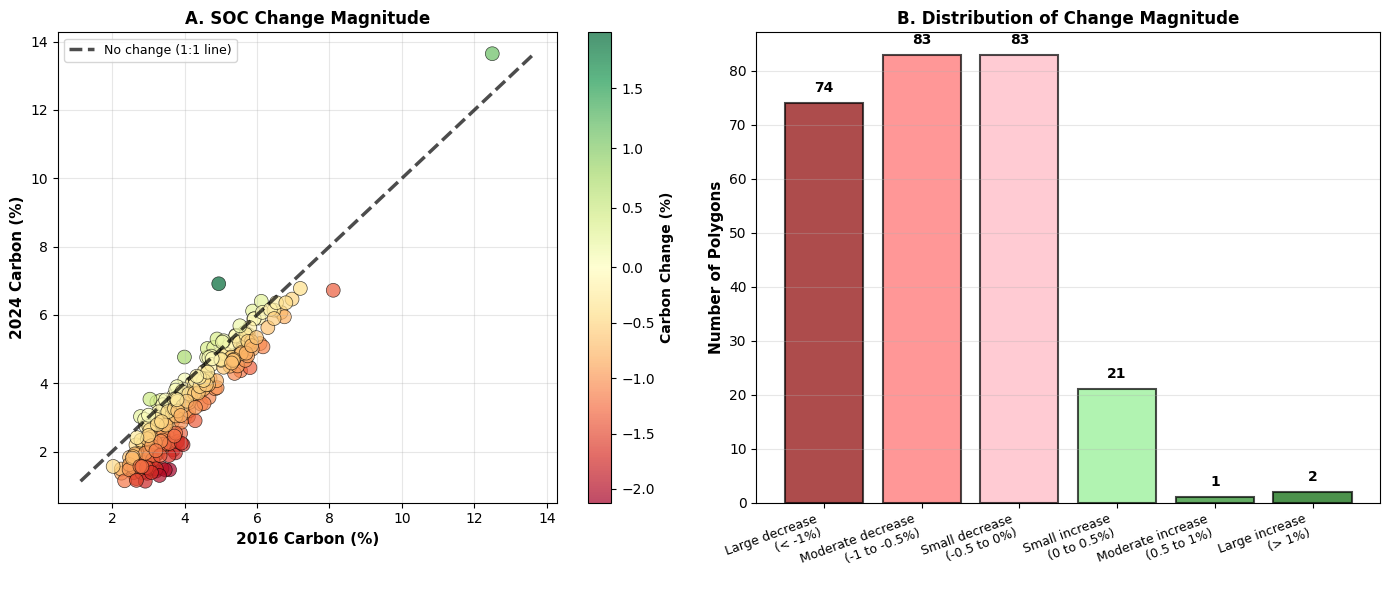

In [294]:
# Change magnitude plotting - Top panels
from matplotlib.colors import TwoSlopeNorm

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# A. 2016 vs 2024 with magnitude (colored)
ax1 = axes[0]
scatter = ax1.scatter(polygon_summary['carbon_first_year'],
                     polygon_summary['carbon_last_year'],
                     c=polygon_summary['carbon_change'],
                     cmap='RdYlGn',
                     norm=TwoSlopeNorm(vmin=polygon_summary['carbon_change'].min(),
                                      vcenter=0,
                                      vmax=polygon_summary['carbon_change'].max()),
                     s=100,
                     alpha=0.7,
                     edgecolors='black',
                     linewidths=0.5)
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Carbon Change (%)', fontweight='bold', fontsize=10)

min_val = polygon_summary[['carbon_first_year', 'carbon_last_year']].min().min()
max_val = polygon_summary[['carbon_first_year', 'carbon_last_year']].max().max()
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2.5, alpha=0.7,
         label='No change (1:1 line)')

ax1.set_xlabel('2016 Carbon (%)', fontweight='bold', fontsize=11)
ax1.set_ylabel('2024 Carbon (%)', fontweight='bold', fontsize=11)
ax1.set_title('A. SOC Change Magnitude', fontweight='bold', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# B. Binned changes - create change magnitude categories
ax2 = axes[1]
polygon_summary['change_category'] = pd.cut(polygon_summary['carbon_change'],
                                            bins=[-np.inf, -1, -0.5, 0, 0.5, 1, np.inf],
                                            labels=['Large decrease\n(< -1%)',
                                                   'Moderate decrease\n(-1 to -0.5%)',
                                                   'Small decrease\n(-0.5 to 0%)',
                                                   'Small increase\n(0 to 0.5%)',
                                                   'Moderate increase\n(0.5 to 1%)',
                                                   'Large increase\n(> 1%)'])

change_cat_counts = polygon_summary['change_category'].value_counts().sort_index()
colors_cat = ['#8B0000', '#FF6B6B', '#FFB6C1', '#90EE90', '#228B22', '#006400']
bars = ax2.bar(range(len(change_cat_counts)), change_cat_counts.values,
               color=colors_cat, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add counts on bars
for i, (cat, count) in enumerate(change_cat_counts.items()):
    ax2.text(i, count + 2, str(count), ha='center', fontweight='bold', fontsize=10)

ax2.set_xticks(range(len(change_cat_counts)))
ax2.set_xticklabels(change_cat_counts.index, rotation=20, ha='right', fontsize=9)
ax2.set_ylabel('Number of Polygons', fontweight='bold', fontsize=11)
ax2.set_title('B. Distribution of Change Magnitude', fontweight='bold', fontsize=12)
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [295]:
# Print details about change magnitude categories
print("\n" + "="*80)
print("CHANGE MAGNITUDE CATEGORIES")
print("="*80)
for cat in change_cat_counts.index:
    subset = polygon_summary[polygon_summary['change_category'] == cat]
    print(f"\n{cat}: n={len(subset)}")
    print(f"  Mean change: {subset['carbon_change'].mean():.3f}%")
    print(f"  Dominant land use: {subset['landuse_current'].mode()[0] if len(subset) > 0 else 'N/A'}")
    print(f"  Dominant climate: {subset['climate_description'].mode()[0] if len(subset) > 0 else 'N/A'}")
    print(f"  Mean temp: {subset['tmax_ann_mean_30m'].mean():.1f}°C")
    print(f"  Mean rainfall: {subset['rainfall_ann_mm_30m'].mean():.0f} mm")


CHANGE MAGNITUDE CATEGORIES

Large decrease
(< -1%): n=74
  Mean change: -1.328%
  Dominant land use: sugarcane
  Dominant climate: Warm/Dry
  Mean temp: 27.4°C
  Mean rainfall: 604 mm

Moderate decrease
(-1 to -0.5%): n=83
  Mean change: -0.715%
  Dominant land use: range
  Dominant climate: Warm/Mod-Wet
  Mean temp: 26.1°C
  Mean rainfall: 1057 mm

Small decrease
(-0.5 to 0%): n=83
  Mean change: -0.285%
  Dominant land use: range
  Dominant climate: Moderate/Dry-Mod
  Mean temp: 25.4°C
  Mean rainfall: 908 mm

Small increase
(0 to 0.5%): n=21
  Mean change: 0.178%
  Dominant land use: pineapple
  Dominant climate: Moderate/Dry-Mod
  Mean temp: 24.6°C
  Mean rainfall: 800 mm

Moderate increase
(0.5 to 1%): n=1
  Mean change: 0.769%
  Dominant land use: pineapple
  Dominant climate: Warm/Mod-Wet
  Mean temp: 26.4°C
  Mean rainfall: 1910 mm

Large increase
(> 1%): n=2
  Mean change: 1.561%
  Dominant land use: pineapple
  Dominant climate: Cool/All rainfall
  Mean temp: 20.7°C
  Mean 

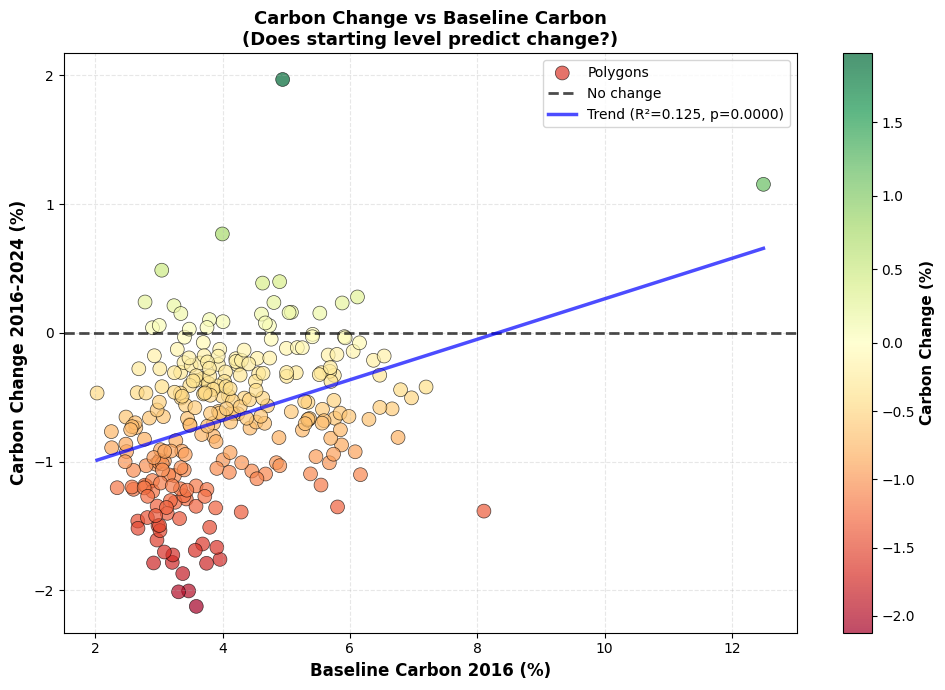


Interpretation:
  • Polygons with HIGHER baseline carbon show GREATER increases (slope=0.1572)
  • This relationship is statistically significant (p=0.0000)


In [296]:
# C. Change magnitude by baseline carbon
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import linregress

fig, ax = plt.subplots(figsize=(10, 7))

scatter = ax.scatter(polygon_summary['carbon_first_year'],
                     polygon_summary['carbon_change'],
                     c=polygon_summary['carbon_change'],
                     cmap='RdYlGn',
                     norm=TwoSlopeNorm(vmin=polygon_summary['carbon_change'].min(),
                                      vcenter=0,
                                      vmax=polygon_summary['carbon_change'].max()),
                     s=100,
                     alpha=0.7,
                     edgecolors='black',
                     linewidths=0.5,
                     label='Polygons')

# Add colorbar as legend
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Carbon Change (%)', fontweight='bold', fontsize=11)

# Add zero reference line
ax.axhline(0, color='black', linestyle='--', linewidth=2, alpha=0.7,
           label='No change')

# Add regression line
slope, intercept, r, p, se = linregress(polygon_summary['carbon_first_year'].dropna(),
                                        polygon_summary['carbon_change'].dropna())
x_range = np.linspace(polygon_summary['carbon_first_year'].min(),
                     polygon_summary['carbon_first_year'].max(), 100)
ax.plot(x_range, slope * x_range + intercept, 'b-', linewidth=2.5, alpha=0.7,
        label=f'Trend (R²={r**2:.3f}, p={p:.4f})')

# Add axis labels
ax.set_xlabel('Baseline Carbon 2016 (%)', fontweight='bold', fontsize=12)
ax.set_ylabel('Carbon Change 2016-2024 (%)', fontweight='bold', fontsize=12)
ax.set_title('Carbon Change vs Baseline Carbon\n(Does starting level predict change?)',
             fontweight='bold', fontsize=13)

# Add legend
ax.legend(fontsize=10, loc='best')

# Add grid
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print interpretation
print("\nInterpretation:")
if p < 0.05:
    if slope > 0:
        print(f"  • Polygons with HIGHER baseline carbon show GREATER increases (slope={slope:.4f})")
    else:
        print(f"  • Polygons with HIGHER baseline carbon show GREATER decreases (slope={slope:.4f})")
    print(f"  • This relationship is statistically significant (p={p:.4f})")
else:
    print(f"  • No significant relationship between baseline carbon and change (p={p:.4f})")
    print(f"  • Starting carbon level does not predict the direction or magnitude of change")

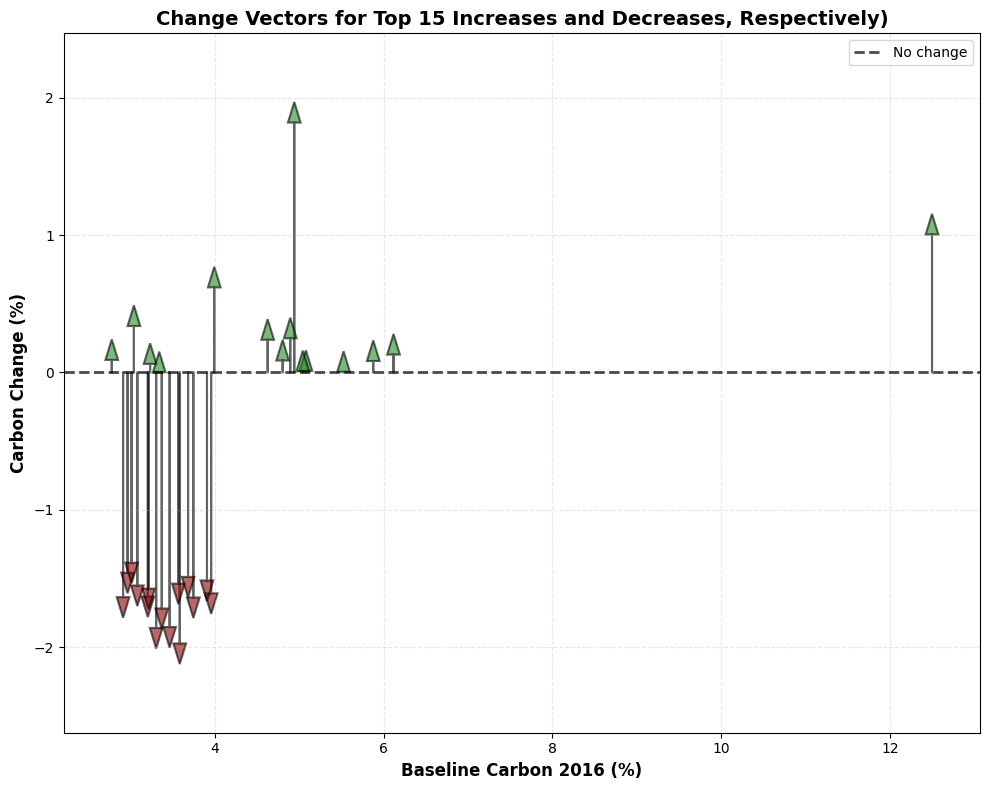


Showing 15 largest increases and 15 largest decreases

Largest increases:
 carbon_first_year  carbon_change landuse_current climate_description
          4.943487       1.968592       pineapple    Moderate/Dry-Mod
         12.493938       1.154235           range   Cool/All rainfall
          3.996374       0.768750       pineapple        Warm/Mod-Wet
          3.044648       0.487292       pineapple    Moderate/Dry-Mod
          4.896063       0.398194       pineapple    Moderate/Dry-Mod
          4.628406       0.387159       pineapple    Moderate/Dry-Mod
          6.118371       0.279398           range   Cool/All rainfall
          2.782554       0.240285       pineapple    Moderate/Dry-Mod
          4.805931       0.236270       pineapple    Moderate/Dry-Mod
          5.878514       0.232678       pineapple    Moderate/Dry-Mod
          3.236758       0.211626           range        Warm/Mod-Wet
          5.081057       0.160943       pineapple    Moderate/Dry-Mod
          5.044

In [297]:
# Standalone: Arrows showing direction and magnitude for selected polygons
fig, ax = plt.subplots(figsize=(10, 8))

# Select polygons to show (largest increases and decreases)
n_show = 15
largest_inc = polygon_summary.nlargest(n_show, 'carbon_change')
largest_dec = polygon_summary.nsmallest(n_show, 'carbon_change')
selected = pd.concat([largest_inc, largest_dec])

for idx, row in selected.iterrows():
    color = '#228B22' if row['carbon_change'] > 0 else '#8B0000'
    # Arrow starts at baseline carbon, 0 change
    # Arrow points upward (positive) or downward (negative) by the amount of change
    ax.arrow(row['carbon_first_year'], 0,
             0, row['carbon_change'],
             head_width=0.15, head_length=0.15,
             fc=color, ec='black', alpha=0.6, linewidth=1.5,
             length_includes_head=True)

# Add zero reference line
ax.axhline(0, color='black', linestyle='--', linewidth=2, alpha=0.7, label='No change')

ax.set_xlabel('Baseline Carbon 2016 (%)', fontweight='bold', fontsize=12)
ax.set_ylabel('Carbon Change (%)', fontweight='bold', fontsize=12)
ax.set_title(f'Change Vectors for Top {n_show} Increases and Decreases, Respectively)',
             fontweight='bold', fontsize=14)
ax.legend(fontsize=10)
ax.grid(alpha=0.3, linestyle='--')
ax.set_ylim(polygon_summary['carbon_change'].min() - 0.5,
            polygon_summary['carbon_change'].max() + 0.5)

plt.tight_layout()
plt.show()

print(f"\nShowing {n_show} largest increases and {n_show} largest decreases")
print(f"\nLargest increases:")
print(largest_inc[['carbon_first_year', 'carbon_change', 'landuse_current', 'climate_description']].to_string(index=False))
print(f"\nLargest decreases:")
print(largest_dec[['carbon_first_year', 'carbon_change', 'landuse_current', 'climate_description']].to_string(index=False))

In [298]:
# ============================================================================
# 6. MULTIVARIATE COMPARISON
# ============================================================================
print("\n" + "="*80)
print("MULTIVARIATE PROFILE COMPARISON")
print("="*80)

# Create summary profiles
increasing_profile = {
    'Temperature (°C)': increasing['tmax_ann_mean_30m'].mean(),
    'Rainfall (mm)': increasing['rainfall_ann_mm_30m'].mean(),
    'Baseline Carbon (%)': increasing['carbon_first_year'].mean(),
    '2024 Carbon (%)': increasing['carbon_last_year'].mean(),
    'Carbon Change (%)': increasing['carbon_change'].mean(),
    'Dominant Land Use': increasing['landuse_current'].mode()[0] if len(increasing) > 0 else 'N/A',
    'Dominant Climate': increasing['climate_description'].mode()[0] if len(increasing) > 0 else 'N/A',
    'Dominant Suborder': increasing['Suborder_list'].mode()[0] if len(increasing) > 0 else 'N/A'
}

decreasing_profile = {
    'Temperature (°C)': decreasing['tmax_ann_mean_30m'].mean(),
    'Rainfall (mm)': decreasing['rainfall_ann_mm_30m'].mean(),
    'Baseline Carbon (%)': decreasing['carbon_first_year'].mean(),
    '2024 Carbon (%)': decreasing['carbon_last_year'].mean(),
    'Carbon Change (%)': decreasing['carbon_change'].mean(),
    'Dominant Land Use': decreasing['landuse_current'].mode()[0] if len(decreasing) > 0 else 'N/A',
    'Dominant Climate': decreasing['climate_description'].mode()[0] if len(decreasing) > 0 else 'N/A',
    'Dominant Suborder': decreasing['Suborder_list'].mode()[0] if len(decreasing) > 0 else 'N/A'
}

profile_df = pd.DataFrame({
    'Increasing Polygons': increasing_profile,
    'Decreasing Polygons': decreasing_profile
})

print("\nProfile Comparison:")
print(profile_df)

# Save results
profile_df.to_csv('carbon_trend_profiles.csv')
transition_change.to_csv('carbon_change_by_transition.csv')
suborder_change.to_csv('carbon_change_by_suborder.csv')

print("\n✓ Results saved:")
print("  - carbon_trend_profiles.csv")
print("  - carbon_change_by_transition.csv")
print("  - carbon_change_by_suborder.csv")



MULTIVARIATE PROFILE COMPARISON

Profile Comparison:
                    Increasing Polygons Decreasing Polygons
Temperature (°C)              24.362893           26.249787
Rainfall (mm)                872.841366          865.924481
Baseline Carbon (%)            4.615802            4.082435
2024 Carbon (%)                4.933693            3.327264
Carbon Change (%)              0.317891           -0.755171
Dominant Land Use             pineapple               range
Dominant Climate       Moderate/Dry-Mod        Warm/Mod-Wet
Dominant Suborder               Cambids             Ustolls

✓ Results saved:
  - carbon_trend_profiles.csv
  - carbon_change_by_transition.csv
  - carbon_change_by_suborder.csv


In [299]:
import os
# ============================================================================
# Join everything together into gpkg
# ============================================================================

# Step 1: Load the carbon points (without any previous joins)

# Check what we have
print(f"carbon_landuse shape: {carbon_landuse.shape}")
print(f"carbon_landuse columns: {carbon_landuse.columns.tolist()}")

# Get just the essential carbon data and geometry
carbon_points = carbon_landuse[['id', 'lat', 'lon', 'carbon_mean', 'carbon_first_year',
                                'carbon_last_year', 'carbon_change', 'geometry']].copy()
carbon_points = gpd.GeoDataFrame(carbon_points, geometry='geometry', crs=carbon_landuse.crs)

print(f"Carbon points: {len(carbon_points)}")

# Step 2: Load agbaseline

agbaseline = gpd.read_file('/content/2015_ag_baseline_subregion_landuse.gpkg')
print(f"AgBaseline: {len(agbaseline)} polygons")
print(f"OBJECTID sample: {agbaseline['OBJECTID'].head(10).tolist()}")

# Step 3: Do a fresh spatial join
print("\nStep 3: Performing spatial join")
print("-"*80)

# Make sure CRS match
if carbon_points.crs != agbaseline.crs:
    print(f"Reprojecting carbon points from {carbon_points.crs} to {agbaseline.crs}")
    carbon_points = carbon_points.to_crs(agbaseline.crs)

# Spatial join - this will add agbaseline columns including OBJECTID
carbon_joined = gpd.sjoin(carbon_points, agbaseline[['OBJECTID', 'CropCatego', 'Island', 'geometry']],
                          how='inner', predicate='intersects')

print(f"Joined points: {len(carbon_joined)}")
print(f"Columns after join: {carbon_joined.columns.tolist()}")

# Check if OBJECTID is preserved
if 'OBJECTID' in carbon_joined.columns:
    print(f"✓ OBJECTID preserved in join")
    print(f"  OBJECTID range: {carbon_joined['OBJECTID'].min()} to {carbon_joined['OBJECTID'].max()}")
    print(f"  Unique OBJECTIDs: {carbon_joined['OBJECTID'].nunique()}")

    # Step 4: Aggregate to polygons using ACTUAL OBJECTID
    print("\nStep 4: Aggregating to polygons by OBJECTID")
    print("-"*80)

    polygon_aggregated = carbon_joined.groupby('OBJECTID').agg({
        'carbon_mean': 'mean',
        'carbon_first_year': 'mean',
        'carbon_last_year': 'mean',
        'carbon_change': 'mean',
        'id': 'count'
    }).reset_index()

    polygon_aggregated.columns = ['OBJECTID', 'carbon_mean', 'carbon_2016', 'carbon_2024',
                                  'carbon_change', 'n_points']

    print(f"Aggregated polygons: {len(polygon_aggregated)}")
    print(f"Sample:")
    print(polygon_aggregated.head())

    # Add other attributes from polygon_summary if available
    # We need to create a mapping from old poly_id to OBJECTID

    # Get the mapping: which poly_id corresponds to which OBJECTID
    poly_id_to_objectid = carbon_joined.groupby('OBJECTID').first().reset_index()[['OBJECTID']]
    poly_id_to_objectid['poly_id'] = range(len(poly_id_to_objectid))

    print(f"\nMapping poly_id to OBJECTID:")
    print(poly_id_to_objectid.head())

    # Now merge polygon_summary attributes using this mapping
    # First add OBJECTID to polygon_summary
    polygon_summary_with_obj = polygon_summary.merge(poly_id_to_objectid[['poly_id', 'OBJECTID']],
                                                      on='poly_id', how='left')

    # Check overlap
    print(f"\nPolygon summary with OBJECTID:")
    print(f"  Rows: {len(polygon_summary_with_obj)}")
    print(f"  OBJECTID range: {polygon_summary_with_obj['OBJECTID'].min()} to {polygon_summary_with_obj['OBJECTID'].max()}")
    print(f"  Sample OBJECTIDs: {polygon_summary_with_obj['OBJECTID'].head(10).tolist()}")

    # Step 5: Merge aggregated carbon data with full polygon_summary attributes
    print("\nStep 5: Merging aggregated carbon with polygon attributes")
    print("-"*80)

    # Drop geometry from polygon_summary if exists
    polygon_attrs = polygon_summary_with_obj.drop(columns=['geometry'], errors='ignore')

    # Merge
    full_polygon_data = polygon_aggregated.merge(
        polygon_attrs[['OBJECTID', 'landuse_historic', 'landuse_current', 'transition',
                      'land_use_changed', 'tmax_ann_mean_30m', 'rainfall_ann_mm_30m',
                      'climate_description', 'Suborder_list', 'carbon_trend', 'change_category']],
        on='OBJECTID',
        how='left'
    )

    print(f"Full polygon data: {len(full_polygon_data)}")
    print(f"Columns: {full_polygon_data.columns.tolist()}")

    # Step 6: Merge with agbaseline geometries
    print("\nStep 6: Adding geometries from AgBaseline")
    print("-"*80)

    final_gdf = agbaseline.merge(full_polygon_data, on='OBJECTID', how='inner')

    print(f"Final GeoDataFrame: {len(final_gdf)} features")

    if len(final_gdf) > 0:
        final_gdf = gpd.GeoDataFrame(final_gdf, geometry='geometry', crs=agbaseline.crs)

        print(f"  CRS: {final_gdf.crs}")
        print(f"  Geometry types: {final_gdf.geometry.type.value_counts().to_dict()}")
        print(f"  Bounds: {final_gdf.total_bounds}")

        # Step 7: Clean up and save
        print("\nStep 7: Saving geopackage")
        print("-"*80)

        # Select essential columns
        cols_to_keep = ['OBJECTID', 'CropCatego', 'Island', 'carbon_mean', 'carbon_2016',
                       'carbon_2024', 'carbon_change', 'n_points', 'landuse_historic',
                       'landuse_current', 'transition', 'land_use_changed',
                       'tmax_ann_mean_30m', 'rainfall_ann_mm_30m', 'climate_description',
                       'Suborder_list', 'carbon_trend', 'change_category', 'geometry']

        export_cols = [col for col in cols_to_keep if col in final_gdf.columns]
        gdf_export = final_gdf[export_cols].copy()

        # Rename for clarity
        gdf_export = gdf_export.rename(columns={
            'tmax_ann_mean_30m': 'temp_C',
            'rainfall_ann_mm_30m': 'rainfall_mm',
            'climate_description': 'climate_bin',
            'Suborder_list': 'soil_suborder'
        })

        # Save
        output_file = '/content/carbon_polygons_WORKING.gpkg'
        gdf_export.to_file(output_file, driver='GPKG', layer='carbon')

        print(f"✓ Saved to: {output_file}")
        print(f"  Features: {len(gdf_export)}")

        # Verify
        verify = gpd.read_file(output_file)
        print(f"\n✓ Verification:")
        print(f"  Features: {len(verify)}")
        print(f"  Geometry types: {verify.geometry.type.value_counts().to_dict()}")
        print(f"  File size: {os.path.getsize(output_file):,} bytes")

        print("\n" + "="*80)
        print("SUCCESS! Download 'carbon_polygons_WORKING.gpkg'")
        print("="*80)

else:
    print("✗ OBJECTID not found in joined data")
    print("Available columns:", carbon_joined.columns.tolist())

carbon_landuse shape: (274505, 247)
carbon_landuse columns: ['field_1', 'id', 'lat', 'lon', 'lat_lon_id', 'landsat_9_unique_locs_id', 'landsat_9_unique_locs_min_dis', 'landsat_8_unique_locs_id', 'landsat_8_unique_locs_min_dis', 'landsat_7_unique_locs_id', 'landsat_7_unique_locs_min_dis', 'landsat_5_unique_locs_id', 'landsat_5_unique_locs_min_dis', 'terrain_SRTM_unique_locs_id', 'terrain_SRTM_unique_locs_min_dis', 'terrain_aspect_unique_locs_id', 'terrain_aspect_unique_locs_min_dis', 'terraclimate_unique_locs_id', 'terraclimate_unique_locs_min_dis', 'terrain_elevation_unique_locs_id', 'terrain_elevation_unique_locs_min_dis', 'terrain_slope_unique_locs_id', 'terrain_slope_unique_locs_min_dis', 'd_20161217', 'd_20170116', 'd_20170215', 'd_20170317', 'd_20170416', 'd_20170516', 'd_20170615', 'd_20170715', 'd_20170814', 'd_20170913', 'd_20171013', 'd_20171112', 'd_20171212', 'd_20180111', 'd_20180210', 'd_20180312', 'd_20180411', 'd_20180511', 'd_20180610', 'd_20180710', 'd_20180809', 'd_20